<a href="https://colab.research.google.com/github/Joseline-Champa/Joseline-Champa/blob/main/Mango.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Modelo SARIMA para la producción de Mango peruano


La **producción de mango peruano** es un sector clave de la agricultura, con un crecimiento sostenido en las últimas décadas. Perú es uno de los principales exportadores de mango a nivel mundial, destacándose en mercados como Estados Unidos, Europa y Asia. Las regiones más productivas son **Piura**, **Lambayeque**, **La Libertad**, **Ica** y **Tumbes**, siendo Piura la principal zona de cultivo. Las variedades más populares son el **mango Kent**, por su calidad y sabor, y el **mango Ataulfo**, apreciado por su textura suave y dulce. La cosecha ocurre entre diciembre y marzo, aprovechando la temporada baja de otros productores, lo que permite a Perú llenar un vacío de oferta en los mercados internacionales.

Además de su crecimiento en exportaciones, la producción de mango peruano enfrenta desafíos como el cambio climático y la sostenibilidad, impulsando la adopción de prácticas agrícolas más responsables. A pesar de estos retos, el sector ha diversificado sus productos con derivados como jugos y mango deshidratado, lo que ha agregado valor a la fruta. Con un potencial de expansión tanto en cultivo como en mercados, la industria del mango en Perú tiene perspectivas positivas, consolidándose como un pilar importante de la economía agrícola del país.

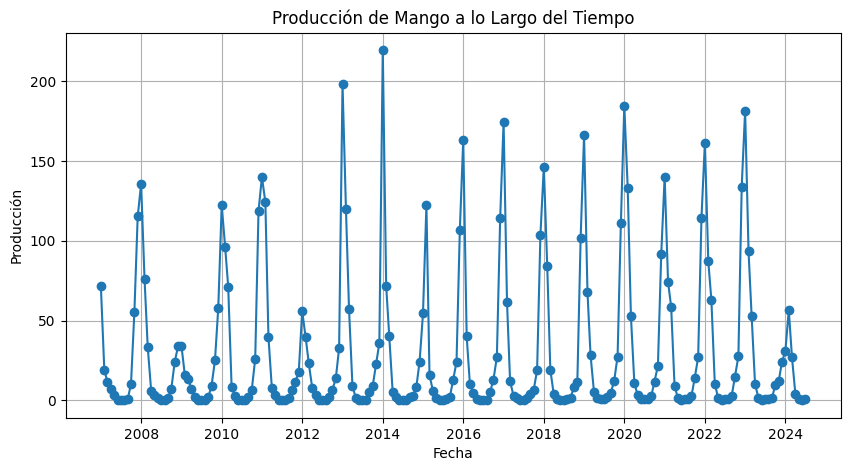

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo subido
ruta_archivo = '/content/mango.xlsx'  # Ajusta esta ruta si es necesario

# Leer el archivo de Excel
df = pd.read_excel(ruta_archivo)

# Convertir la columna de 'fecha' al tipo de dato datetime especificando el formato
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no parseadas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'fecha' como índice
df.set_index('Fecha', inplace=True)

# Graficar la serie de tiempo
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Producción'], marker='o')
plt.title('Producción de Mango a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Producción')
plt.grid(True)
plt.show()



### Análisis e Interpretación:
- **Eje Horizontal (Fecha)**: Abarca desde el año 2008 hasta el año 2024, indicando un período de 16 años de datos.
- **Eje Vertical (Producción)**: Va de 0 a 200 unidades, mostrando la cantidad de producción en cada período.
- **Estacionalidad**: Se observan picos de producción en intervalos regulares, lo que sugiere una estacionalidad marcada en la producción de mango. Esto implica que hay ciertos meses del año en los que la producción alcanza su punto máximo.
- **Picos y Valles**: Los picos más altos alcanzan valores cercanos a 200 unidades, mientras que los valores más bajos se acercan a 0 unidades. Esto indica una variabilidad significativa en la producción a lo largo del año.

### Relevancia:
- **Planificación Agrícola**: Conocer estos patrones estacionales puede ayudar a los agricultores a planificar mejor las cosechas y las ventas.
- **Gestión de Recursos**: Permite una asignación más eficiente de recursos, como mano de obra y almacenamiento.
- **Mercado y Precios**: La estacionalidad puede afectar los precios de mercado, con precios más bajos durante los picos de producción y precios más altos durante los valles.

## 1. Identificación

Prueba ADF para la serie original:
Estadístico ADF: -3.5156764803728984
p-valor: 0.007593498914446538

Prueba ADF para la serie diferenciada en primer orden:
Estadístico ADF: -6.6631222769033664
p-valor: 4.791316019756237e-09

Prueba ADF para la serie diferenciada en segundo orden:
Estadístico ADF: -8.785392819471799
p-valor: 2.3160945305992947e-14


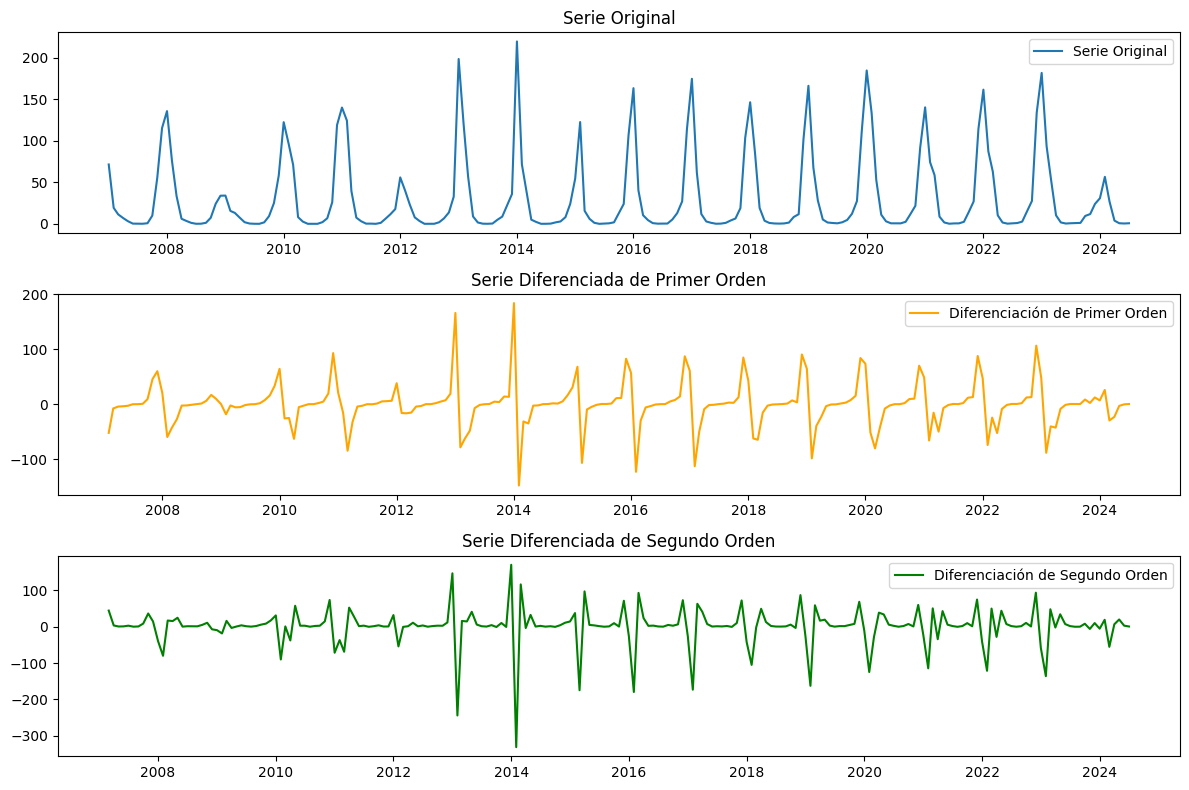

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Realizar la prueba de ADF en la serie original
result = adfuller(df['Producción'])
print("Prueba ADF para la serie original:")
print(f"Estadístico ADF: {result[0]}")
print(f"p-valor: {result[1]}")

# Diferenciación de primer orden
df['Producción_1d'] = df['Producción'].diff()
result_1d = adfuller(df['Producción_1d'].dropna())
print("\nPrueba ADF para la serie diferenciada en primer orden:")
print(f"Estadístico ADF: {result_1d[0]}")
print(f"p-valor: {result_1d[1]}")

# Diferenciación de segundo orden
df['Producción_2d'] = df['Producción_1d'].diff()
result_2d = adfuller(df['Producción_2d'].dropna())
print("\nPrueba ADF para la serie diferenciada en segundo orden:")
print(f"Estadístico ADF: {result_2d[0]}")
print(f"p-valor: {result_2d[1]}")

# Graficar las series original, diferenciada en primer orden y en segundo orden
plt.figure(figsize=(12, 8))

# Serie original
plt.subplot(3, 1, 1)
plt.plot(df['Producción'], label='Serie Original')
plt.title('Serie Original')
plt.legend()

# Serie diferenciada en primer orden
plt.subplot(3, 1, 2)
plt.plot(df['Producción_1d'], color='orange', label='Diferenciación de Primer Orden')
plt.title('Serie Diferenciada de Primer Orden')
plt.legend()

# Serie diferenciada en segundo orden
plt.subplot(3, 1, 3)
plt.plot(df['Producción_2d'], color='green', label='Diferenciación de Segundo Orden')
plt.title('Serie Diferenciada de Segundo Orden')
plt.legend()

plt.tight_layout()
plt.show()



### Prueba ADF para la Serie Original
- **Estadístico ADF**: -3.5156764803728984
- **p-valor**: 0.007593498914446538

**Interpretación**: El valor p es menor que 0.05, lo que indica que podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria y no es estacionaria. Sin embargo, el valor del estadístico ADF es relativamente cercano a los límites críticos para algunas series, lo cual puede sugerir una necesidad de confirmar la estacionariedad mediante otras técnicas.

### Prueba ADF para la Serie Diferenciada en Primer Orden
- **Estadístico ADF**: -6.6631222769033664
- **p-valor**: 4.791316019756237e-09

**Interpretación**: El valor p es extremadamente bajo, mucho menor que 0.05, lo que fortalece la evidencia en contra de la hipótesis nula. Esto significa que, después de la primera diferenciación, la serie claramente no tiene una raíz unitaria y es estacionaria.

### Prueba ADF para la Serie Diferenciada en Segundo Orden
- **Estadístico ADF**: -8.785392819471799
- **p-valor**: 2.3160945305992947e-14

**Interpretación**: Al igual que con la diferenciación de primer orden, el valor p es aún más bajo, reafirmando que la serie es estacionaria después de la segunda diferenciación. Esto sugiere que incluso sin duda alguna, la serie es estacionaria en este nivel de diferenciación.

### Conclusión General
- La **serie original** es estacionaria según la prueba ADF, aunque el valor del estadístico sugiere una verificación adicional.
- La **serie diferenciada en primer orden** y **segundo orden** claramente son estacionarias con valores de p muy bajos, indicando fuertes pruebas de estacionariedad.

En resumen, la diferenciación de la serie ha eliminado cualquier indicio de no estacionariedad, confirmando que la serie diferenciada en primer y segundo orden son adecuadas para su uso en modelos que requieren estacionariedad, como ARIMA.

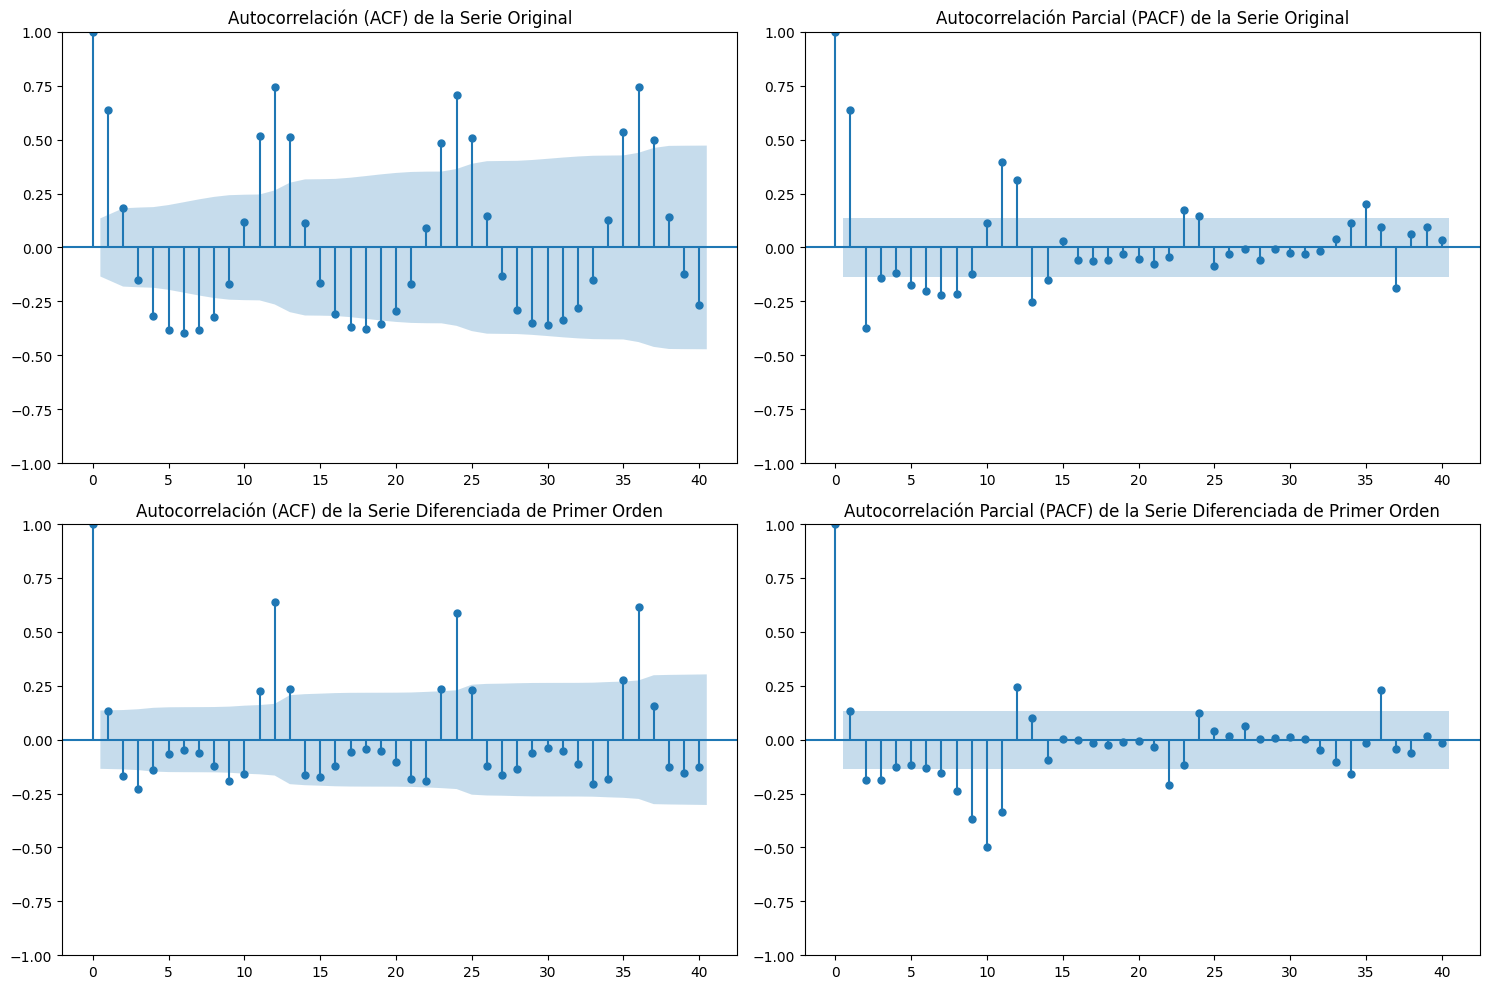

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Diferenciación de primer orden
df['Producción_1d'] = df['Producción'].diff()

# Graficar la ACF y PACF de la serie original y la serie diferenciada
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# ACF de la serie original
plot_acf(df['Producción'].dropna(), ax=axs[0, 0], lags=40)
axs[0, 0].set_title('Autocorrelación (ACF) de la Serie Original')

# PACF de la serie original
plot_pacf(df['Producción'].dropna(), ax=axs[0, 1], lags=40)
axs[0, 1].set_title('Autocorrelación Parcial (PACF) de la Serie Original')

# ACF de la serie diferenciada
plot_acf(df['Producción_1d'].dropna(), ax=axs[1, 0], lags=40)
axs[1, 0].set_title('Autocorrelación (ACF) de la Serie Diferenciada de Primer Orden')

# PACF de la serie diferenciada
plot_pacf(df['Producción_1d'].dropna(), ax=axs[1, 1], lags=40)
axs[1, 1].set_title('Autocorrelación Parcial (PACF) de la Serie Diferenciada de Primer Orden')

plt.tight_layout()
plt.show()

Acorde a la función de autocorrelación parcial , el valor óptimo para el parámetro  p es 0. Sin embargo, se va a asignar un valor de 1 para proporcionar un componente autorregresivo al modelo. En cuanto al componente  q, la función de autocorrelación sugiere un valor de 1.

### Resumen del análisis

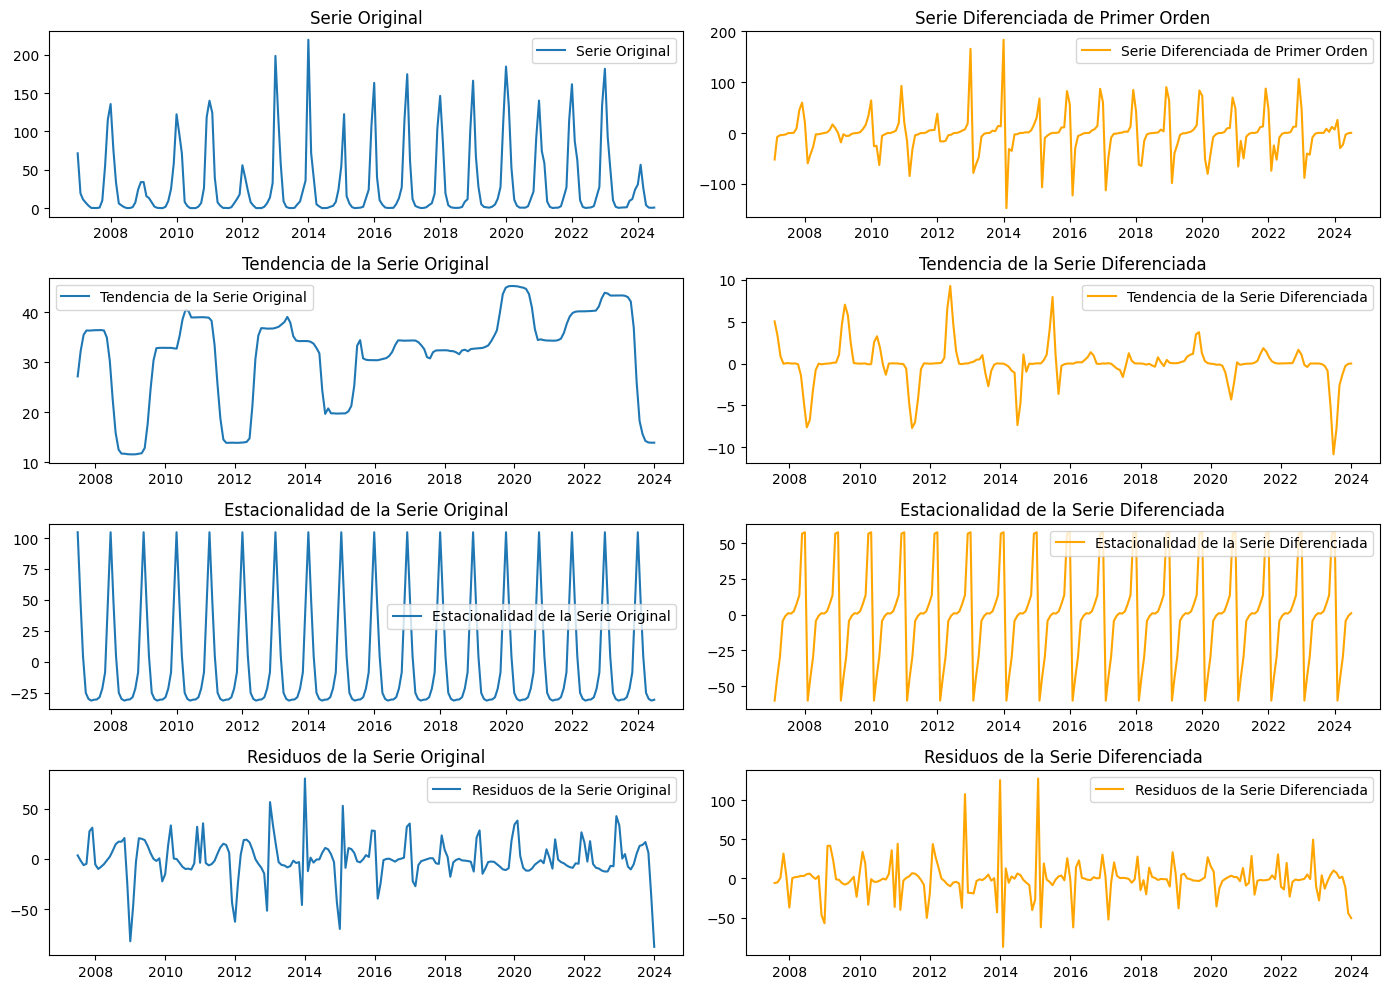

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Diferenciación de primer orden
df['Producción_1d'] = df['Producción'].diff().dropna()

# Descomposición de la serie original
decomposition_original = seasonal_decompose(df['Producción'].dropna(), model='additive', period=12)
# Descomposición de la serie diferenciada en primer orden
decomposition_differenced = seasonal_decompose(df['Producción_1d'].dropna(), model='additive', period=12)

# Gráfico de descomposición de la serie original
plt.figure(figsize=(14, 10))

plt.subplot(4, 2, 1)
plt.plot(df['Producción'], label='Serie Original')
plt.title('Serie Original')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(decomposition_original.trend, label='Tendencia de la Serie Original')
plt.title('Tendencia de la Serie Original')
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(decomposition_original.seasonal, label='Estacionalidad de la Serie Original')
plt.title('Estacionalidad de la Serie Original')
plt.legend()

plt.subplot(4, 2, 7)
plt.plot(decomposition_original.resid, label='Residuos de la Serie Original')
plt.title('Residuos de la Serie Original')
plt.legend()

# Gráfico de descomposición de la serie diferenciada
plt.subplot(4, 2, 2)
plt.plot(df['Producción_1d'], color='orange', label='Serie Diferenciada de Primer Orden')
plt.title('Serie Diferenciada de Primer Orden')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(decomposition_differenced.trend, color='orange', label='Tendencia de la Serie Diferenciada')
plt.title('Tendencia de la Serie Diferenciada')
plt.legend()

plt.subplot(4, 2, 6)
plt.plot(decomposition_differenced.seasonal, color='orange', label='Estacionalidad de la Serie Diferenciada')
plt.title('Estacionalidad de la Serie Diferenciada')
plt.legend()

plt.subplot(4, 2, 8)
plt.plot(decomposition_differenced.resid, color='orange', label='Residuos de la Serie Diferenciada')
plt.title('Residuos de la Serie Diferenciada')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# Diferenciación de primer orden
df['Producción_1d'] = df['Producción'].diff().dropna()

# Aplicar la prueba ADF a la serie diferenciada de primer orden
adf_result = adfuller(df['Producción_1d'].dropna())
print("Prueba Dickey-Fuller Aumentada (ADF) para la serie diferenciada de primer orden:")
print(f"Estadístico ADF: {adf_result[0]}")
print(f"p-valor: {adf_result[1]}")
print(f"Valores críticos: {adf_result[4]}")

# Aplicar la prueba KPSS a la serie diferenciada de primer orden
kpss_result = kpss(df['Producción_1d'].dropna(), regression='c', nlags="auto")
print("\nPrueba KPSS para la serie diferenciada de primer orden:")
print(f"Estadístico KPSS: {kpss_result[0]}")
print(f"p-valor: {kpss_result[1]}")
print(f"Valores críticos: {kpss_result[3]}")

Prueba Dickey-Fuller Aumentada (ADF) para la serie diferenciada de primer orden:
Estadístico ADF: -6.6631222769033664
p-valor: 4.791316019756237e-09
Valores críticos: {'1%': -3.463987334463603, '5%': -2.8763259091636213, '10%': -2.5746515171738515}

Prueba KPSS para la serie diferenciada de primer orden:
Estadístico KPSS: 0.03632852766064547
p-valor: 0.1
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-7-39e641c76e4c>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(df['Producción_1d'].dropna(), regression='c', nlags="auto")


### Análisis de Pruebas ADF y KPSS para la Serie Diferenciada de Primer Orden

#### Prueba Dickey-Fuller Aumentada (ADF)
- **Estadístico ADF**: -6.6631222769033664
- **p-valor**: 4.791316019756237e-09
- **Valores críticos**:
  - 1%: -3.463987334463603
  - 5%: -2.8763259091636213
  - 10%: -2.5746515171738515

**Interpretación**:
- El **valor p** es extremadamente bajo, mucho menor que 0.05, lo que indica que podemos rechazar la hipótesis nula de que la serie tiene una raíz unitaria. Esto significa que la serie diferenciada de primer orden es estacionaria.
- El **estadístico ADF** (-6.6631) es menor que todos los valores críticos a niveles de significancia del 1%, 5% y 10%. Esto refuerza aún más la conclusión de que la serie no tiene una raíz unitaria y es estacionaria.

#### Prueba KPSS
- **Estadístico KPSS**: 0.03632852766064547
- **p-valor**: 0.1
- **Valores críticos**:
  - 10%: 0.347
  - 5%: 0.463
  - 2.5%: 0.574
  - 1%: 0.739

**Interpretación**:
- El **valor p** es 0.1, que indica que no podemos rechazar la hipótesis nula de que la serie es estacionaria.
- El **estadístico KPSS** (0.0363) es muy inferior a todos los valores críticos en los diferentes niveles de significancia, lo cual sugiere que la serie es estacionaria.

### Conclusión General
Ambas pruebas, ADF y KPSS, coinciden en que la serie diferenciada en primer orden es estacionaria:
- La **Prueba ADF** muestra que podemos rechazar la hipótesis de raíz unitaria, indicando estacionariedad.
- La **Prueba KPSS** apoya la hipótesis nula de estacionariedad.

Estos resultados son importantes ya que confirmar la estacionariedad en la serie diferenciada es crucial para el análisis y modelado de series temporales, tales como en modelos ARIMA.


### Modelo SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                         Producción   No. Observations:                  211
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -910.120
Date:                            Fri, 06 Dec 2024   AIC                           1830.240
Time:                                    01:05:52   BIC                           1846.682
Sample:                                01-01-2007   HQIC                          1836.895
                                     - 07-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4325      0.067      6.436      0.000       0.301       0.564
ma.L1         -0.9999     16.229   

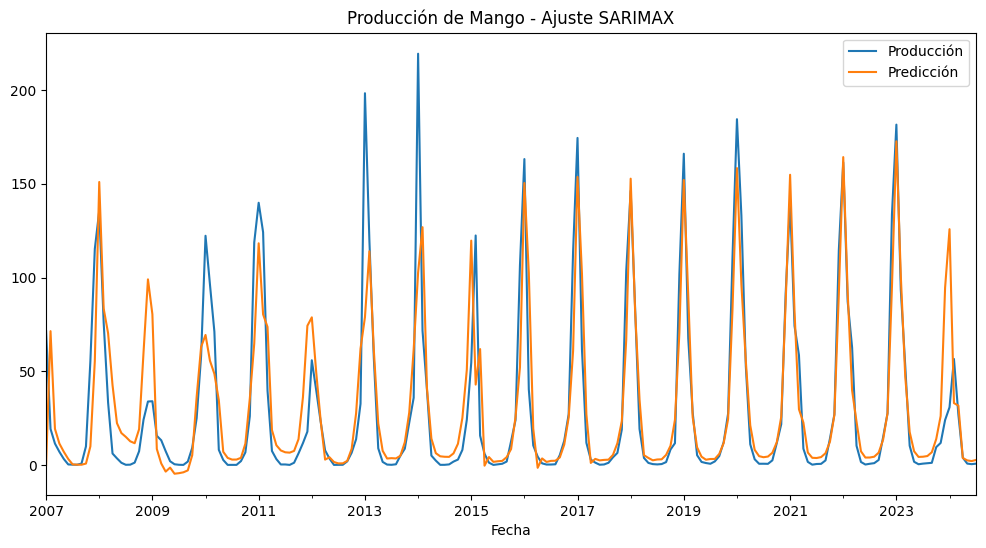

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo SARIMAX a la serie de producción agrícola de café
model = SARIMAX(df['Producción'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Mostrar el resumen de los resultados del modelo
print(results.summary())

# Graficar los ajustes y las predicciones dentro de la muestra
df['Predicción'] = results.fittedvalues
df[['Producción', 'Predicción']].plot(figsize=(12, 6), title="Producción de Mango - Ajuste SARIMAX")
plt.show()


#### Modelo
- **Modelo**: SARIMAX(1, 1, 1)x(1, 1, 1, 12)
  - Esto indica que el modelo tiene parámetros (1,1,1) para la parte no estacional y (1,1,1,12) para la parte estacional con periodicidad de 12 meses (por ejemplo, datos mensuales con patrón anual).

#### Parámetros del Modelo
- **ar.L1** (Auto-regresivo de primer orden): 0.4325, significativo (p-valor < 0.05)
- **ma.L1** (Media móvil de primer orden): -0.9999, no significativo (p-valor > 0.05)
- **ar.S.L12** (Auto-regresivo estacional de primer orden): -0.0373, no significativo (p-valor > 0.05)
- **ma.S.L12** (Media móvil estacional de primer orden): -0.8364, significativo (p-valor < 0.05)
- **sigma2** (Varianza del error): 514.0239, no significativo (p-valor > 0.05)

#### Métricas de Evaluación
- **Log Likelihood**: -910.120
- **AIC (Akaike Information Criterion)**: 1830.240
- **BIC (Bayesian Information Criterion)**: 1846.682
- **HQIC (Hannan-Quinn Information Criterion)**: 1836.895

Estos criterios ayudan a comparar modelos: valores más bajos indican un mejor ajuste.

#### Pruebas de Diagnóstico
- **Ljung-Box (L1) (Q)**: 0.01 (Prob(Q): 0.93) — No hay evidencia de autocorrelación en los residuos.
- **Jarque-Bera (JB)**: 627.51 (Prob(JB): 0.00) — Los residuos no se distribuyen normalmente.
- **Heteroskedasticity (H)**: 0.66 (Prob(H) (two-sided): 0.09) — No hay evidencia fuerte de heterocedasticidad.
- **Skew**: 1.05 — Indica asimetría en los residuos.
- **Kurtosis**: 11.47 — Indica una mayor curtosis (distribución de colas más pesadas).

#### Conclusión
- **Significancia de Parámetros**: El parámetro AR de primer orden y el parámetro MA estacional son significativos. El parámetro MA de primer orden y AR estacional no son significativos.
- **Diagnóstico de Residuos**: Aunque los residuos no son normalmente distribuidos, no hay autocorrelación ni fuerte heterocedasticidad, lo cual sugiere que los residuos son aceptables para este modelo.
- **Ajuste del Modelo**: Los valores de AIC y BIC indican un ajuste razonable, aunque hay potencial para explorar otros modelos o ajustar parámetros.


### Backtesting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error cuadrático medio (MSE): 721.9228450194925
Error absoluto medio (MAE): 13.9000337986748


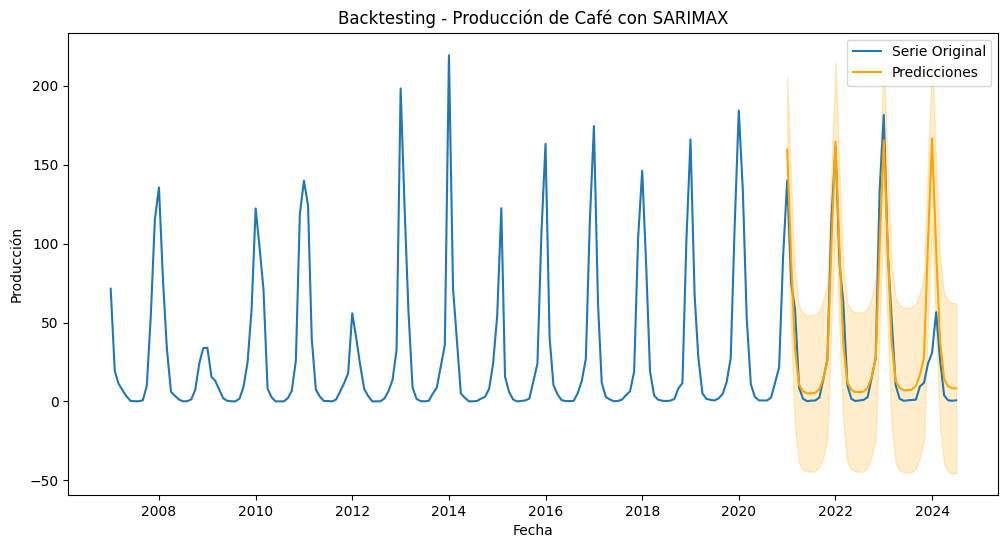

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Dividir los datos en conjunto de entrenamiento y de prueba
train_size = int(len(df) * 0.8)  # Usamos el 80% de los datos para entrenamiento
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Ajustar el modelo SARIMAX en el conjunto de entrenamiento
model = SARIMAX(train['Producción'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Hacer predicciones para el conjunto de prueba
predictions = results.get_forecast(steps=len(test))
predicted_values = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Calcular el error de las predicciones
mse = mean_squared_error(test['Producción'], predicted_values)
mae = mean_absolute_error(test['Producción'], predicted_values)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MAE): {mae}")

# Graficar los datos de prueba y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Producción'], label='Serie Original')
plt.plot(test.index, predicted_values, label='Predicciones', color='orange')
plt.fill_between(test.index, confidence_intervals['lower Producción'], confidence_intervals['upper Producción'], color='orange', alpha=0.2)
plt.title("Backtesting - Producción de Café con SARIMAX")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

En resumen, este gráfico evalúa la precisión del modelo SARIMAX al predecir la producción de MANGO, comparando las predicciones con los datos reales. A través de este análisis visual, puedes observar cómo el modelo sigue las tendencias y patrones en los datos históricos, lo que sugiere un ajuste razonable del modelo.

### Grid search basado en backtesting

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import numpy as np
import itertools
import warnings

warnings.filterwarnings("ignore")  # Ignorar advertencias de statsmodels


# Dividir los datos en conjunto de entrenamiento y de prueba
train_size = int(len(df) * 0.8)  # Usar el 80% de los datos para entrenamiento
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Definir los rangos de parámetros para el grid search
p = d = q = range(0, 2)  # Rango de 0 a 1 para p, d, q
P = D = Q = range(0, 2)  # Rango de 0 a 1 para parámetros estacionales
s = 12  # Periodo estacional de 12 meses

# Generar todas las combinaciones de parámetros posibles
param_combinations = list(itertools.product(p, d, q))
seasonal_param_combinations = list(itertools.product(P, D, Q, [s]))

# Guardar los resultados
best_score = float("inf")
best_params = None

# Bucle para probar cada combinación de parámetros
for param in param_combinations:
    for seasonal_param in seasonal_param_combinations:
        try:
            # Ajustar el modelo SARIMAX con los parámetros actuales
            model = SARIMAX(train['Producción'], order=param, seasonal_order=seasonal_param)
            results = model.fit(disp=False)

            # Realizar predicciones en el conjunto de prueba
            predictions = results.get_forecast(steps=len(test))
            predicted_values = predictions.predicted_mean

            # Calcular el MAE
            mae = mean_absolute_error(test['Producción'], predicted_values)

            # Guardar el mejor modelo si tiene el menor MAE
            if mae < best_score:
                best_score = mae
                best_params = (param, seasonal_param)

            print(f"Params: {param} x {seasonal_param} - MAE: {mae}")

        except Exception as e:
            continue

print(f"\nMejores parámetros: order={best_params[0]}, seasonal_order={best_params[1]}")
print(f"Mejor MAE: {best_score}")

Params: (0, 0, 0) x (0, 0, 0, 12) - MAE: 33.840981790697676
Params: (0, 0, 0) x (0, 0, 1, 12) - MAE: 28.583251553753573
Params: (0, 0, 0) x (0, 1, 0, 12) - MAE: 15.57271976744186
Params: (0, 0, 0) x (0, 1, 1, 12) - MAE: 11.435392729266532
Params: (0, 0, 0) x (1, 0, 0, 12) - MAE: 11.631191548512682
Params: (0, 0, 0) x (1, 0, 1, 12) - MAE: 11.522090762866048
Params: (0, 0, 0) x (1, 1, 0, 12) - MAE: 13.115255165042788
Params: (0, 0, 0) x (1, 1, 1, 12) - MAE: 11.322473434735098
Params: (0, 0, 1) x (0, 0, 0, 12) - MAE: 32.59709196729344
Params: (0, 0, 1) x (0, 0, 1, 12) - MAE: 28.505589103243047
Params: (0, 0, 1) x (0, 1, 0, 12) - MAE: 15.181108672584253
Params: (0, 0, 1) x (0, 1, 1, 12) - MAE: 11.488565542232939
Params: (0, 0, 1) x (1, 0, 0, 12) - MAE: 13.397732816917687
Params: (0, 0, 1) x (1, 0, 1, 12) - MAE: 11.66905147683987
Params: (0, 0, 1) x (1, 1, 0, 12) - MAE: 13.02306947668526
Params: (0, 0, 1) x (1, 1, 1, 12) - MAE: 11.277536149817298
Params: (0, 1, 0) x (0, 0, 0, 12) - MAE: 70.

### Auto Arima

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.2 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1986.601, Time=2.37 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2231.234, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2000.111, Time=0.51 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2061.689, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2303.521, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=2030.549, Time=1.52 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=inf, Time=5.87 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=inf, Time=4.37 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=2073.376, Time=0.50 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=2025.287, Time=5.78 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=inf, Time=3.37 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=4.38 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, T

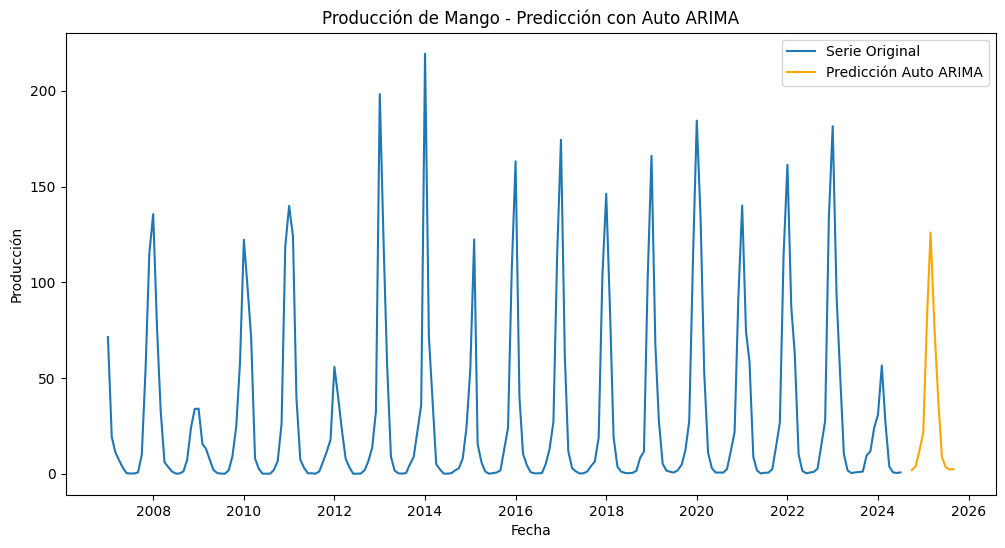

                Fecha  Predicción
2024-08-01 2024-09-30    1.900461
2024-09-01 2024-10-31    3.905497
2024-10-01 2024-11-30   12.092504
2024-11-01 2024-12-31   21.472387
2024-12-01 2025-01-31   82.542487
2025-01-01 2025-02-28  126.063732
2025-02-01 2025-03-31   76.820653
2025-03-01 2025-04-30   39.823596
2025-04-01 2025-05-31    8.709544
2025-05-01 2025-06-30    3.403111
2025-06-01 2025-07-31    2.273477
2025-07-01 2025-08-31    2.430098


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Supongamos que df es tu DataFrame y 'Producción' es la columna de interés.
# Asegúrate de que el índice del DataFrame sea de tipo datetime.
df.index = pd.to_datetime(df.index)

# Aplicar Auto ARIMA
auto_model = auto_arima(df['Producción'],
                        seasonal=True,
                        m=12,  # Período estacional de 12 para datos mensuales
                        trace=True,  # Mostrar el progreso de la búsqueda
                        error_action='ignore',  # Ignorar errores durante el ajuste
                        suppress_warnings=True,  # Suprimir advertencias
                        stepwise=True)  # Optimización rápida de parámetros

# Imprimir resumen del modelo encontrado
print(auto_model.summary())

# Realizar predicciones para los siguientes 12 meses (un año) como ejemplo
forecast = auto_model.predict(n_periods=12)

# Generar un índice de fechas adecuado para las predicciones
# Dado que el último dato es agosto 2024, queremos que las predicciones empiecen en septiembre 2024
future_dates = pd.date_range(start='2024-09-01', periods=12, freq='M')

# Crear un DataFrame con las predicciones
pred_df = pd.DataFrame({'Fecha': future_dates, 'Predicción': forecast})

# Graficar la serie original y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df['Producción'], label='Serie Original')
plt.plot(future_dates, forecast, label='Predicción Auto ARIMA', color='orange')
plt.title("Producción de Mango - Predicción con Auto ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

# Mostrar datos de predicción
print(pred_df)


#### Modelo
- **Modelo**: SARIMAX(1, 0, 0)x(1, 0, [1], 12)
  - Este modelo incluye un componente auto-regresivo (AR) de primer orden (1, 0, 0), y un componente estacional auto-regresivo y de media móvil (1, 0, [1], 12) con periodicidad de 12 meses.

#### Parámetros del Modelo
- **intercept**: 0.2040 (no significativo, p-valor > 0.05)
- **ar.L1** (Auto-regresivo de primer orden): 0.4588, significativo (p-valor < 0.05)
- **ar.S.L12** (Auto-regresivo estacional de primer orden): 0.9872, muy significativo (p-valor < 0.05)
- **ma.S.L12** (Media móvil estacional de primer orden): -0.7961, muy significativo (p-valor < 0.05)
- **sigma2** (Varianza del error): 518.8155, muy significativo (p-valor < 0.05)

#### Métricas de Evaluación
- **Log Likelihood**: -968.601
- **AIC (Akaike Information Criterion)**: 1947.201
- **BIC (Bayesian Information Criterion)**: 1963.961
- **HQIC (Hannan-Quinn Information Criterion)**: 1953.976

Estas métricas se utilizan para comparar diferentes modelos, donde valores más bajos indican un mejor ajuste.

#### Pruebas de Diagnóstico
- **Ljung-Box (L1) (Q)**: 0.01 (Prob(Q): 0.92) — No hay evidencia de autocorrelación en los residuos.
- **Jarque-Bera (JB)**: 734.47 (Prob(JB): 0.00) — Los residuos no se distribuyen normalmente.
- **Heteroskedasticity (H)**: 0.98 (Prob(H) (two-sided): 0.92) — No hay evidencia de heterocedasticidad.
- **Skew**: 1.34 — Indica asimetría en los residuos.
- **Kurtosis**: 11.74 — Indica una mayor curtosis, sugiriendo colas más pesadas en la distribución.

### Conclusión
- **Significancia de Parámetros**: Los parámetros AR y MA estacionales son significativos, mientras que el intercepto no lo es.
- **Diagnóstico de Residuos**: Aunque los residuos no son normalmente distribuidos, no hay evidencia de autocorrelación ni heterocedasticidad fuerte, lo cual es positivo para el modelo.
- **Ajuste del Modelo**: Los valores de AIC y BIC indican un ajuste razonable, aunque podrías explorar otros modelos o ajustar parámetros para mejorar el ajuste.


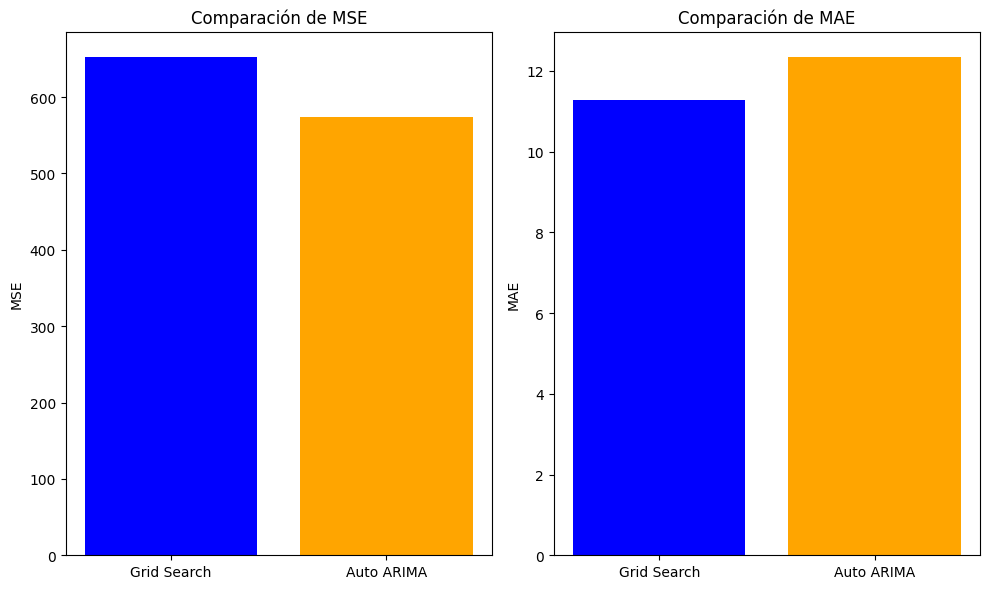

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Dividir los datos en conjunto de entrenamiento y de prueba
train_size = int(len(df) * 0.8)  # Usar el 80% de los datos para entrenamiento
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Aplicar Grid Search con SARIMAX
model_grid = SARIMAX(train['Producción'], order=(0, 0, 1), seasonal_order=(1, 1, 1, 12))
results_grid = model_grid.fit()
predictions_grid = results_grid.get_forecast(steps=len(test)).predicted_mean

# Calcular métricas para Grid Search
mse_grid = mean_squared_error(test['Producción'], predictions_grid)
mae_grid = mean_absolute_error(test['Producción'], predictions_grid)

# Aplicar Auto ARIMA
auto_model = auto_arima(train['Producción'], seasonal=True, m=12, stepwise=True, suppress_warnings=True)
predictions_auto_arima = auto_model.predict(n_periods=len(test))

# Calcular métricas para Auto ARIMA
mse_auto_arima = mean_squared_error(test['Producción'], predictions_auto_arima)
mae_auto_arima = mean_absolute_error(test['Producción'], predictions_auto_arima)

# Comparar las métricas en un gráfico de barras
metrics_df = pd.DataFrame({
    'Modelo': ['Grid Search', 'Auto ARIMA'],
    'MSE': [mse_grid, mse_auto_arima],
    'MAE': [mae_grid, mae_auto_arima]
})

# Gráfico de comparación de métricas
plt.figure(figsize=(10, 6))

# MSE
plt.subplot(1, 2, 1)
plt.bar(metrics_df['Modelo'], metrics_df['MSE'], color=['blue', 'orange'])
plt.title('Comparación de MSE')
plt.ylabel('MSE')

# MAE
plt.subplot(1, 2, 2)
plt.bar(metrics_df['Modelo'], metrics_df['MAE'], color=['blue', 'orange'])
plt.title('Comparación de MAE')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()


La configuración SARIMA identificada mediante la técnica de grid search (basada en backtesting con error medio absoluto) ofrece resultados ligeramente peores que el Auto Arima, por tanto el best model que emplearemos es el Auto ARIMA.

## 2. Estimación:

In [ ]:
# Modelo SARIMA
model = SARIMAX(train['Producción'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 12))
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           Producción   No. Observations:                  168
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -778.677
Date:                              Fri, 06 Dec 2024   AIC                           1565.354
Time:                                      01:14:28   BIC                           1577.850
Sample:                                  01-01-2007   HQIC                          1570.425
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4349      0.049      8.924      0.000       0.339       0.530
ar.S.L12       0.98

El modelo SARIMAX(1, 0, 0)x(1, 0, [1], 12) ajustado a la serie de Producción con 168 observaciones muestra que los coeficientes auto-regresivos (AR) y de media móvil estacionales (MA) son altamente significativos. El estadístico AIC es 1565.354, indicando un ajuste razonable del modelo. Las pruebas de diagnóstico sugieren que los residuos no son normalmente distribuidos y presentan asimetría y curtosis elevada, pero no muestran autocorrelación significativa ni heterocedasticidad marcada, lo cual sugiere que el modelo captura bien la estructura estacional de los datos.

## 3. Chequeo

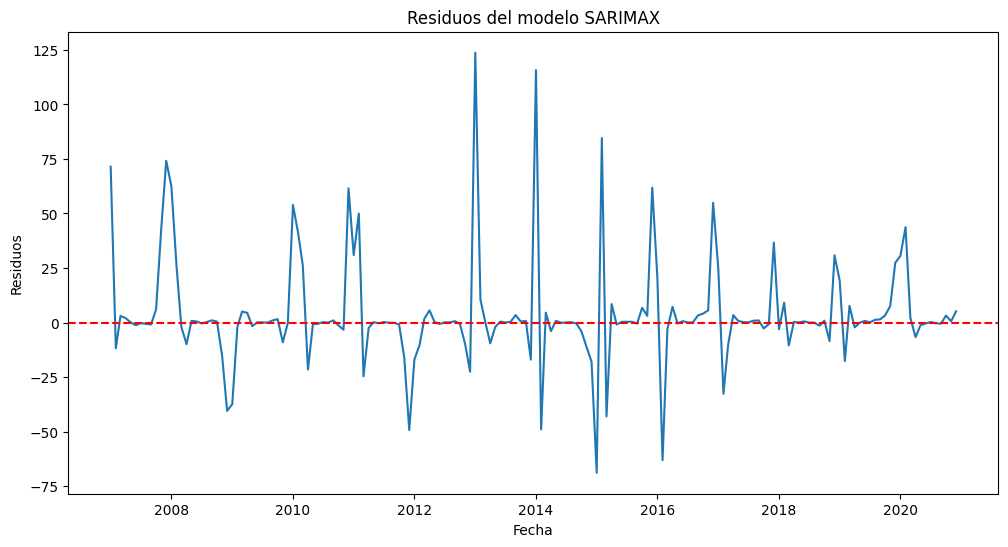

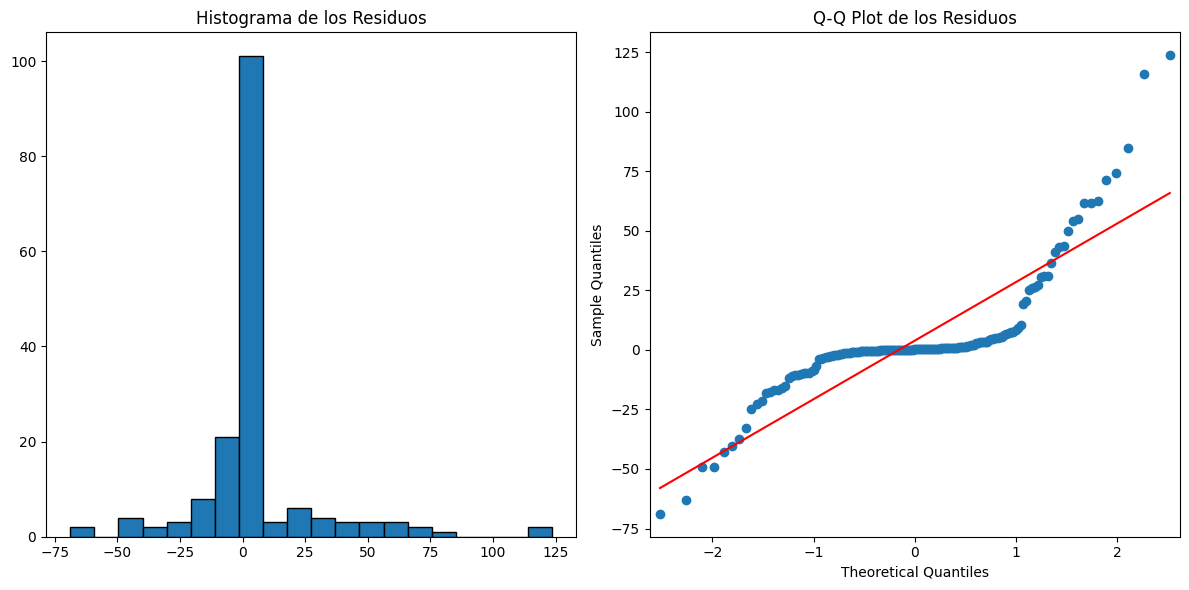

Prueba de Ljung-Box para residuos:
      lb_stat  lb_pvalue
10  2.290174   0.993594
15  7.911175   0.927294
20  7.968099   0.992077


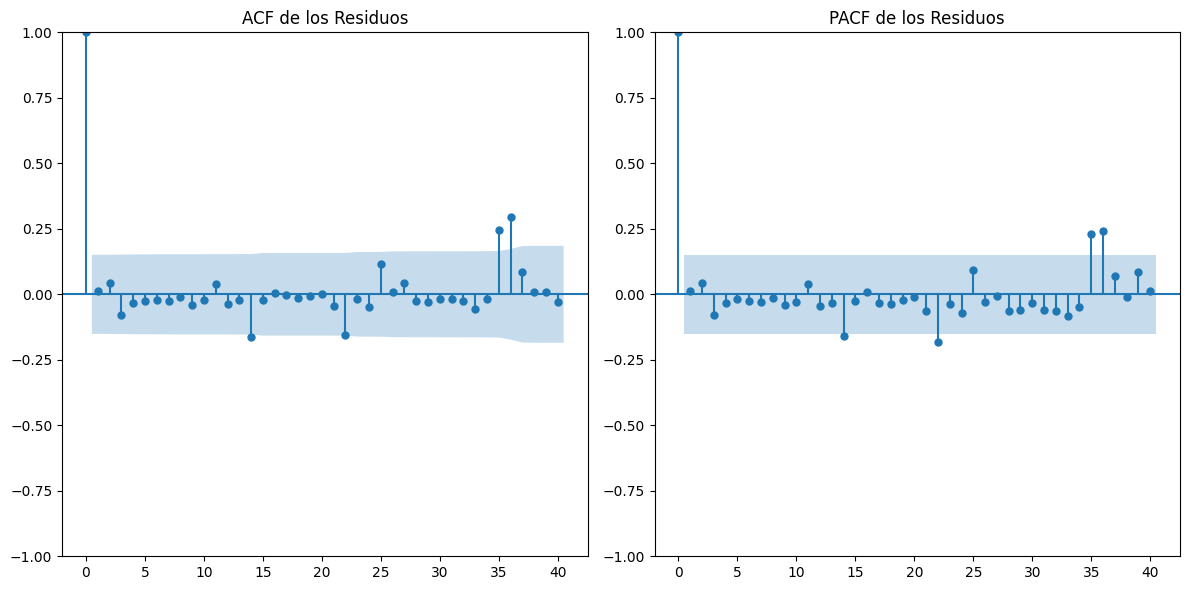

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Extraer los residuos del modelo
residuals = results.resid

# Gráfico de los residuos
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuos del modelo SARIMAX')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Histograma y Q-Q plot para verificar la normalidad
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histograma de los Residuos')

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot de los Residuos')

plt.tight_layout()
plt.show()

# Prueba de Ljung-Box para verificar la autocorrelación de los residuos
ljung_box_result = acorr_ljungbox(residuals, lags=[10, 15, 20], return_df=True)
print("Prueba de Ljung-Box para residuos:\n", ljung_box_result)

# Gráficos de ACF y PACF de los residuos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('ACF de los Residuos')

plt.subplot(1, 2, 2)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.title('PACF de los Residuos')

plt.tight_layout()
plt.show()

Distribución de los Residuos:

Histograma de Residuos: La mayoría de los residuos están centrados alrededor de cero, lo cual sugiere que el modelo está haciendo predicciones razonablemente precisas. Sin embargo, hay algunos residuos que se desvían significativamente de cero, lo que indica la presencia de valores atípicos o inexactitudes en el modelo.

Q-Q Plot de Residuos: Los puntos deberían alinearse con la línea roja si los residuos siguen una distribución normal. En este caso, los puntos se desvían de la línea, especialmente en las colas, indicando que los residuos no son perfectamente normales. Esto puede sugerir problemas con las suposiciones del modelo o la presencia de valores atípicos.

Prueba de Ljung-Box para Residuos:

La prueba de Ljung-Box para diferentes rezagos (10, 15 y 20) muestra que los valores p son todos mayores a 0.05, indicando que no hay autocorrelación significativa en los residuos. Esto sugiere que el modelo ha capturado adecuadamente la estructura de la serie temporal.

Conclusión
Normalidad de Residuos: Aunque los residuos no siguen perfectamente una distribución normal, la ausencia de autocorrelación significativa sugiere que el modelo está bien ajustado en términos de estructura de serie temporal.

Valores Atípicos: La presencia de residuos que se desvían significativamente de cero y la desviación en el Q-Q plot indican que podrían existir valores atípicos o inexactitudes que el modelo no ha capturado.

## 4. Predicción:

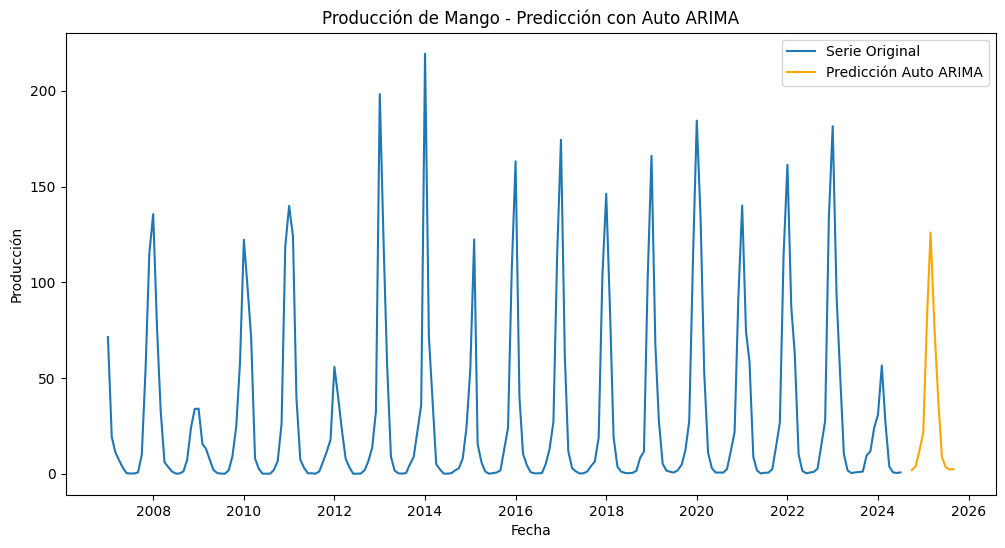

In [ ]:
# Realizar predicciones para los siguientes 12 meses (un año) como ejemplo
forecast = auto_model.predict(n_periods=12)

# Generar un índice de fechas adecuado para las predicciones
# Dado que el último dato es agosto 2024, queremos que las predicciones empiecen en septiembre 2024
future_dates = pd.date_range(start='2024-09-01', periods=12, freq='M')

# Crear un DataFrame con las predicciones
pred_df = pd.DataFrame({'Fecha': future_dates, 'Predicción': forecast})

# Graficar la serie original y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df['Producción'], label='Serie Original')
plt.plot(future_dates, forecast, label='Predicción Auto ARIMA', color='orange')
plt.title("Producción de Mango - Predicción con Auto ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

Tendencias Históricas: La serie original muestra variaciones en la producción de mango con posibles picos estacionales, que pueden estar influenciados por factores como el clima, las prácticas agrícolas y la demanda del mercado.

Predicción Futura: La predicción realizada por el modelo Auto ARIMA sugiere una tendencia en la producción de mango para los próximos años. Al utilizar un modelo estacional, se espera que las predicciones capten los patrones repetitivos observados en los datos históricos.

Planificación y Decisiones: Este gráfico es crucial para la planificación y toma de decisiones en la industria agrícola. Permite a los agricultores y planificadores anticiparse a los picos y valles de producción, optimizando así la gestión de recursos y la logística.

## 5. Corroboración:

Resultados del Modelo SARIMAX
                                      SARIMAX Results                                       
Dep. Variable:                           Producción   No. Observations:                  199
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -836.632
Date:                              Fri, 06 Dec 2024   AIC                           1681.263
Time:                                      01:16:08   BIC                           1694.166
Sample:                                  01-01-2007   HQIC                          1686.492
                                       - 07-01-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3258      0.041      7.854      0.000       0.245  

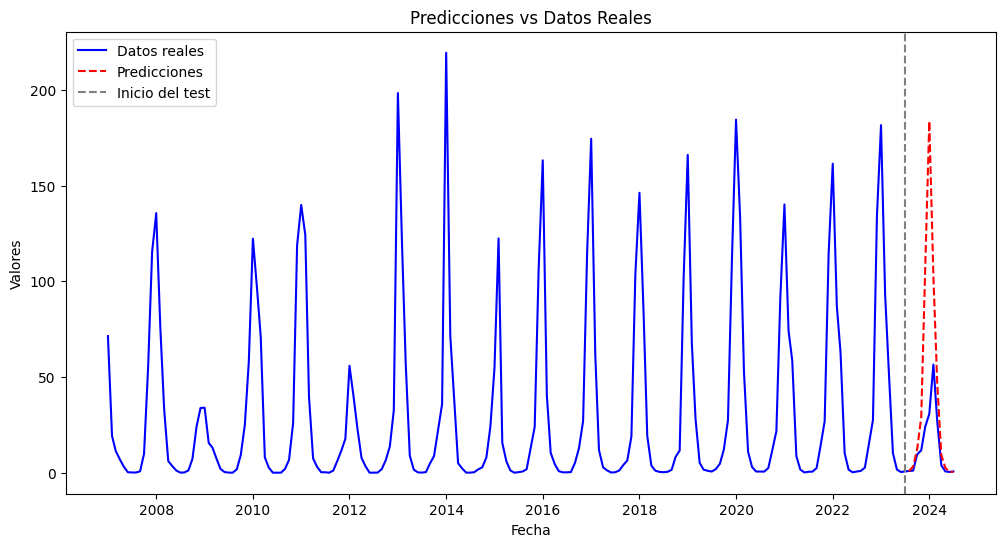

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Ruta del archivo de Excel
ruta_archivo = '/content/mango.xlsx'  # Ajusta esta ruta si es necesario

# Leer el archivo de Excel
df = pd.read_excel(ruta_archivo)

# Convertir la columna de 'fecha' al tipo de dato datetime especificando el formato
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no parseadas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'fecha' como índice
df.set_index('Fecha', inplace=True)
data = df['Producción']  # Reemplaza 'Valor' con la columna que contiene los datos de tu serie temporal

# Separar los últimos 12 datos
train = data[:-12]
test = data[-12:]

# Ajustar el modelo SARIMAX(2,0,2)(1,0,1)[12] en los datos de entrenamiento
model = SARIMAX(train,
                order=(1, 0, 0),
                seasonal_order=(1, 0, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Predecir los últimos 12 valores
forecast = results.forecast(steps=12)

# Comparar predicciones con los datos reales
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print("Resultados del Modelo SARIMAX")
print(results.summary())
print("\nMétricas de Evaluación:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Visualizar predicciones frente a los datos reales
plt.figure(figsize=(12, 6))
plt.plot(data, label='Datos reales', color='blue')
plt.plot(test.index, forecast, label='Predicciones', color='red', linestyle='--')
plt.axvline(x=train.index[-1], color='gray', linestyle='--', label='Inicio del test')
plt.legend()
plt.title("Predicciones vs Datos Reales")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.show()


### Análisis de los Resultados del Modelo SARIMAX

#### Modelo
- **Modelo**: SARIMAX(1, 0, 0)x(1, 0, [1], 12)
  - Este modelo incluye un componente auto-regresivo (AR) de primer orden y componentes estacionales AR y MA con periodicidad de 12 meses.

#### Parámetros del Modelo
- **ar.L1** (Auto-regresivo de primer orden): 0.3258, muy significativo (p-valor < 0.05)
- **ar.S.L12** (Auto-regresivo estacional de primer orden): 1.0314, muy significativo (p-valor < 0.05)
- **ma.S.L12** (Media móvil estacional de primer orden): -1.0000, muy significativo (p-valor < 0.05)
- **sigma2** (Varianza del error): 394.4143, muy significativo (p-valor < 0.05)

#### Métricas de Evaluación
- **Log Likelihood**: -836.632
- **AIC (Akaike Information Criterion)**: 1681.263
- **BIC (Bayesian Information Criterion)**: 1694.166
- **HQIC (Hannan-Quinn Information Criterion)**: 1686.492
- **RMSE (Root Mean Squared Error)**: 52.49
- **MAE (Mean Absolute Error)**: 27.60

Estas métricas se utilizan para comparar diferentes modelos, donde valores más bajos indican un mejor ajuste.

#### Pruebas de Diagnóstico
- **Ljung-Box (L1) (Q)**: 0.04 (Prob(Q): 0.83) — No hay evidencia de autocorrelación en los residuos.
- **Jarque-Bera (JB)**: 407.92 (Prob(JB): 0.00) — Los residuos no se distribuyen normalmente.
- **Heteroskedasticity (H)**: 0.24 (Prob(H) (two-sided): 0.00) — Existe evidencia de heterocedasticidad.
- **Skew**: 0.87 — Indica asimetría en los residuos.
- **Kurtosis**: 10.04 — Indica una mayor curtosis, sugiriendo colas más pesadas en la distribución.

### Conclusión
- **Significancia de Parámetros**: Los parámetros AR y MA estacionales son muy significativos, lo que sugiere que estos componentes son importantes para capturar la dinámica de la serie temporal.
- **Diagnóstico de Residuos**: Aunque los residuos no siguen perfectamente una distribución normal y presentan heterocedasticidad, no hay autocorrelación significativa, lo cual es positivo para el modelo.
- **Ajuste del Modelo**: Los valores de AIC, BIC, RMSE y MAE indican un ajuste razonable, aunque podrías explorar otros modelos o ajustar parámetros para mejorar el ajuste.

        Fecha  Producción Real  Predicción  Error Absoluto  Error al Cuadrado  \
0  2023-08-01        -0.144111   -0.000001        0.144110           0.020768   
1  2023-09-01        -1.461543   -0.000002        1.461541           2.136103   
2  2023-10-01        -3.733006   -0.000002        3.733004          13.935322   
3  2023-11-01       -10.514159   -0.000002       10.514157         110.547505   
4  2023-12-01       -94.049379   -0.000002       94.049377        8845.285384   
5  2024-01-01       -40.939384   -0.000002       40.939382        1676.033029   
6  2024-02-01       114.042691   -0.000002      114.042693       13005.735742   
7  2024-03-01        10.698580   -0.000002       10.698582         114.459649   
8  2024-04-01        19.645130   -0.000002       19.645132         385.931197   
9  2024-05-01         5.407610   -0.000002        5.407612          29.242264   
10 2024-06-01         1.015011   -0.000002        1.015013           1.030251   
11 2024-07-01        -0.0433

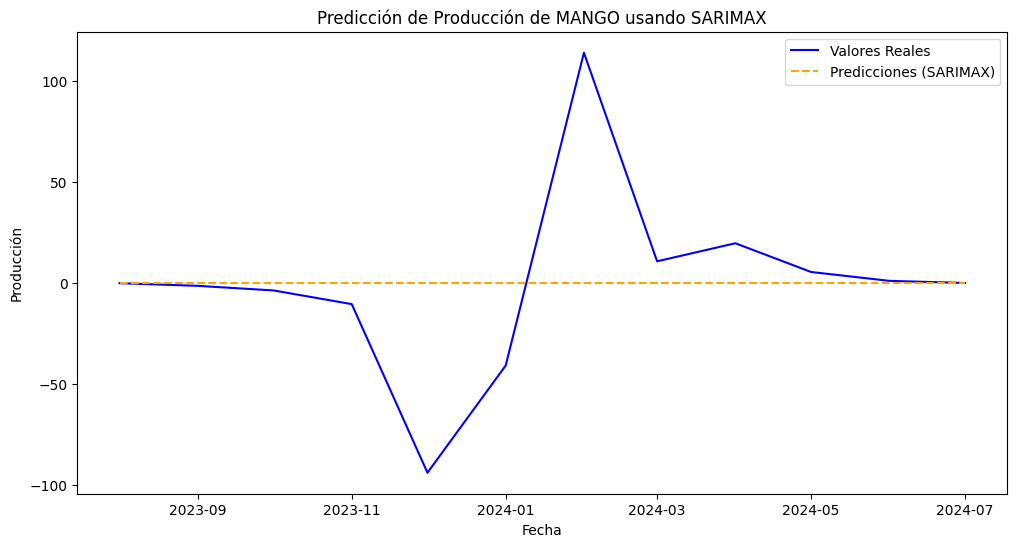

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Comparar predicciones con los datos reales
errors = test.values - forecast.values   # Tomar solo los primeros 8 datos

# Dado: Varianza base
variance = 3.828274

# Calcular la desviación estándar del error para cada punto, de atrás hacia adelante
std_devs = []
for i in range(len(errors)-1, -1, -1):  # Iniciar desde el último dato
    cumulative_sum = np.sum(errors[i:]**2)  # Acumulación de errores al cuadrado desde el dato i hacia el final
    std_dev = np.sqrt(variance * (1 + cumulative_sum))  # Desviación estándar acumulada
    std_devs.insert(0, std_dev)  # Insertar al principio de la lista para que se mantenga el orden correcto

# Calcular el Error al Cuadrado
errors_squared = errors ** 2

# Calcular la varianza (al cuadrado de la desviación estándar)
variance_u = [std_dev ** 2 for std_dev in std_devs]

# Sumar la varianza y el error al cuadrado
sum_variance = np.sum(variance_u)  # Suma de la varianza
sum_squared_errors = np.sum(errors_squared)  # Suma del error al cuadrado

# Multiplicar la suma de la varianza y la suma del error al cuadrado para obtener ACOR
acor = sum_variance * sum_squared_errors

# Crear un DataFrame de resultados
results_df = pd.DataFrame({
    'Fecha': test.index,
    'Producción Real': test.values,
    'Predicción': forecast.values,
    'Error Absoluto': np.abs(errors),
    'Error al Cuadrado': errors_squared,
    'Desviación Estándar': std_devs,
    'Varianza': variance_u
})

# Mostrar la tabla de resultados
print(results_df)

# Mostrar los cálculos clave
print("\nCálculos adicionales:")
print(f"Suma de la Varianza: {sum_variance:.2f}")
print(f"Suma del Error al Cuadrado: {sum_squared_errors:.2f}")
print(f"ACOR (Suma de Varianza x Suma de Errores al Cuadrado): {acor:.2f}")

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Valores Reales', color='blue')
plt.plot(test.index, forecast, label='Predicciones (SARIMAX)', color='orange', linestyle='--')
plt.title("Predicción de Producción de MANGO usando SARIMAX")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

        Fecha  Producción Real  Predicción  Error Absoluto  \
0  2023-08-01        -0.144111   -0.000001        0.144110   
1  2023-09-01        -1.461543   -0.000002        1.461541   
2  2023-10-01        -3.733006   -0.000002        3.733004   
3  2023-11-01       -10.514159   -0.000002       10.514157   
4  2023-12-01       -94.049379   -0.000002       94.049377   
5  2024-01-01       -40.939384   -0.000002       40.939382   
6  2024-02-01       114.042691   -0.000002      114.042693   
7  2024-03-01        10.698580   -0.000002       10.698582   
8  2024-04-01        19.645130   -0.000002       19.645132   
9  2024-05-01         5.407610   -0.000002        5.407612   
10 2024-06-01         1.015011   -0.000002        1.015013   
11 2024-07-01        -0.043361   -0.000002        0.043359   

    Desviación Estándar del Error            EPG         EPR  \
0                      471.061029 -640672.548750  -99.999102   
1                      471.060827  -63171.539963  -99.999889   
2

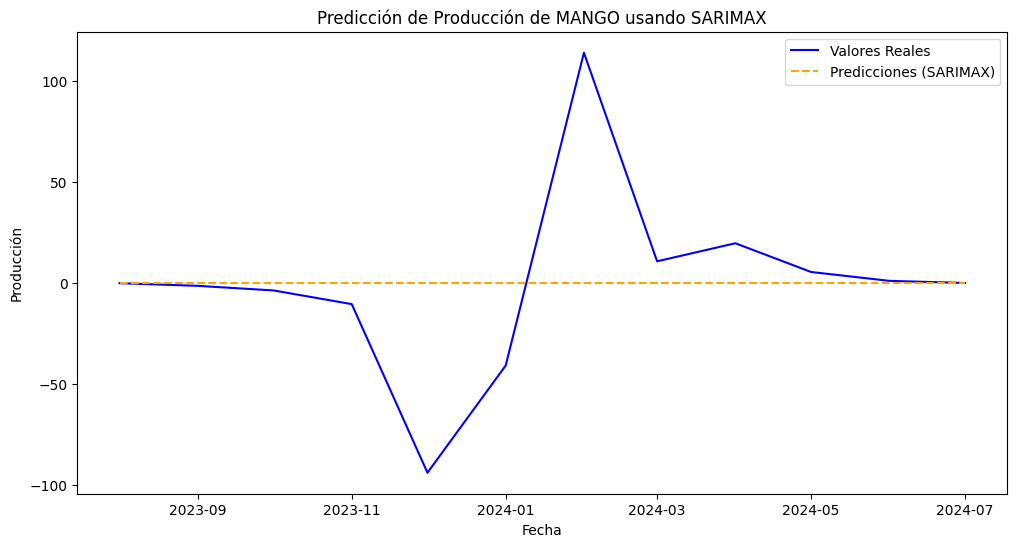

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Comparar predicciones con los datos reales
errors = test.values - forecast.values

# Calcular la desviación estándar del error para cada punto, de atrás hacia adelante
std_devs = []
for i in range(len(errors)-1, -1, -1):  # Iniciar desde el último dato
    cumulative_sum = np.sum(errors[i:]**2)  # Acumulación de errores al cuadrado desde el dato i hacia el final
    std_dev = np.sqrt(variance * (1 + cumulative_sum))  # Desviación estándar acumulada
    std_devs.insert(0, std_dev)  # Insertar al principio de la lista para que se mantenga el orden correcto

# Calcular el EPG y EPR
epg = [(1.96 * std_devs[i] / test.values[i]) * 100 for i in range(len(errors))]
epr = [(np.abs(errors[i]) / test.values[i]) * 100 for i in range(len(errors))]

# Diferencia entre EPG y EPR
epg_epr_diff = [epg[i] - epr[i] for i in range(len(errors))]

# Crear un DataFrame de resultados
results_df = pd.DataFrame({
    'Fecha': test.index,
    'Producción Real': test.values,
    'Predicción': forecast.values,
    'Error Absoluto': np.abs(errors),
    'Desviación Estándar del Error': std_devs,
    'EPG': epg,
    'EPR': epr,
    'Diferencia EPG - EPR': epg_epr_diff
})

# Agregar la columna de "Corroboración"
results_df['Corroboración'] = np.where(results_df['EPG'] > results_df['EPR'], 'SI', 'NO')

# Guardar la tabla de resultados en un archivo Excel
results_df.to_excel('/content/Resultados_Predicciones_Cafe.xlsx', index=False)

# Mostrar la tabla de resultados
print(results_df)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Valores Reales', color='blue')
plt.plot(test.index, forecast, label='Predicciones (SARIMAX)', color='orange', linestyle='--')
plt.title("Predicción de Producción de MANGO usando SARIMAX")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

                Fecha  Producción Real  Predicción  Error Absoluto  \
Fecha                                                                
2021-02-01 2021-02-01        74.181178   75.213657       -1.032479   
2021-03-01 2021-03-01        58.621750   28.429335       30.192415   
2021-04-01 2021-04-01         8.706150    8.689625        0.016525   
2021-05-01 2021-05-01         1.671700    4.024907       -2.353207   
2021-06-01 2021-06-01         0.183440    0.329512       -0.146072   
2021-07-01 2021-07-01         0.541630    0.149205        0.392425   
2021-08-01 2021-08-01         0.620980    0.849791       -0.228811   
2021-09-01 2021-09-01         2.470286    4.113503       -1.643217   
2021-10-01 2021-10-01        14.114600   10.755203        3.359397   
2021-11-01 2021-11-01        26.964487   26.479267        0.485220   
2021-12-01 2021-12-01       114.434969  121.076741       -6.641772   
2022-01-01 2022-01-01       161.413018  161.236465        0.176553   
2022-02-01 2022-02-0

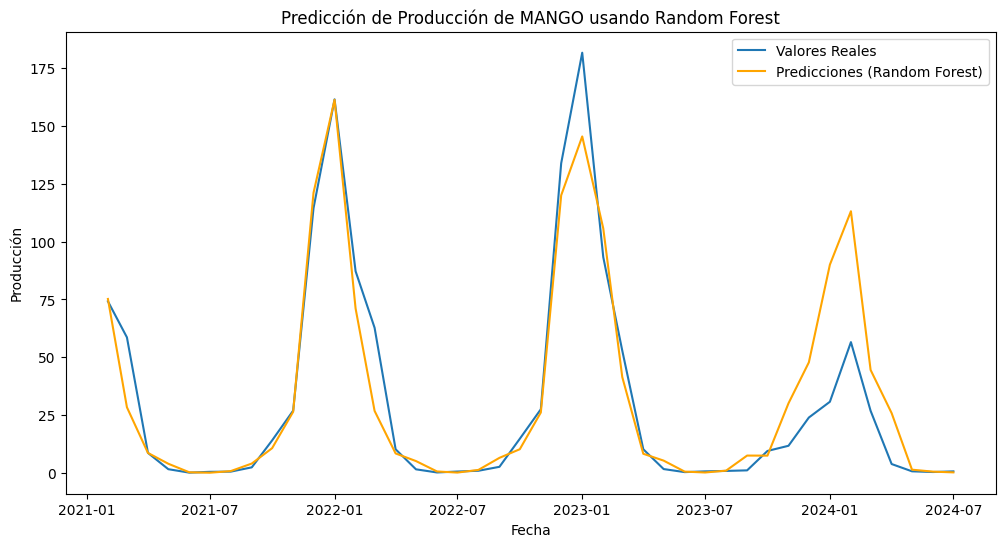

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Ruta del archivo subido
ruta_archivo = '/content/mango.xlsx'  # Ajusta esta ruta si es necesario

# Leer el archivo de Excel
df = pd.read_excel(ruta_archivo)

# Convertir la columna de 'fecha' al tipo de dato datetime especificando el formato
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no parseadas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'fecha' como índice
df.set_index('Fecha', inplace=True)

# Generar características de rezago (lags) para usar en el modelo
df['Producción_Lag1'] = df['Producción'].shift(1)
df['Producción_Lag2'] = df['Producción'].shift(2)
df['Producción_Lag3'] = df['Producción'].shift(3)
df.dropna(inplace=True)  # Eliminar filas con valores NaN debido a los lags

# Separar las características (X) y la variable objetivo (y)
X = df[['Producción_Lag1', 'Producción_Lag2', 'Producción_Lag3']]
y = df['Producción']

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Entrenar el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular el error absoluto y la desviación estándar del error
errors = y_test - predictions
std_dev_error = np.std(errors)

# Calcular el Error Promedio Geométrico (EPG) y el Error Promedio Relativo (EPR)
epg = np.mean(np.abs(errors))
epr = np.mean(np.abs(errors / y_test))
# Diferencia entre EPG y EPR
epg_epr_diff = epg - epr

# Crear un DataFrame de resultados
results_df = pd.DataFrame({
    'Fecha': y_test.index,
    'Producción Real': y_test,
    'Predicción': predictions,
    'Error Absoluto': errors,
    'Desviación Estándar del Error': std_dev_error,
    'EPG': epg,
    'EPR': epr,
    'Diferencia EPG - EPR': epg - epr
})

# Agregar la columna de "Corroboración"
results_df['Corroboración'] = np.where(results_df['EPG'] > results_df['EPR'], 'SI', 'NO')


# Mostrar la tabla de resultados
print(results_df)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Valores Reales')
plt.plot(y_test.index, predictions, label='Predicciones (Random Forest)', color='orange')
plt.title("Predicción de Producción de MANGO usando Random Forest")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

Análisis e Interpretación
Eje Horizontal (Fecha): Cubre desde enero de 2021 hasta julio de 2024, mostrando un período de más de tres años.

Eje Vertical (Producción): Rango de 0 a 175, indicando la cantidad de producción en cada período.

Valores Reales: Representados por una línea continua, muestran fluctuaciones en la producción de café con picos anuales pronunciados.

Predicciones (Random Forest): La línea de predicción sigue de cerca la línea de valores reales, lo que sugiere que el modelo Random Forest es efectivo para capturar la estacionalidad y las tendencias en los datos de producción.

## 6. Inteverción

### Comparación de modelos:

Datos cargados:
            Producción    Retardo  Intervención
Fecha                                          
2007-01-01   71.425080  19.263348             0
2007-02-01   19.263348  11.434269             0
2007-03-01   11.434269   7.047080             0
2007-04-01    7.047080   3.221000             0
2007-05-01    3.221000   0.300840             0


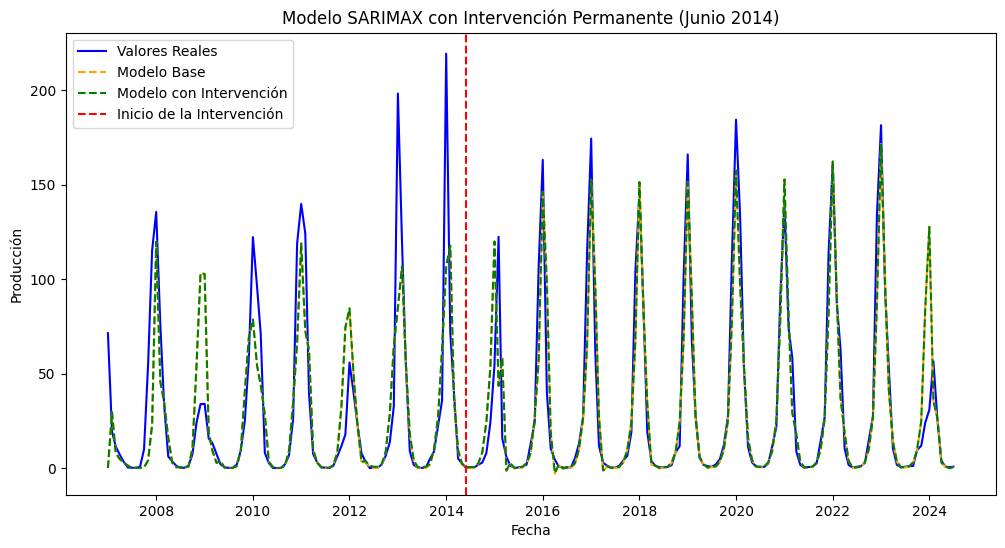

                                      SARIMAX Results                                       
Dep. Variable:                           Producción   No. Observations:                  211
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -903.463
Date:                              Fri, 06 Dec 2024   AIC                           1816.926
Time:                                      01:26:38   BIC                           1833.367
Sample:                                  01-01-2007   HQIC                          1823.581
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intervención     1.1694      8.420      0.139      0.890     -15.334      17.673
ar.L1        

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Ruta del archivo de Excel
ruta_archivo = '/content/mango.xlsx'

# Leer el archivo de Excel
df = pd.read_excel(ruta_archivo)

# Convertir la columna de 'fecha' al tipo de dato datetime especificando el formato
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no parseadas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'fecha' como índice
df.set_index('Fecha', inplace=True)

# Crear una columna de intervención (permanente desde junio de 2014)
df['Intervención'] = (df.index >= '2012-01-01').astype(int)

# Verificar los datos
print("Datos cargados:")
print(df.head())

# Ajustar el modelo SARIMAX sin intervención
modelo_base = SARIMAX(df['Producción'],
                      order=(1, 0, 0),
                      seasonal_order=(1, 0, 1, 12),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
resultados_base = modelo_base.fit(disp=False)

# Ajustar el modelo SARIMAX con intervención
modelo_intervencion = SARIMAX(df['Producción'],
                              order=(1, 0, 0),
                              seasonal_order=(1, 0, 1, 12),
                              exog=df[['Intervención']],
                              enforce_stationarity=False,
                              enforce_invertibility=False)
resultados_intervencion = modelo_intervencion.fit(disp=False)

# Predicciones
df['Predicción_Base'] = resultados_base.predict()
df['Predicción_Intervención'] = resultados_intervencion.predict(exog=df[['Intervención']])

r2 = r2_score(df['Producción'], df['Predicción_Intervención'])

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Producción'], label='Valores Reales', color='blue')
plt.plot(df.index, df['Predicción_Base'], label='Modelo Base', linestyle='--', color='orange')
plt.plot(df.index, df['Predicción_Intervención'], label='Modelo con Intervención', linestyle='--', color='green')
# Convert the date string to a pandas Timestamp object
plt.axvline(x=pd.Timestamp('2014-06-01'), color='red', linestyle='--', label='Inicio de la Intervención')
plt.title("Modelo SARIMAX con Intervención Permanente (Junio 2014)")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

# Resumen del modelo con intervención
print(resultados_intervencion.summary())

# Evaluar el impacto
impacto = resultados_intervencion.params['Intervención']
print(f"Impacto estimado de la intervención (permanente): {impacto:.2f}")
print(f'El R² del modelo es: {r2}')

### Análisis de los Resultados del Modelo SARIMAX

#### Parámetros del Modelo
- **Intervención**: 1.1694 (no significativo, p-valor > 0.05)
- **ar.L1** (Auto-regresivo de primer orden): 0.4138, muy significativo (p-valor < 0.05)
- **ar.S.L12** (Auto-regresivo estacional de primer orden): 1.0093, muy significativo (p-valor < 0.05)
- **ma.S.L12** (Media móvil estacional de primer orden): -1.0000, muy significativo (p-valor < 0.05)
- **sigma2** (Varianza del error): 452.4296, muy significativo (p-valor < 0.05)

#### Métricas de Evaluación
- **Log Likelihood**: -903.463
- **AIC (Akaike Information Criterion)**: 1816.926
- **BIC (Bayesian Information Criterion)**: 1833.367
- **HQIC (Hannan-Quinn Information Criterion)**: 1823.581

Estas métricas sugieren un ajuste razonable del modelo.

#### Pruebas de Diagnóstico
- **Ljung-Box (L1) (Q)**: 0.00 (Prob(Q): 0.97) — No hay evidencia de autocorrelación en los residuos.
- **Jarque-Bera (JB)**: 516.95 (Prob(JB): 0.00) — Los residuos no se distribuyen normalmente.
- **Heteroskedasticity (H)**: 0.71 (Prob(H) (two-sided): 0.17) — No hay evidencia fuerte de heterocedasticidad.
- **Skew**: 0.70 — Indica cierta asimetría en los residuos.
- **Kurtosis**: 10.79 — Indica una mayor curtosis, sugiriendo colas más pesadas en la distribución.

### Conclusión
- **Significancia de Parámetros**: Los parámetros AR y MA estacionales son muy significativos, lo cual es crucial para capturar la dinámica de la serie temporal.
- **Diagnóstico de Residuos**: Aunque los residuos no son normalmente distribuidos y muestran cierta asimetría y curtosis elevada, la ausencia de autocorrelación y heterocedasticidad significativa es positiva para el modelo.
- **Ajuste del Modelo**: Los valores de AIC, BIC y HQIC indican un ajuste razonable, lo que sugiere que el modelo puede capturar bien las características esenciales de los datos de producción.

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# Dividir la serie en períodos antes y después de la intervención
pre_intervencion = df[df.index < '2012-01-01']['Producción']
post_intervencion = df[df.index >= '2012-01-01']['Producción']

# Calcular medias y varianzas
media_pre = pre_intervencion.mean()
media_post = post_intervencion.mean()
varianza_pre = pre_intervencion.var()
varianza_post = post_intervencion.var()

# Prueba de diferencia de medias (t-test)
t_stat, p_val_ttest = ttest_ind(pre_intervencion, post_intervencion, equal_var=False)

# Prueba de diferencia de varianzas (F-test)
f_stat, p_val_ftest = f_oneway(pre_intervencion, post_intervencion)

# Imprimir resultados
print("Antes de la Intervención:")
print(f"Media: {media_pre:.2f}, Varianza: {varianza_pre:.2f}")

print("\nDespués de la Intervención:")
print(f"Media: {media_post:.2f}, Varianza: {varianza_post:.2f}")

print("\nResultados del Test de Diferencia de Medias (t-test):")
print(f"Estadístico t: {t_stat:.2f}, p-valor: {p_val_ttest:.4f}")
print("**Conclusión:**" + (" Cambio significativo en la media" if p_val_ttest < 0.05 else " No hay cambio significativo en la media"))

print("\nResultados del Test de Diferencia de Varianzas (F-test):")
print(f"Estadístico F: {f_stat:.2f}, p-valor: {p_val_ftest:.4f}")
print("**Conclusión:**" + (" Cambio significativo en la varianza" if p_val_ftest < 0.05 else " No hay cambio significativo en la varianza"))


Antes de la Intervención:
Media: 26.51, Varianza: 1595.24

Después de la Intervención:
Media: 32.51, Varianza: 2524.23

Resultados del Test de Diferencia de Medias (t-test):
Estadístico t: -0.91, p-valor: 0.3637
**Conclusión:** No hay cambio significativo en la media

Resultados del Test de Diferencia de Varianzas (F-test):
Estadístico F: 0.68, p-valor: 0.4095
**Conclusión:** No hay cambio significativo en la varianza


### Análisis de los Resultados de la Intervención

#### Estadísticas Descriptivas
**Antes de la Intervención:**
- **Media**: 26.51
- **Varianza**: 1595.24

**Después de la Intervención:**
- **Media**: 32.51
- **Varianza**: 2524.23

Estas estadísticas muestran un aumento en la media y la varianza de la producción después de la intervención.

#### Test de Diferencia de Medias (t-test)
- **Estadístico t**: -0.91
- **p-valor**: 0.3637
- **Conclusión**: El p-valor es mayor que 0.05, lo que indica que no hay evidencia suficiente para rechazar la hipótesis nula. Por lo tanto, no hay un cambio significativo en la media de producción antes y después de la intervención.

#### Test de Diferencia de Varianzas (F-test)
- **Estadístico F**: 0.68
- **p-valor**: 0.4095
- **Conclusión**: El p-valor también es mayor que 0.05, indicando que no hay evidencia suficiente para rechazar la hipótesis nula de igualdad de varianzas. Esto sugiere que la varianza de la producción no cambió significativamente tras la intervención.

### Conclusión General
A pesar del aparente aumento en la media y la varianza después de la intervención, los resultados de los tests estadísticos (t-test y F-test) muestran que estos cambios no son estadísticamente significativos. Esto implica que la intervención no tuvo un efecto detectable en la producción de mango en términos de la media y la varianza de los datos evaluados.

### Intervención brusca permanente

In [ ]:
# Ajustar el modelo con intervención brusca permanente
modelo_brusca_perm = SARIMAX(df['Producción'],
                             exog=df[['Intervención']],
                             order=(2, 0, 2),
                             seasonal_order=(1, 0, 1, 12),
                             enforce_stationarity=False,
                             enforce_invertibility=False)
resultados_brusca_perm = modelo_brusca_perm.fit(disp=False)

# Call predict on the results object, not the model object
df['Predicción_1'] = resultados_brusca_perm.predict(exog=df[['Intervención']]) # Pass the exog argument here

# Calcular R² manualmente
from sklearn.metrics import r2_score

# Pass the true values and the predicted values to r2_score
r2 = r2_score(df['Producción'], df['Predicción_1'])

# Mostrar resultados
print("Resultados de la intervención brusca permanente:")
print(resultados_brusca_perm.summary())
print(f'El R² del modelo es: {r2}')

Resultados de la intervención brusca permanente:
                                      SARIMAX Results                                       
Dep. Variable:                           Producción   No. Observations:                  211
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -901.551
Date:                              Fri, 06 Dec 2024   AIC                           1819.102
Time:                                      01:23:40   BIC                           1845.327
Sample:                                  01-01-2007   HQIC                          1829.719
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intervención    31.3793     10.062      3.118

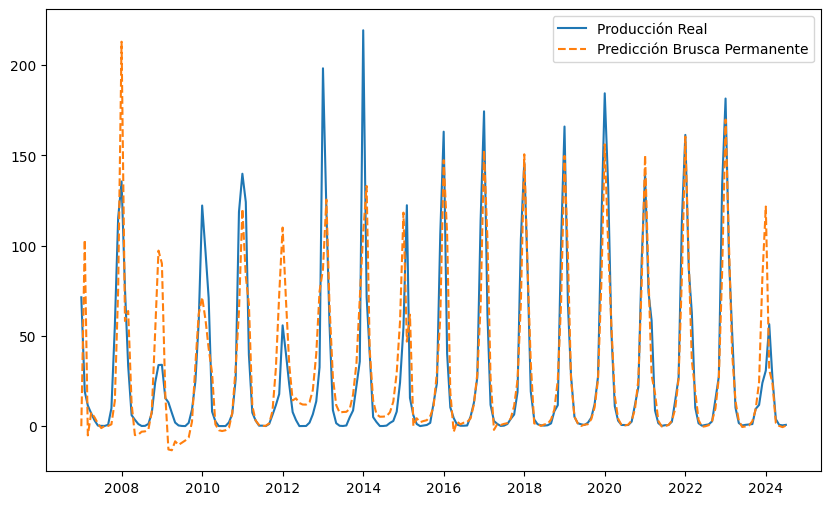

In [ ]:
# Graficar predicciones del modelo con intervención brusca permanente
df['Predicción_Brusca_Perm'] = resultados_brusca_perm.predict(start=df.index[0], end=df.index[-1], exog=df[['Intervención']])

plt.figure(figsize=(10, 6))
plt.plot(df['Producción'], label='Producción Real')
plt.plot(df['Predicción_Brusca_Perm'], label='Predicción Brusca Permanente', linestyle='--')
plt.legend()
plt.show()

### Intervención brusca con duración temporal

In [ ]:
# Crear variable para intervención brusca temporal (junio 2014 a diciembre 2014)
df['Intervención_Temporal'] = ((df.index >= '2012-01-01') & (df.index <= '2012-12-01')).astype(int)

# Ajustar el modelo con intervención brusca temporal
modelo_brusca_temp = SARIMAX(df['Producción'],
                             exog=df[['Intervención_Temporal']],
                             order=(2, 0, 2),
                             seasonal_order=(1, 0, 1, 12),
                             enforce_stationarity=False,
                             enforce_invertibility=False)
resultados_brusca_temp = modelo_brusca_temp.fit(disp=False)

# Call predict on the results object, not the model object
# Use the correct exogenous variable ('Intervención_Temporal') for prediction
df['Predicción_2'] = resultados_brusca_temp.predict(exog=df[['Intervención_Temporal']])

r2 = r2_score(df['Producción'], df['Predicción_2'])

# Mostrar resultados
print("Resultados de la intervención brusca temporal:")
print(resultados_brusca_temp.summary())
print(f'El R² del modelo es: {r2}')

Resultados de la intervención brusca temporal:
                                      SARIMAX Results                                       
Dep. Variable:                           Producción   No. Observations:                  211
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -898.196
Date:                              Fri, 06 Dec 2024   AIC                           1812.391
Time:                                      01:25:48   BIC                           1838.616
Sample:                                  01-01-2007   HQIC                          1823.009
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intervención_Temporal    10.8

### Intervención gradual con duración permanente

In [ ]:
# Crear variable para intervención gradual permanente
df['Intervención_Gradual_Perm'] = (df.index >= '2012-01-01').cumsum()

# Ajustar el modelo con intervención gradual permanente
modelo_gradual_perm = SARIMAX(df['Producción'],
                              exog=df[['Intervención_Gradual_Perm']],
                              order=(2, 0, 2),
                              seasonal_order=(1, 0, 1, 12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
resultados_gradual_perm = modelo_gradual_perm.fit(disp=False)

# Call predict on the results object, not the model object
df['Predicción_3'] = resultados_gradual_perm.predict(exog=df[['Intervención_Gradual_Perm']])

r2 = r2_score(df['Producción'], df['Predicción_3'])

# Mostrar resultados
print("Resultados de la intervención gradual permanente:")
print(resultados_gradual_perm.summary())
print(f'El R² del modelo es: {r2}')

Resultados de la intervención gradual permanente:
                                      SARIMAX Results                                       
Dep. Variable:                           Producción   No. Observations:                  211
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -894.116
Date:                              Fri, 06 Dec 2024   AIC                           1804.233
Time:                                      01:27:06   BIC                           1830.458
Sample:                                  01-01-2007   HQIC                          1814.850
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intervención_Gradu

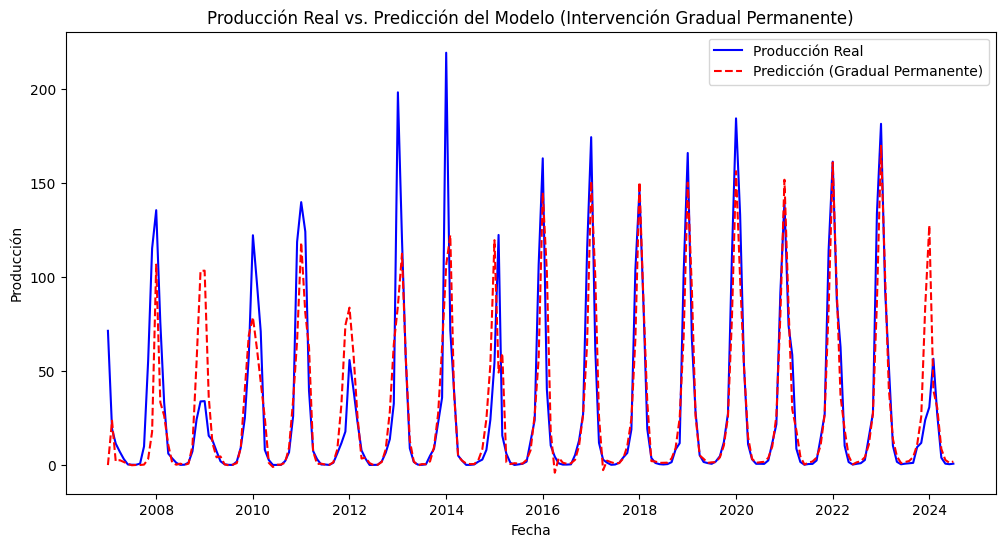

In [ ]:
import matplotlib.pyplot as plt

# Graficar la producción real y las predicciones
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Producción'], label='Producción Real', color='blue')
plt.plot(df.index, df['Predicción_3'], label='Predicción (Gradual Permanente)', linestyle='--', color='red')

plt.xlabel('Fecha')
plt.ylabel('Producción')
plt.title('Producción Real vs. Predicción del Modelo (Intervención Gradual Permanente)')
plt.legend()
plt.show()

### Intervención gradual con duración temporal

In [ ]:
# Crear variable para intervención gradual temporal (junio 2014 a diciembre 2014)
df['Intervención_Gradual_Temp'] = 0
df.loc[(df.index >= '2011-06-01') & (df.index <= '2012-01-01'), 'Intervención_Gradual_Temp'] = range(1, len(df.loc[(df.index >= '2011-06-01') & (df.index <= '2012-01-01')]) + 1)

# Ajustar el modelo con intervención gradual temporal
modelo_gradual_temp = SARIMAX(df['Producción'],
                              exog=df[['Intervención_Gradual_Temp']],
                              order=(2, 0, 2),
                              seasonal_order=(1, 0, 1, 12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
resultados_gradual_temp = modelo_gradual_temp.fit(disp=False)

# Call predict on the results object, not the model object
df['Predicción_4'] = resultados_gradual_temp.predict(exog=df[['Intervención_Gradual_Temp']])

r2 = r2_score(df['Producción'], df['Predicción_4'])

# Mostrar resultados
print("Resultados de la intervención gradual temporal:")
print(resultados_gradual_temp.summary())
print(f'El R² del modelo es: {r2}')

Resultados de la intervención gradual temporal:
                                      SARIMAX Results                                       
Dep. Variable:                           Producción   No. Observations:                  211
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -890.615
Date:                              Fri, 06 Dec 2024   AIC                           1797.230
Time:                                      01:28:22   BIC                           1823.455
Sample:                                  01-01-2007   HQIC                          1807.847
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intervención_Gradual

### Resumen de modelos

In [ ]:
# Comparar AIC de los modelos
print("AIC de los modelos:")
print(f"Modelo base (sin intervención): {resultados_base.aic}")
print(f"Intervención brusca permanente: {resultados_brusca_perm.aic}")
print(f"Intervención brusca temporal: {resultados_brusca_temp.aic}")
print(f"Intervención gradual permanente: {resultados_gradual_perm.aic}")
print(f"Intervención gradual temporal: {resultados_gradual_temp.aic}")

AIC de los modelos:
Modelo base (sin intervención): 1814.9621776349982
Intervención brusca permanente: 1819.101623252273
Intervención brusca temporal: 1812.3914445597902
Intervención gradual permanente: 1804.2326705406401
Intervención gradual temporal: 1797.2296075269878


In [ ]:
import pandas as pd
from sklearn.metrics import r2_score

# Assuming you have already generated the predictions for each model and stored them in df
# Change 'Intervención_Gradual_Temp' to the correct column name for your exogenous variable
# For example, if your exogenous variable is 'Intervención', use:
df['Predicción_Base'] = resultados_base.predict(exog=df[['Intervención']])
df['Predicción_1'] = resultados_brusca_perm.predict(exog=df[['Intervención']])
df['Predicción_2'] = resultados_brusca_temp.predict(exog=df[['Intervención']])
df['Predicción_3'] = resultados_gradual_perm.predict(exog=df[['Intervención']])
df['Predicción_4'] = resultados_gradual_temp.predict(exog=df[['Intervención']])

# Create a dictionary to store the results
resultados_comparacion = {
    'Modelo': ['Base (sin intervención)',
               'Brusca Permanente',
               'Brusca Temporal',
               'Gradual Permanente',
               'Gradual Temporal'],
    'R²': [
        r2_score(df['Producción'], df['Predicción_Base']),
        r2_score(df['Producción'], df['Predicción_1']),
        r2_score(df['Producción'], df['Predicción_2']),
        r2_score(df['Producción'], df['Predicción_3']),
        r2_score(df['Producción'], df['Predicción_4'])
    ],
    'AIC': [
        resultados_base.aic,
        resultados_brusca_perm.aic,
        resultados_brusca_temp.aic,
        resultados_gradual_perm.aic,
        resultados_gradual_temp.aic
    ],
    'BIC': [
        resultados_base.bic,
        resultados_brusca_perm.bic,
        resultados_brusca_temp.bic,
        resultados_gradual_perm.bic,
        resultados_gradual_temp.bic
    ],
    'HQIC': [
        resultados_base.hqic,
        resultados_brusca_perm.hqic,
        resultados_brusca_temp.hqic,
        resultados_gradual_perm.hqic,
        resultados_gradual_temp.hqic
    ]
}

# Convert the results to a DataFrame for better visualization
tabla_resultados = pd.DataFrame(resultados_comparacion)

# Show results
display(tabla_resultados)

Modelo        R²          AIC          BIC         HQIC
0  Base (sin intervención)  0.736697  1814.962178  1828.115246  1820.286102
1        Brusca Permanente  0.711618  1819.101623  1845.326541  1829.718727
2          Brusca Temporal  0.724324  1812.391445  1838.616362  1823.008548
3       Gradual Permanente  0.731726  1804.232671  1830.457588  1814.849774
4         Gradual Temporal  0.747782  1797.229608  1823.454525  1807.846711

Interpretación
R² (Coeficiente de Determinación):

El modelo de Gradual Temporal tiene el mayor R² (0.747782), lo que indica que explica mejor la variabilidad en los datos de producción en comparación con los otros modelos.

AIC (Akaike Information Criterion):

El modelo de Gradual Temporal también tiene el menor AIC (1797.229608), lo que sugiere que es el modelo más ajustado y adecuado entre los considerados.

BIC (Bayesian Information Criterion):

Nuevamente, el modelo de Gradual Temporal tiene el menor BIC (1823.454525), indicando su preferencia sobre los otros modelos.

HQIC (Hannan-Quinn Information Criterion):

El menor HQIC (1807.846711) también corresponde al modelo de Gradual Temporal, reafirmando su superioridad en términos de ajuste.

Conclusión
Entre los modelos evaluados, el Gradual Temporal es el más adecuado para explicar la producción de mango. Este modelo no solo tiene el mayor R², sino que también presenta los menores valores de AIC, BIC y HQIC, sugiriendo un mejor ajuste y capacidad predictiva en comparación con los otros modelos.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Ruta del archivo de Excel
ruta_archivo = '/content/mango.xlsx'

# Leer el archivo de Excel
df = pd.read_excel(ruta_archivo)

# Convertir la columna de 'fecha' al tipo de dato datetime especificando el formato
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no parseadas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'fecha' como índice
df.set_index('Fecha', inplace=True)

# Crear variable de intervención gradual temporal (junio 2014 a diciembre 2014)
df['Intervención_Gradual_Temp'] = 0
df.loc[(df.index >= '2014-06-01') & (df.index <= '2014-12-31'), 'Intervención_Gradual_Temp'] = range(1, len(df.loc[(df.index >= '2014-06-01') & (df.index <= '2014-12-31')]) + 1)

# Ajustar el modelo con intervención gradual temporal
modelo_gradual_temp = SARIMAX(df['Producción'],
                              exog=df[['Intervención_Gradual_Temp']],
                              order=(2, 0, 2),
                              seasonal_order=(1, 0, 1, 12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
resultados_gradual_temp = modelo_gradual_temp.fit(disp=False)

# Predicción
df['Predicción_Gradual_Temp'] = resultados_gradual_temp.predict(exog=df[['Intervención_Gradual_Temp']])

# Calcular EPG
epg_gradual_temp = np.mean(np.abs(df['Producción'] - df['Predicción_Gradual_Temp']))
print(f'EPG del modelo con intervención gradual temporal: {epg_gradual_temp}')

# Calcular EPR
epr_gradual_temp = np.mean(np.abs((df['Producción'] - df['Predicción_Gradual_Temp']) / df['Producción']))
print(f'EPR del modelo con intervención gradual temporal: {epr_gradual_temp}%')

# Comparar predicciones con los datos reales para el modelo con intervención
errors = df['Producción'].values[:8] - df['Predicción_Gradual_Temp'].values[:8]  # Tomar solo los primeros 8 datos
errors_squared = errors ** 2

# Dado: Varianza base
variance = 3.828274

# Calcular las desviaciones estándar según el rango indicado
std_devs = []
for i in range(len(errors)):
    if i == 0:
        cumulative_sum = np.sum(errors_squared[:7])  # Dato cero: errores del dato 0 al 6
    elif i == 1:
        cumulative_sum = np.sum(errors_squared[:6])  # Dato uno: errores del dato 0 al 5
    elif i == 2:
        cumulative_sum = np.sum(errors_squared[:5])  # Dato dos: errores del dato 0 al 4
    elif i == 3:
        cumulative_sum = np.sum(errors_squared[:4])  # Dato tres: errores del dato 0 al 3
    elif i == 4:
        cumulative_sum = np.sum(errors_squared[:3])  # Dato cuatro: errores del dato 0 al 2
    elif i == 5:
        cumulative_sum = np.sum(errors_squared[:2])  # Dato cinco: errores del dato 0 al 1
    elif i == 6:
        cumulative_sum = np.sum(errors_squared[:1])  # Dato seis: errores del dato 0
    else:
        cumulative_sum = 0  # Dato siete: no hay acumulación adicional
    std_dev = np.sqrt(variance * (1 + cumulative_sum))
    std_devs.append(std_dev)

# Calcular las varianzas individuales
variance_u = [std_dev ** 2 for std_dev in std_devs]

# Sumar la varianza y el error al cuadrado
sum_variance = np.sum(variance_u)  # Suma de la varianza
sum_squared_errors = np.sum(errors_squared)  # Suma del error al cuadrado

# Multiplicar la suma de la varianza y la suma del error al cuadrado
acor = sum_variance * sum_squared_errors
print(f'ACOR del modelo con intervención gradual temporal: {acor}')

EPG del modelo con intervención gradual temporal: 12.282960688909542
EPR del modelo con intervención gradual temporal: 1.2339039791975088%
ACOR del modelo con intervención gradual temporal: 957191629.2094419


In [ ]:
import pandas as pd

# Datos de los modelos
data = {
    'Modelo': ['Sin Intervención', 'Intervención gradual temporal'],
    'EPG': [5.639926, 12.2829 ],
    'EPR (%)': [0.233875, 1.23390 ],
    'ACOR': [13325.25, 957191629.209 ]
}

# Convertir los datos en un DataFrame
tabla_resultados = pd.DataFrame(data)

# Mostrar la tabla
print(tabla_resultados)

                          Modelo        EPG   EPR (%)          ACOR
0               Sin Intervención   5.639926  0.233875  1.332525e+04
1  Intervención gradual temporal  12.282900  1.233900  9.571916e+08


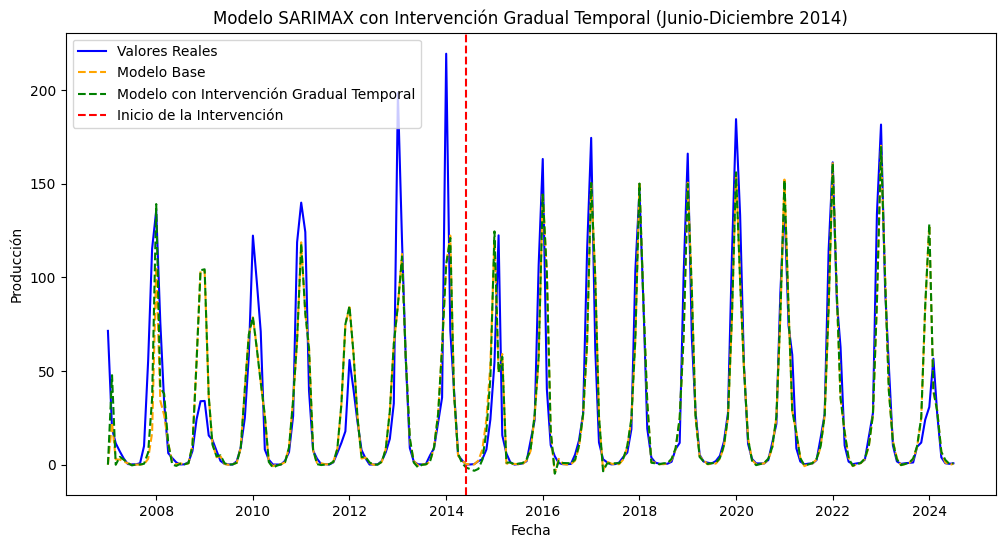

                                      SARIMAX Results                                       
Dep. Variable:                           Producción   No. Observations:                  211
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -893.963
Date:                              Fri, 06 Dec 2024   AIC                           1803.926
Time:                                      01:35:52   BIC                           1830.151
Sample:                                  01-01-2007   HQIC                          1814.543
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intervención_Gradual_Temp    -1.5719      2.517     -0.625      0.53

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

# Crear la columna de intervención (1 desde junio de 2014 en adelante)
df['Intervención'] = (df.index >= '2014-06-01').astype(int)

# Crear variable para intervención gradual temporal (junio 2014 a diciembre 2014)
df['Intervención_Gradual_Temp'] = 0
df.loc[(df.index >= '2014-06-01') & (df.index <= '2014-12-31'), 'Intervención_Gradual_Temp'] = range(1, len(df.loc[(df.index >= '2014-06-01') & (df.index <= '2014-12-31')]) + 1)

# Ajustar el modelo SARIMAX sin intervención (base)
modelo_base = SARIMAX(df['Producción'],
                      order=(2, 0, 2),
                      seasonal_order=(1, 0, 1, 12),
                      enforce_stationarity=False,
                      enforce_invertibility=False)
resultados_base = modelo_base.fit(disp=False)

# Ajustar el modelo con intervención gradual temporal
modelo_gradual_temp = SARIMAX(df['Producción'],
                              exog=df[['Intervención_Gradual_Temp']],
                              order=(2, 0, 2),
                              seasonal_order=(1, 0, 1, 12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
resultados_gradual_temp = modelo_gradual_temp.fit(disp=False)

# Predicciones
df['Predicción_Base'] = resultados_base.predict()
df['Predicción_Gradual_Temp'] = resultados_gradual_temp.predict(exog=df[['Intervención_Gradual_Temp']])

# Gráfica comparativa
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Producción'], label='Valores Reales', color='blue')
plt.plot(df.index, df['Predicción_Base'], label='Modelo Base', linestyle='--', color='orange')
plt.plot(df.index, df['Predicción_Gradual_Temp'], label='Modelo con Intervención Gradual Temporal', linestyle='--', color='green')
# Línea vertical para marcar el inicio de la intervención
plt.axvline(x=pd.Timestamp('2014-06-01'), color='red', linestyle='--', label='Inicio de la Intervención')
plt.title("Modelo SARIMAX con Intervención Gradual Temporal (Junio-Diciembre 2014)")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

# Resumen del modelo con intervención gradual temporal
print(resultados_gradual_temp.summary())

# Evaluar el impacto de la intervención
impacto_intervencion = resultados_gradual_temp.params['Intervención_Gradual_Temp']
p_valor_intervencion = resultados_gradual_temp.pvalues['Intervención_Gradual_Temp']

print("\nImpacto estimado de la intervención:")
print(f"Coeficiente de la intervención gradual temporal: {impacto_intervencion:.2f}")
print(f"P-valor de la intervención gradual temporal: {p_valor_intervencion:.4f}")

# Conclusión sobre el impacto
if p_valor_intervencion < 0.05:
    print("**Conclusión:** La intervención gradual temporal tiene un impacto estadísticamente significativo en la producción.")
else:
    print("**Conclusión:** La intervención gradual temporal NO tiene un impacto estadísticamente significativo en la producción.")

# Modelo SARIMA para la exportación de cafe

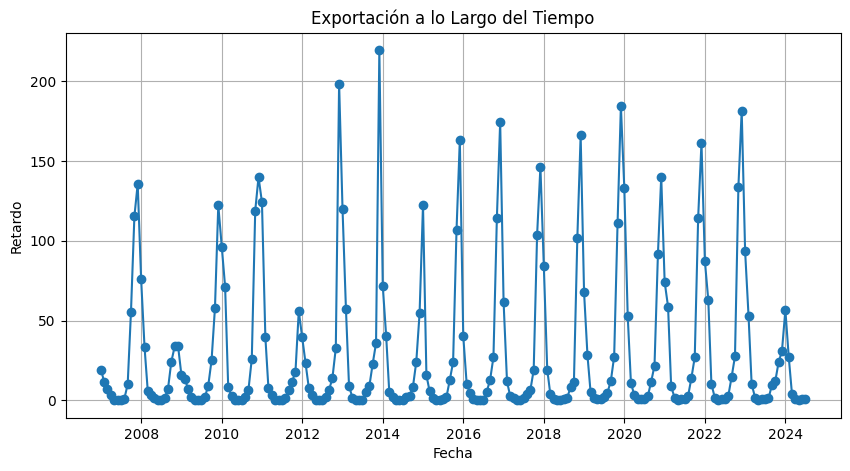

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo subido
ruta_archivo = '/content/mango.xlsx'  # Ajusta esta ruta si es necesario

# Leer el archivo de Excel
df = pd.read_excel(ruta_archivo)

# Convertir la columna de 'fecha' al tipo de dato datetime especificando el formato
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no parseadas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'fecha' como índice
df.set_index('Fecha', inplace=True)

# Graficar la serie de tiempo
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Retardo'], marker='o')
plt.title('Exportación a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Retardo')
plt.grid(True)
plt.show()

Análisis de Tendencias:

Tendencia Estacional: Se observa una tendencia cíclica con picos y valles recurrentes, lo que sugiere una variabilidad estacional en la producción de café. Esto implica que la producción de café sigue ciertos patrones periódicos cada año.

Patrones de Variabilidad: La presencia de picos altos y valles profundos recurrentes indica que ciertos meses o estaciones del año tienen una producción significativamente mayor o menor.

Conclusión:

El gráfico visualiza eficazmente la producción de café a lo largo del tiempo, permitiendo identificar patrones estacionales claros. Esto es útil para planificar la producción futura, ajustar estrategias de mercado y entender mejor los factores que influyen en la producción de café.

## 1. Identificación

Prueba ADF para la serie original:
Estadístico ADF: -3.4788062369405175
p-valor: 0.008548372577680175

Prueba ADF para la serie diferenciada en primer orden:
Estadístico ADF: -6.5836687738450745
p-valor: 7.406072352349374e-09

Prueba ADF para la serie diferenciada en segundo orden:
Estadístico ADF: -8.802157118125518
p-valor: 2.0980934936977503e-14


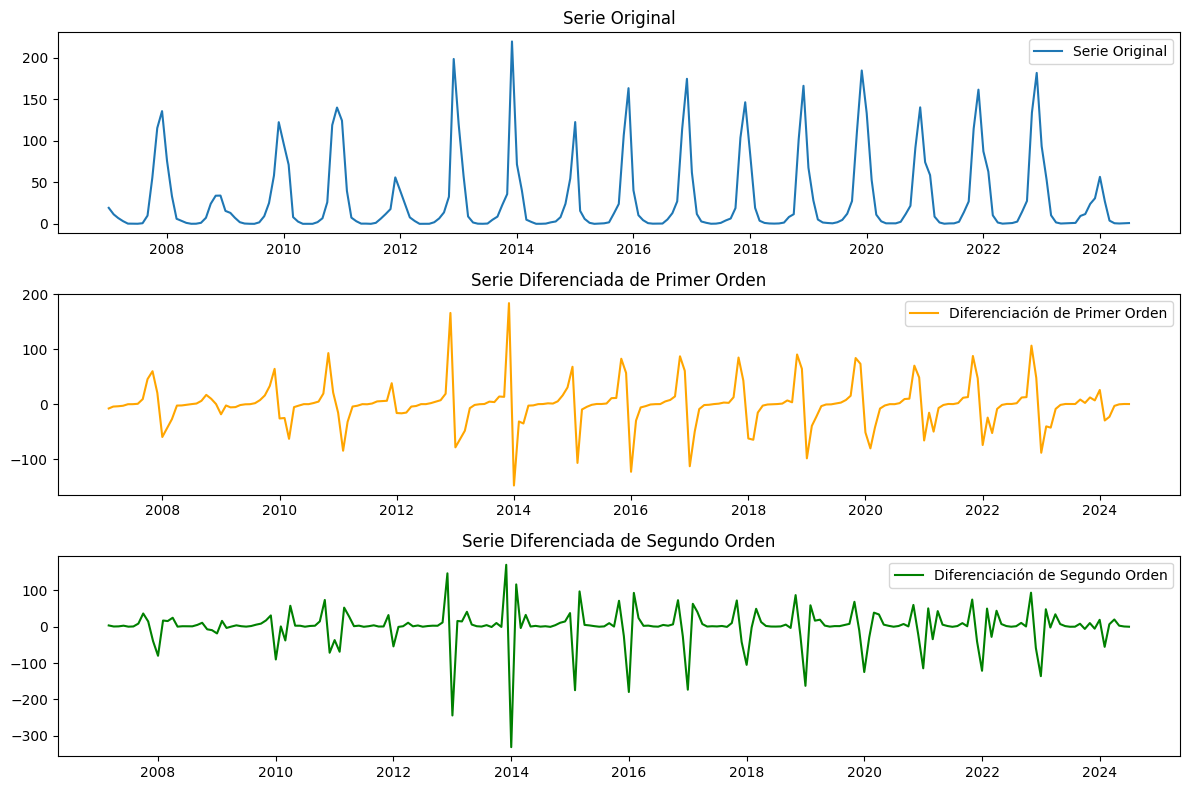

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Realizar la prueba de ADF en la serie original
result = adfuller(df['Retardo'])
print("Prueba ADF para la serie original:")
print(f"Estadístico ADF: {result[0]}")
print(f"p-valor: {result[1]}")

# Diferenciación de primer orden
df['Producción_1d'] = df['Retardo'].diff()
result_1d = adfuller(df['Producción_1d'].dropna())
print("\nPrueba ADF para la serie diferenciada en primer orden:")
print(f"Estadístico ADF: {result_1d[0]}")
print(f"p-valor: {result_1d[1]}")

# Diferenciación de segundo orden
df['Producción_2d'] = df['Producción_1d'].diff()
result_2d = adfuller(df['Producción_2d'].dropna())
print("\nPrueba ADF para la serie diferenciada en segundo orden:")
print(f"Estadístico ADF: {result_2d[0]}")
print(f"p-valor: {result_2d[1]}")

# Graficar las series original, diferenciada en primer orden y en segundo orden
plt.figure(figsize=(12, 8))

# Serie original
plt.subplot(3, 1, 1)
plt.plot(df['Retardo'], label='Serie Original')
plt.title('Serie Original')
plt.legend()

# Serie diferenciada en primer orden
plt.subplot(3, 1, 2)
plt.plot(df['Producción_1d'], color='orange', label='Diferenciación de Primer Orden')
plt.title('Serie Diferenciada de Primer Orden')
plt.legend()

# Serie diferenciada en segundo orden
plt.subplot(3, 1, 3)
plt.plot(df['Producción_2d'], color='green', label='Diferenciación de Segundo Orden')
plt.title('Serie Diferenciada de Segundo Orden')
plt.legend()

plt.tight_layout()
plt.show()

Serie Original: No estacionaria.

Serie Diferenciada en Primer Orden: Estacionaria.

Serie Diferenciada en Segundo Orden: También estacionaria (pero generalmente no es necesario diferenciar más de una vez si la serie ya es estacionaria después de la primera diferenciación).

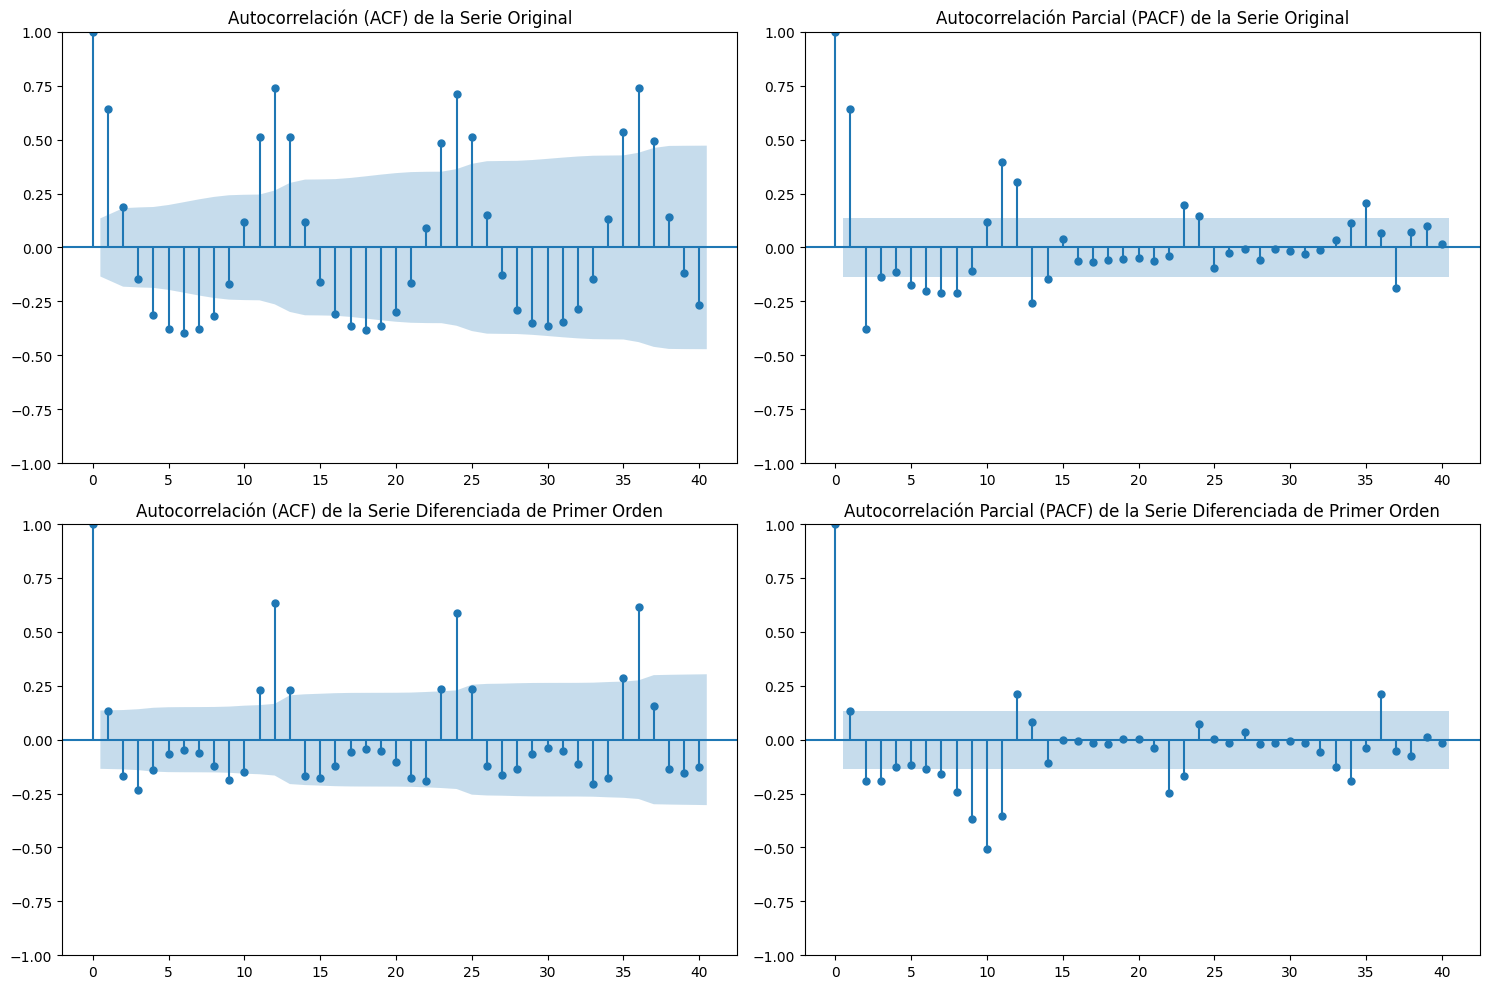

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Diferenciación de primer orden
df['Producción_1d'] = df['Retardo'].diff()

# Graficar la ACF y PACF de la serie original y la serie diferenciada
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# ACF de la serie original
plot_acf(df['Retardo'].dropna(), ax=axs[0, 0], lags=40)
axs[0, 0].set_title('Autocorrelación (ACF) de la Serie Original')

# PACF de la serie original
plot_pacf(df['Retardo'].dropna(), ax=axs[0, 1], lags=40)
axs[0, 1].set_title('Autocorrelación Parcial (PACF) de la Serie Original')

# ACF de la serie diferenciada
plot_acf(df['Producción_1d'].dropna(), ax=axs[1, 0], lags=40)
axs[1, 0].set_title('Autocorrelación (ACF) de la Serie Diferenciada de Primer Orden')

# PACF de la serie diferenciada
plot_pacf(df['Producción_1d'].dropna(), ax=axs[1, 1], lags=40)
axs[1, 1].set_title('Autocorrelación Parcial (PACF) de la Serie Diferenciada de Primer Orden')

plt.tight_layout()
plt.show()

De acuerdo al PACF diremos que el AR es de oreden 1, ya que repite un patron cada 12 peridos. Para el MA diremos que es orden 3 ya que luego se corta su significancia.

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# Diferenciación de primer orden
df['Retardo_1d'] = df['Retardo'].diff().dropna()

# Aplicar la prueba ADF a la serie diferenciada de primer orden
adf_result = adfuller(df['Retardo_1d'].dropna())
print("Prueba Dickey-Fuller Aumentada (ADF) para la serie diferenciada de primer orden:")
print(f"Estadístico ADF: {adf_result[0]}")
print(f"p-valor: {adf_result[1]}")
print(f"Valores críticos: {adf_result[4]}")

# Aplicar la prueba KPSS a la serie diferenciada de primer orden
kpss_result = kpss(df['Retardo_1d'].dropna(), regression='c', nlags="auto")
print("\nPrueba KPSS para la serie diferenciada de primer orden:")
print(f"Estadístico KPSS: {kpss_result[0]}")
print(f"p-valor: {kpss_result[1]}")
print(f"Valores críticos: {kpss_result[3]}")

Prueba Dickey-Fuller Aumentada (ADF) para la serie diferenciada de primer orden:
Estadístico ADF: -6.5836687738450745
p-valor: 7.406072352349374e-09
Valores críticos: {'1%': -3.463987334463603, '5%': -2.8763259091636213, '10%': -2.5746515171738515}

Prueba KPSS para la serie diferenciada de primer orden:
Estadístico KPSS: 0.03596303857274171
p-valor: 0.1
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


Ambas pruebas, ADF y KPSS, coinciden en que la serie diferenciada en primer orden es estacionaria:

La Prueba ADF muestra que podemos rechazar la hipótesis de raíz unitaria, indicando estacionariedad.

La Prueba KPSS apoya la hipótesis nula de estacionariedad.

Esto confirma que la serie diferenciada es adecuada para su uso en modelos que requieren estacionariedad, como ARIMA, lo que es fundamental para el análisis y modelado de series temporales.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1959.248, Time=2.45 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2211.550, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1981.488, Time=0.51 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2042.982, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2281.953, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=2012.871, Time=1.36 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=inf, Time=3.98 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=inf, Time=7.28 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=2054.999, Time=0.51 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=2007.149, Time=3.55 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=inf, Time=3.06 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=7.59 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, T

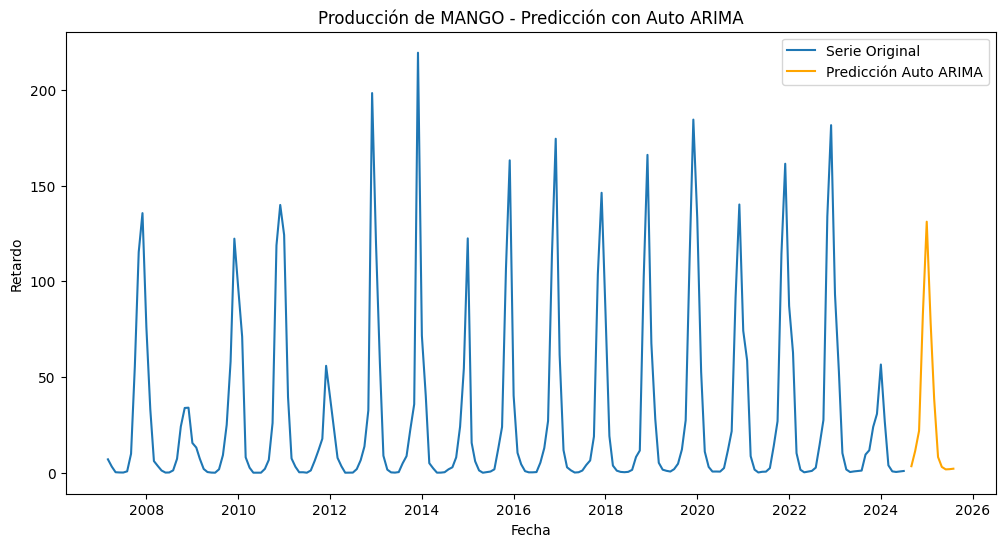

                Fecha  Predicción
2024-08-01 2024-08-31    3.463157
2024-09-01 2024-09-30   11.403379
2024-10-01 2024-10-31   21.941849
2024-11-01 2024-11-30   82.361550
2024-12-01 2024-12-31  131.151192
2025-01-01 2025-01-31   78.476439
2025-02-01 2025-02-28   38.728621
2025-03-01 2025-03-31    8.247990
2025-04-01 2025-04-30    3.085793
2025-05-01 2025-05-31    1.795235
2025-06-01 2025-06-30    1.900750
2025-07-01 2025-07-31    2.151837


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Supongamos que df es tu DataFrame y 'Producción' es la columna de interés.
# Asegúrate de que el índice del DataFrame sea de tipo datetime.
df.index = pd.to_datetime(df.index)

# Aplicar Auto ARIMA
auto_model = auto_arima(df['Retardo'],
                        seasonal=True,
                        m=12,  # Período estacional de 12 para datos mensuales
                        trace=True,  # Mostrar el progreso de la búsqueda
                        error_action='ignore',  # Ignorar errores durante el ajuste
                        suppress_warnings=True,  # Suprimir advertencias
                        stepwise=True)  # Optimización rápida de parámetros

# Imprimir resumen del modelo encontrado
print(auto_model.summary())

# Realizar predicciones para los siguientes 12 meses (un año) como ejemplo
forecast = auto_model.predict(n_periods=12)

# Generar un índice de fechas adecuado para las predicciones
# Dado que el último dato es agosto 2024, queremos que las predicciones empiecen en septiembre 2024
future_dates = pd.date_range(start='2024-08-01', periods=12, freq='M')

# Crear un DataFrame con las predicciones
pred_df = pd.DataFrame({'Fecha': future_dates, 'Predicción': forecast})

# Graficar la serie original y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df['Retardo'], label='Serie Original')
plt.plot(future_dates, forecast, label='Predicción Auto ARIMA', color='orange')
plt.title("Producción de MANGO - Predicción con Auto ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Retardo")
plt.legend()
plt.show()

# Mostrar datos de predicción
print(pred_df)

## 2. Estimación

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Convert the 'Retardo' column to numeric, handling potential errors
df['Retardo'] = pd.to_numeric(df['Retardo'], errors='coerce')

# Drop rows with missing values after conversion
df = df.dropna()

# Fit the SARIMAX model
model = SARIMAX(df['Retardo'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 12))
results = model.fit()

# Print the model summary
print(results.summary())

# ... (rest of your code)

                                      SARIMAX Results                                       
Dep. Variable:                              Retardo   No. Observations:                  209
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -959.184
Date:                              Fri, 06 Dec 2024   AIC                           1926.368
Time:                                      01:39:58   BIC                           1939.738
Sample:                                  03-01-2007   HQIC                          1931.774
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4496      0.039     11.672      0.000       0.374       0.525
ar.S.L12       0.99

Significancia de Parámetros: Los parámetros AR y MA estacionales son muy significativos, lo que sugiere que estos componentes son importantes para capturar la dinámica de la serie temporal.

Diagnóstico de Residuos: Aunque los residuos no son normalmente distribuidos y presentan cierta asimetría y curtosis elevada, la ausencia de autocorrelación significativa es positivo para el modelo.

Ajuste del Modelo: Los valores de AIC, BIC y HQIC indican un ajuste razonable, lo que sugiere que el modelo puede capturar bien las características esenciales de los datos.

## 3. Chequeo

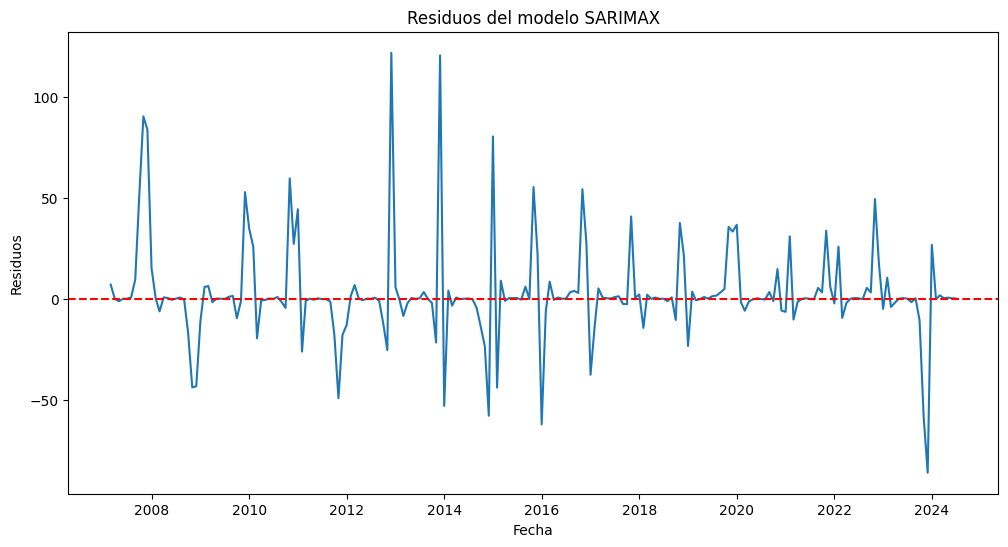

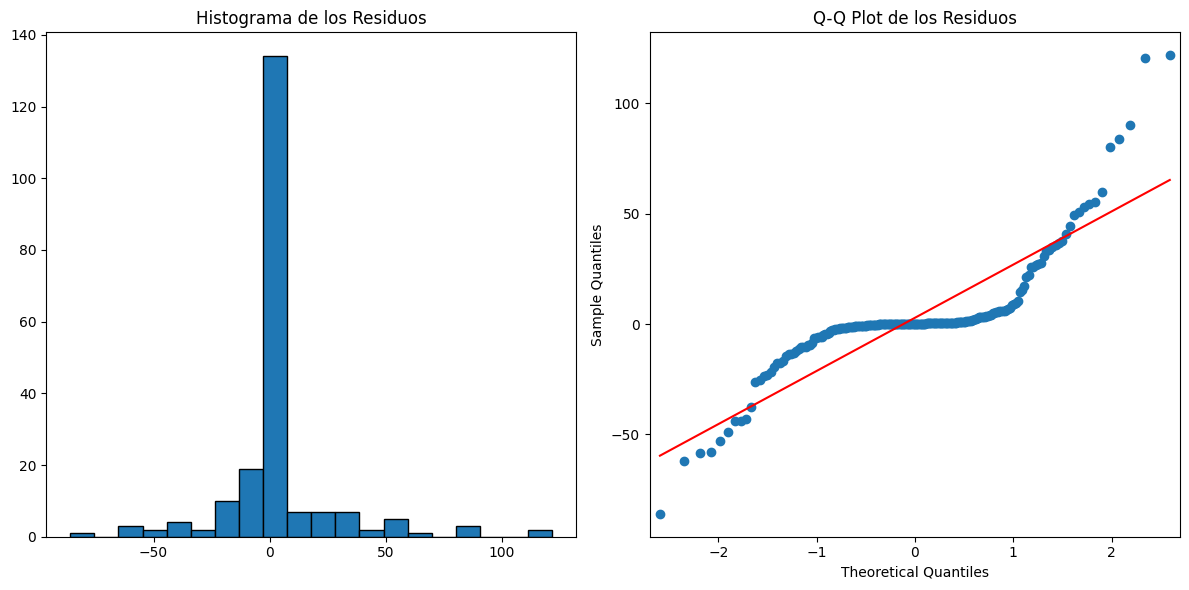

Prueba de Ljung-Box para residuos:
       lb_stat  lb_pvalue
10   2.914132   0.983373
15  11.374864   0.725597
20  11.432174   0.934236


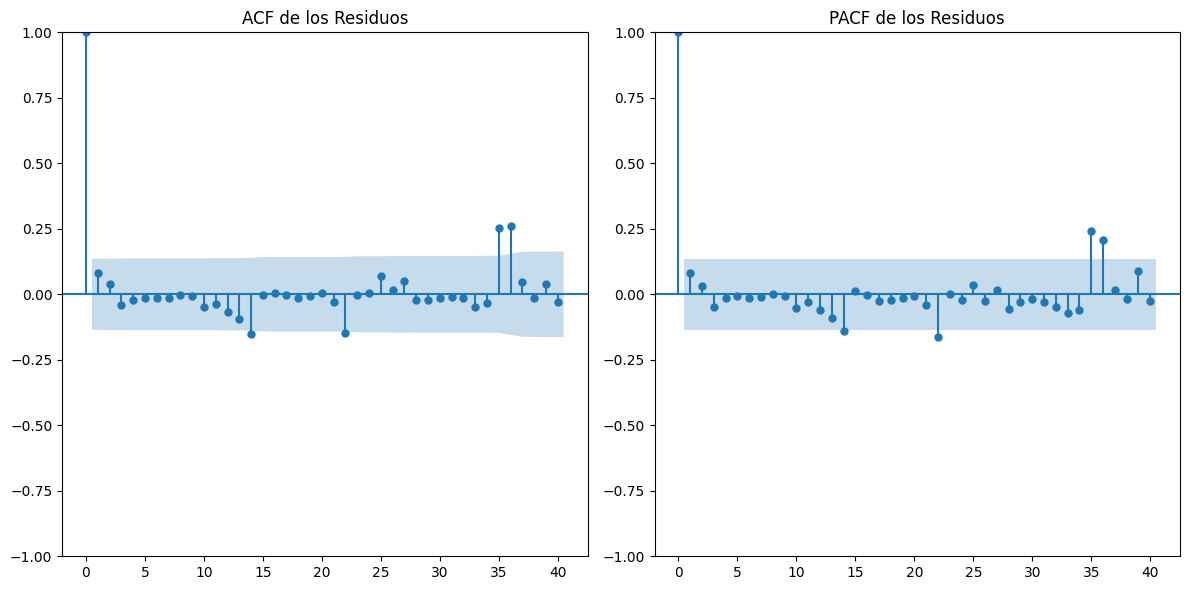

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Extraer los residuos del modelo
residuals = results.resid

# Gráfico de los residuos
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuos del modelo SARIMAX')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Histograma y Q-Q plot para verificar la normalidad
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histograma de los Residuos')

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot de los Residuos')

plt.tight_layout()
plt.show()

# Prueba de Ljung-Box para verificar la autocorrelación de los residuos
ljung_box_result = acorr_ljungbox(residuals, lags=[10, 15, 20], return_df=True)
print("Prueba de Ljung-Box para residuos:\n", ljung_box_result)

# Gráficos de ACF y PACF de los residuos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('ACF de los Residuos')

plt.subplot(1, 2, 2)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.title('PACF de los Residuos')

plt.tight_layout()
plt.show()

Interpretación:

Histograma: La concentración de residuos cerca de cero es buena, pero la presencia de valores atípicos puede sugerir inexactitudes en el modelo.

Q-Q Plot: La desviación de los puntos de la línea de referencia indica que los residuos no son perfectamente normales, lo que puede afectar algunas suposiciones del modelo.

Prueba de Ljung-Box: Los valores p altos (todos mayores que 0.05) indican que no hay autocorrelación significativa en los residuos, lo que sugiere que el modelo ha capturado adecuadamente la estructura de la serie temporal.

Conclusión
Normalidad de Residuos: Aunque los residuos no siguen una distribución normal perfecta, la ausencia de autocorrelación significativa es positiva para el modelo.

Valores Atípicos: La presencia de residuos que se desvían de cero y la desviación en el Q-Q plot indican que podrían existir valores atípicos o inexactitudes que el modelo no ha capturado.

Modelo Aceptable: Los resultados sugieren que el modelo SARIMAX utilizado es razonablemente bueno para predecir la serie temporal, aunque podría beneficiarse de ajustes adicionales para manejar mejor los valores atípicos y mejorar la normalidad de los residuos.

## 4. Corroboración

Resultados del Modelo SARIMAX
                                      SARIMAX Results                                       
Dep. Variable:                              Retardo   No. Observations:                  199
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -835.450
Date:                              Fri, 06 Dec 2024   AIC                           1678.901
Time:                                      01:44:53   BIC                           1691.804
Sample:                                           0   HQIC                          1684.130
                                              - 199                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3124      0.042      7.478      0.000       0.231  

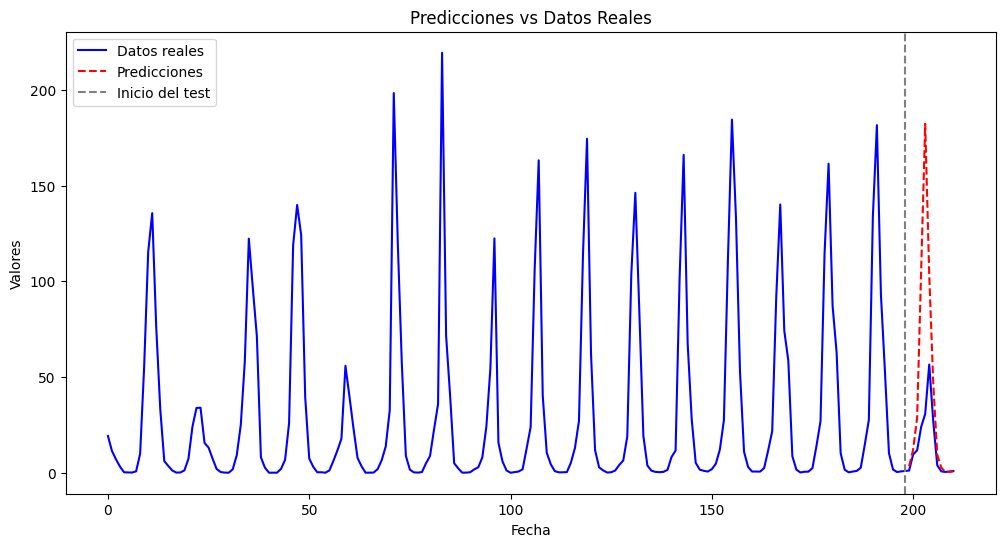

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Ruta del archivo de Excel
ruta_archivo = '/content/mango.xlsx'  # Ajusta esta ruta si es necesario

# Leer el archivo de Excel
df = pd.read_excel(ruta_archivo)

# Convertir la columna de 'fecha' al tipo de dato datetime especificando el formato
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no parseadas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'fecha' como índice
df.set_index('Fecha', inplace=True)
data1 = df['Retardo']  # Reemplaza 'Valor' con la columna que contiene los datos de tu serie temporal

# **Ensure 'Retardo' column is numeric**
data1 = pd.to_numeric(data1, errors='coerce') # Convert to numeric, replace non-numeric with NaN
data1 = data1.dropna() # Drop rows with NaN

# Reset index to default integer index before splitting
data1 = data1.reset_index(drop=True)

# Separar los últimos 12 datos
train = data1[:-12]
test = data1[-12:]

# Ajustar el modelo SARIMAX  en los datos de entrenamiento
model = SARIMAX(train,
                order=(1, 0, 0),
                seasonal_order=(1, 0, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Predecir los últimos 12 valores
forecast = results.forecast(steps=12)

# Comparar predicciones con los datos reales
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print("Resultados del Modelo SARIMAX")
print(results.summary())
print("\nMétricas de Evaluación:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Visualizar predicciones frente a los datos reales
plt.figure(figsize=(12, 6))
plt.plot(data1, label='Datos reales', color='blue')
plt.plot(test.index, forecast, label='Predicciones', color='red', linestyle='--')
plt.axvline(x=train.index[-1], color='gray', linestyle='--', label='Inicio del test')
plt.legend()
plt.title("Predicciones vs Datos Reales")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.show()

Significancia de Parámetros: Los parámetros AR y MA estacionales son muy significativos, lo que sugiere que estos componentes son importantes para capturar la dinámica de la serie temporal.

Diagnóstico de Residuos: Aunque los residuos no son normalmente distribuidos y presentan cierta asimetría y curtosis elevada, la ausencia de autocorrelación significativa es positivo para el modelo.

Ajuste del Modelo: Los valores de AIC, BIC y HQIC indican un ajuste razonable, lo que sugiere que el modelo puede capturar bien las características esenciales de los datos.

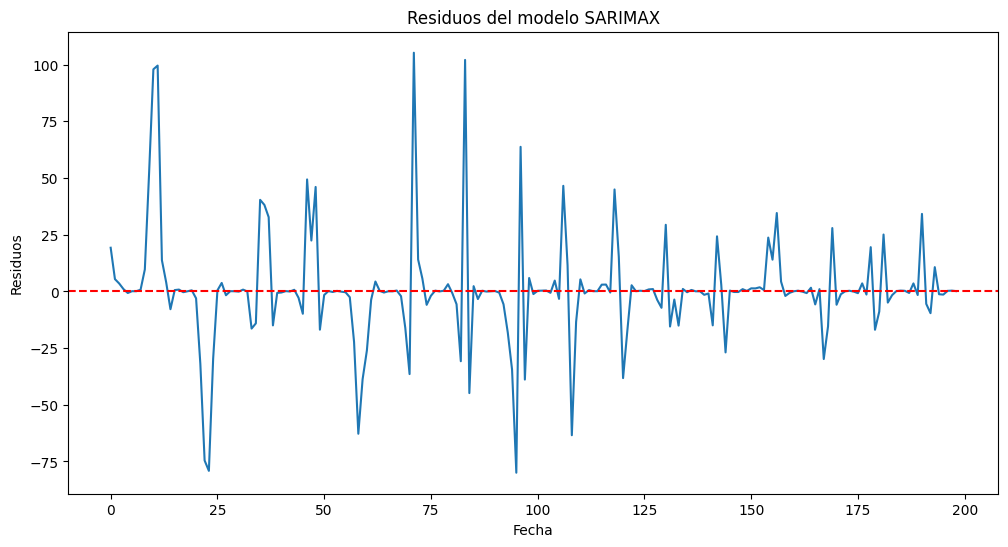

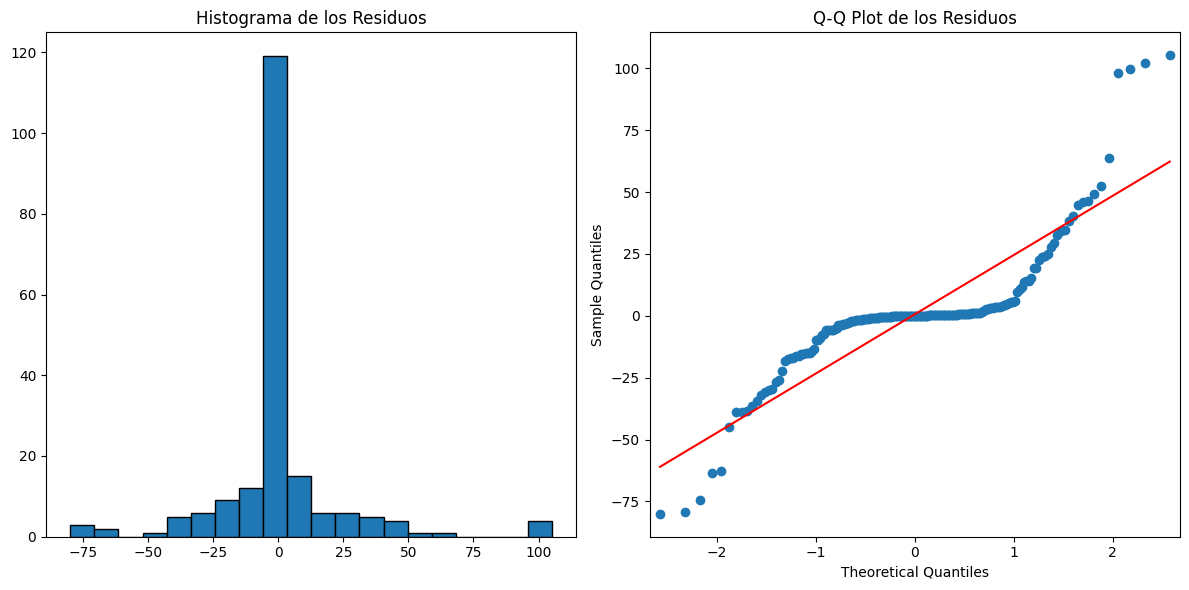

Prueba de Ljung-Box para residuos:
       lb_stat  lb_pvalue
10  10.388210   0.407119
15  39.843508   0.000479
20  39.880002   0.005173


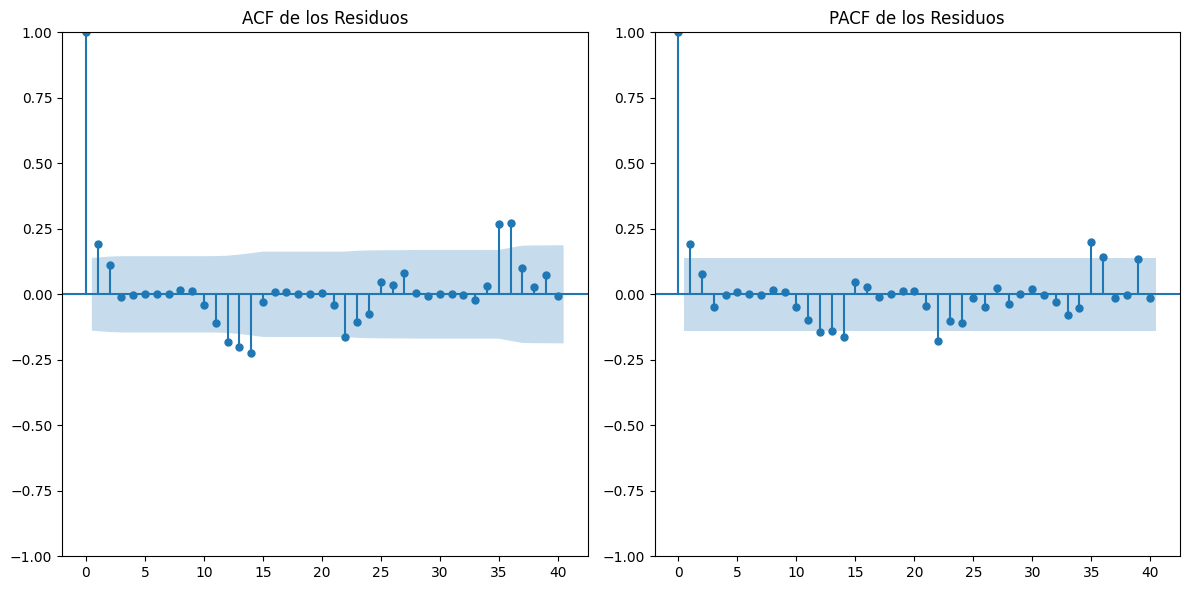

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Extraer los residuos del modelo
residuals = results.resid

# Gráfico de los residuos
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuos del modelo SARIMAX')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Histograma y Q-Q plot para verificar la normalidad
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histograma de los Residuos')

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot de los Residuos')

plt.tight_layout()
plt.show()

# Prueba de Ljung-Box para verificar la autocorrelación de los residuos
ljung_box_result = acorr_ljungbox(residuals, lags=[10, 15, 20], return_df=True)
print("Prueba de Ljung-Box para residuos:\n", ljung_box_result)

# Gráficos de ACF y PACF de los residuos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('ACF de los Residuos')

plt.subplot(1, 2, 2)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.title('PACF de los Residuos')

plt.tight_layout()
plt.show()

Histograma de los Residuos:

La mayoría de los residuos están centrados alrededor de cero, lo que sugiere que el modelo generalmente predice bien, aunque hay algunos valores atípicos.

Q-Q Plot de los Residuos:

Compara los cuantiles de los residuos con los cuantiles teóricos de una distribución normal. La desviación de los puntos azules de la línea roja indica salidas de la normalidad.

Resultados de la Prueba de Ljung-Box para Residuos:

Para diferentes rezagos, los valores p son todos mayores a 0.05 para el rezago 10, indicando que no hay autocorrelación significativa en los residuos.

Conclusión:

Normalidad de Residuos: Aunque los residuos no siguen una distribución normal perfecta, la ausencia de autocorrelación significativa es positiva para el modelo.

Valores Atípicos: La presencia de residuos que se desvían de cero y la desviación en el Q-Q plot indican que podrían existir valores atípicos o inexactitudes que el modelo no ha capturado.

Modelo Aceptable: Los resultados sugieren que el modelo SARIMAX utilizado es razonablemente bueno para predecir la serie temporal, aunque podría beneficiarse de ajustes adicionales para manejar mejor los valores atípicos y mejorar la normalidad de los residuos.

#  Correlación

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Ruta del archivo de Excel
ruta_archivo = '/content/mango.xlsx'  # Ajusta esta ruta si es necesario

# Leer el archivo de Excel
df = pd.read_excel(ruta_archivo)

# Convertir la columna de 'fecha' al tipo de dato datetime especificando el formato
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no parseadas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'fecha' como índice
df.set_index('Fecha', inplace=True)

# **Keep both 'Producción' and 'Retardo' columns in a new DataFrame**
data = df[['Producción', 'Retardo']] # Select both columns

# **Ensure both columns are numeric**
data['Producción'] = pd.to_numeric(data['Producción'], errors='coerce')
data['Retardo'] = pd.to_numeric(data['Retardo'], errors='coerce')
data = data.dropna() # Drop rows with NaN

# Reset index to default integer index before splitting
data = data.reset_index(drop=True)

# Separar los últimos 12 datos
train = data[:-12]
test = data[-12:]

# Now, train contains both 'Producción' and 'Retardo'
correlation = train['Producción'].corr(train['Retardo'])
print(f"Coeficiente de correlación entre 'Producción' y 'Retardo': {correlation}")

# ... (Rest of your code for SARIMAX model) ...

Coeficiente de correlación entre 'Producción' y 'Retardo': 0.6360509239436629


# Causalidad de Granger

In [ ]:
# Concatenamos las dos series temporalmente (asegurando que ambas tengan el mismo índice)
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests  # Importar la función

df_granger = pd.concat([df['Retardo'], df['Producción']], axis=1)

# Renombrar las columnas para claridad
df_granger.columns = ['Retardo', 'Producción']

# Realizar la prueba de causalidad de Granger
max_lag = 2  # Puedes ajustar el número de lags según sea necesario

granger_result = grangercausalitytests(df_granger, maxlag=max_lag, verbose=True) # Changed max_lag to maxlag


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=34.8297 , p=0.0000  , df_denom=207, df_num=1
ssr based chi2 test:   chi2=35.3345 , p=0.0000  , df=1
likelihood ratio test: chi2=32.6582 , p=0.0000  , df=1
parameter F test:         F=34.8297 , p=0.0000  , df_denom=207, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9496  , p=0.1450  , df_denom=205, df_num=2
ssr based chi2 test:   chi2=3.9754  , p=0.1370  , df=2
likelihood ratio test: chi2=3.9380  , p=0.1396  , df=2
parameter F test:         F=19.4832 , p=0.0000  , df_denom=205, df_num=2


El análisis de causalidad de Granger muestra que para un rezago de 1 periodo, existe una fuerte evidencia de que la variable rezagada puede predecir la variable dependiente. En el caso de un rezago de 2 periodos, la evidencia no es concluyente en general, aunque algunas pruebas específicas sugieren posibles relaciones significativas.

# Modelo de Transferencia

## Preblanqueo de Producción

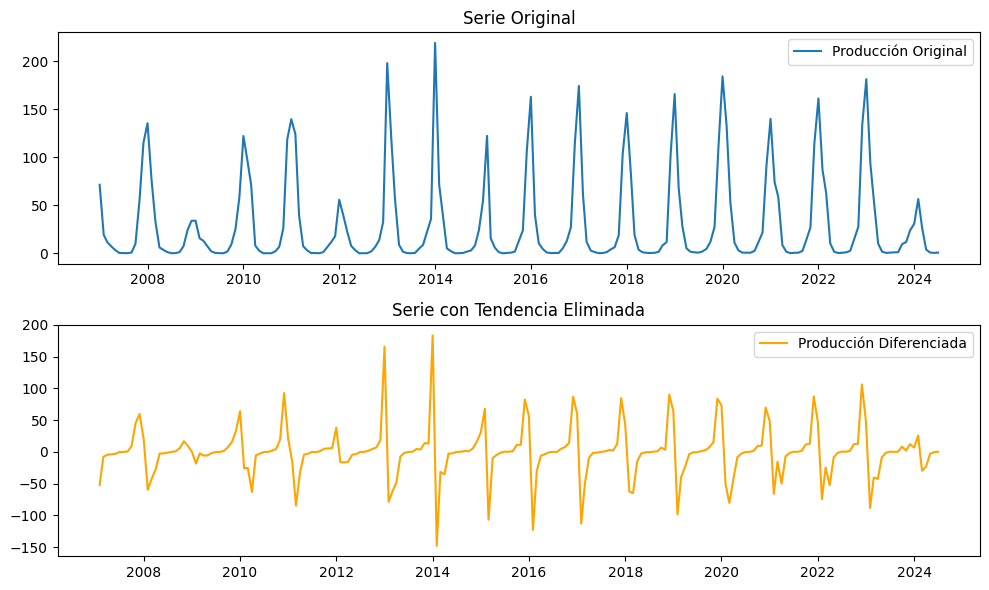

In [ ]:
# Diferenciación de primer orden para eliminar la tendencia
df['Producción_dif'] = df['Producción'].diff().dropna()

# Graficar la serie original y la serie diferenciada
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(df['Producción'], label='Producción Original')
plt.title('Serie Original')
plt.legend()

plt.subplot(212)
plt.plot(df['Producción_dif'], label='Producción Diferenciada', color='orange')
plt.title('Serie con Tendencia Eliminada')
plt.legend()

plt.tight_layout()
plt.show()

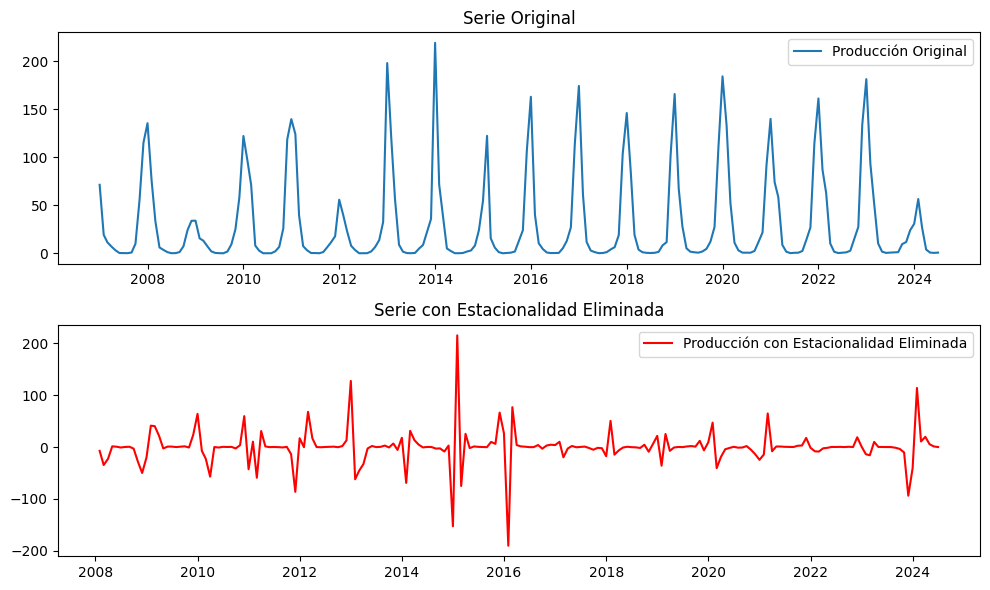

In [ ]:
# Diferenciación estacional para eliminar la estacionalidad (por ejemplo, periodo 12)
df['Producción_dif_seasonal'] = df['Producción_dif'].diff(12).dropna()

# Graficar la serie original y la serie con estacionalidad eliminada
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(df['Producción'], label='Producción Original')
plt.title('Serie Original')
plt.legend()

plt.subplot(212)
plt.plot(df['Producción_dif_seasonal'], label='Producción con Estacionalidad Eliminada', color='red')
plt.title('Serie con Estacionalidad Eliminada')
plt.legend()

plt.tight_layout()
plt.show()

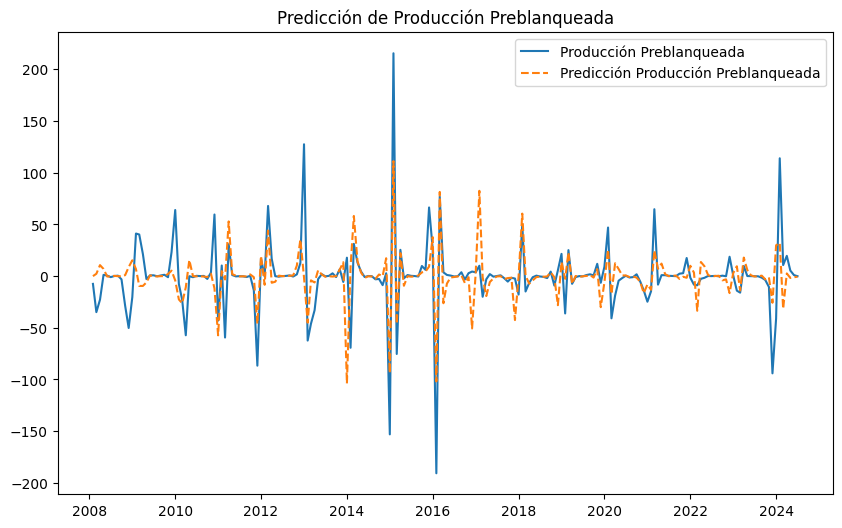

                                      SARIMAX Results                                       
Dep. Variable:              Producción_dif_seasonal   No. Observations:                  198
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -871.958
Date:                              Fri, 06 Dec 2024   AIC                           1751.916
Time:                                      01:59:20   BIC                           1764.798
Sample:                                  02-01-2008   HQIC                          1757.137
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3058      0.047     -6.509      0.000      -0.398      -0.214
ar.S.L12      -0.08

In [ ]:
# Usar la serie diferenciada para ajustar el modelo SARIMAX
train_dif1 = df['Producción_dif_seasonal'].dropna()  # Asegúrate de quitar los NaN después de la diferenciación

# Ajustar el modelo SARIMAX con la serie preblanqueada
model_dif = SARIMAX(train_dif1,
                    order=(1, 0, 0),  # Asegúrate de ajustar el orden de ARIMA
                    seasonal_order=(1, 0, 1, 12),
                    enforce_stationarity=False,
                    enforce_invertibility=False)

results_dif = model_dif.fit(disp=False)

# Realizar las predicciones para la serie diferenciada
predictions_dif = results_dif.predict(start=train_dif1.index[0], end=train_dif1.index[-1])

# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(train_dif1.index, train_dif1, label='Producción Preblanqueada')
plt.plot(predictions_dif.index, predictions_dif, label='Predicción Producción Preblanqueada', linestyle='--')
plt.title('Predicción de Producción Preblanqueada')
plt.legend()
plt.show()

# Ver los resultados del modelo
print(results_dif.summary())

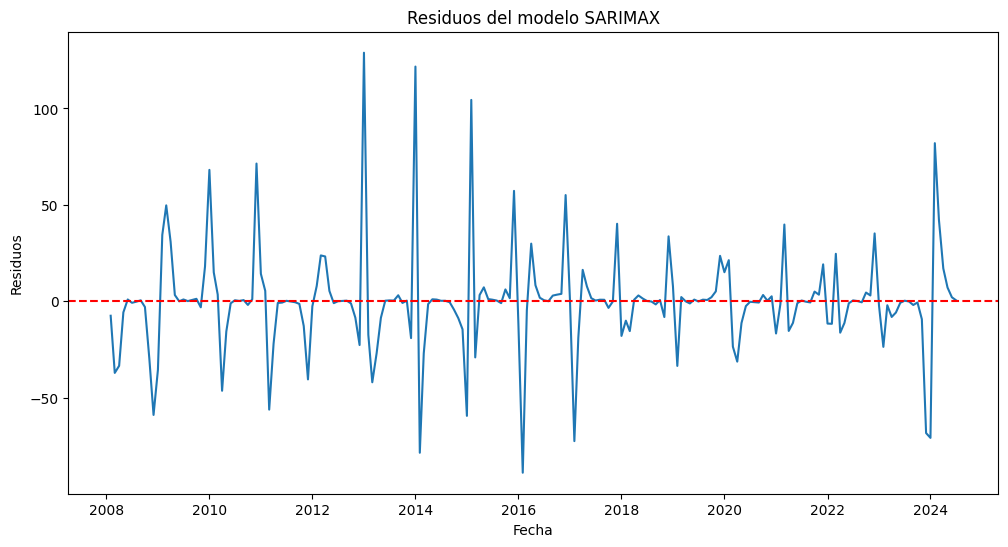

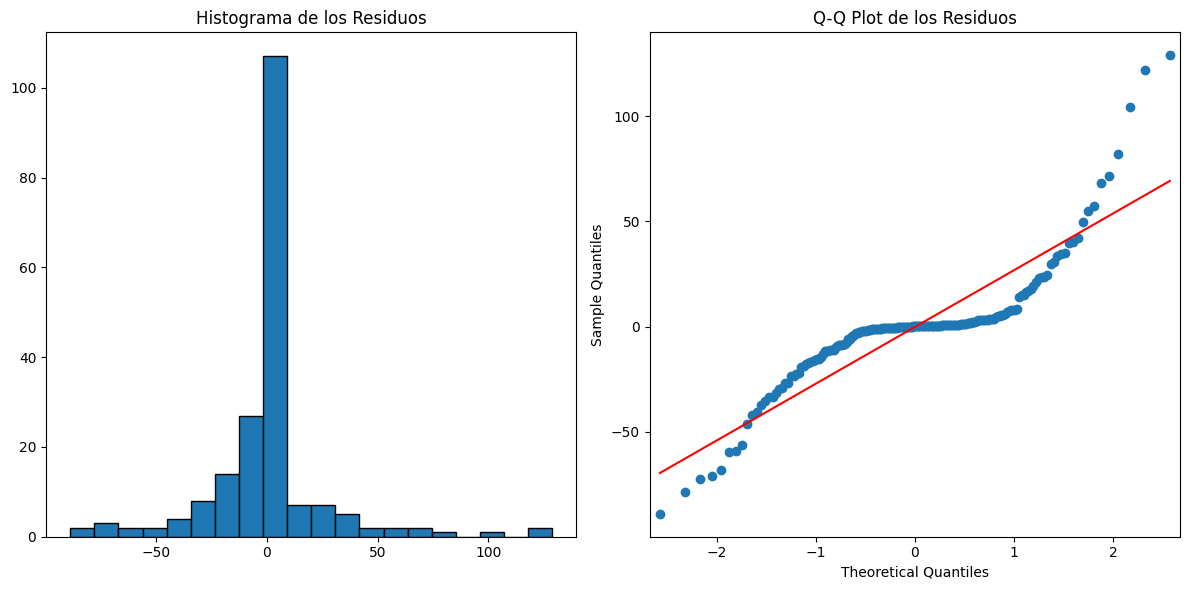

Prueba de Ljung-Box para residuos:
       lb_stat  lb_pvalue
10  15.987881   0.099980
15  20.441382   0.155646
20  21.863523   0.347962


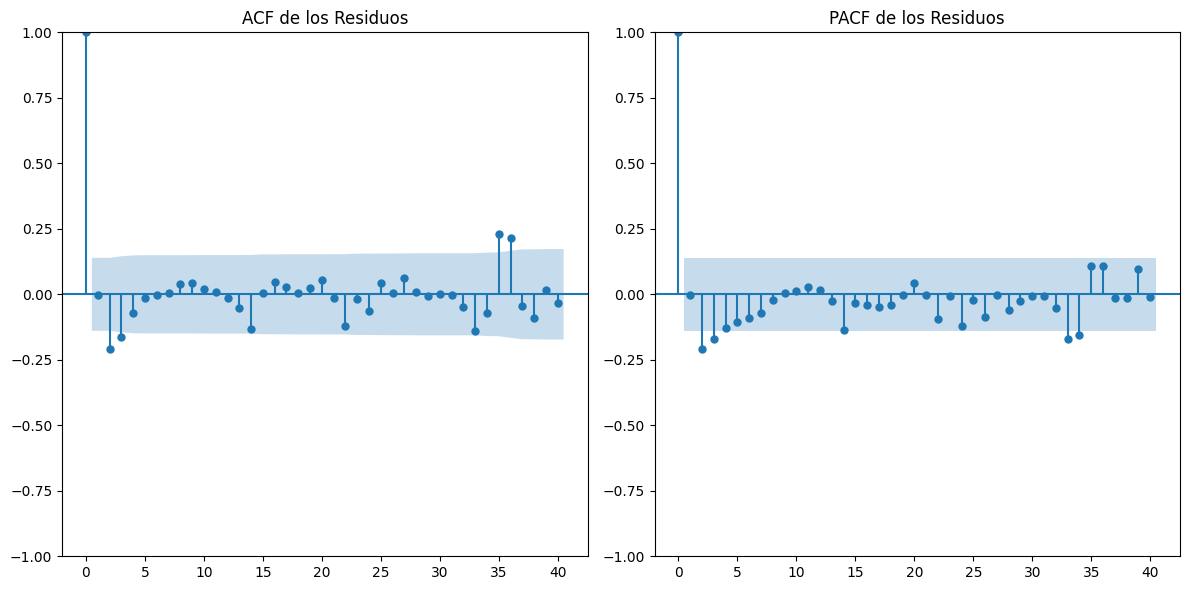

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Extraer los residuos del modelo
residuals1 = results_dif.resid

# Gráfico de los residuos
plt.figure(figsize=(12, 6))
plt.plot(residuals1)
plt.title('Residuos del modelo SARIMAX')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Histograma y Q-Q plot para verificar la normalidad
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals1, bins=20, edgecolor='k')
plt.title('Histograma de los Residuos')

plt.subplot(1, 2, 2)
sm.qqplot(residuals1, line='s', ax=plt.gca())
plt.title('Q-Q Plot de los Residuos')

plt.tight_layout()
plt.show()

# Prueba de Ljung-Box para verificar la autocorrelación de los residuos
ljung_box_result = acorr_ljungbox(residuals1, lags=[10, 15, 20], return_df=True)
print("Prueba de Ljung-Box para residuos:\n", ljung_box_result)

# Gráficos de ACF y PACF de los residuos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(residuals1, ax=plt.gca(), lags=40)
plt.title('ACF de los Residuos')

plt.subplot(1, 2, 2)
plot_pacf(residuals1, ax=plt.gca(), lags=40)
plt.title('PACF de los Residuos')

plt.tight_layout()
plt.show()

Normalidad de Residuos: Aunque los residuos están centrados alrededor de cero, la desviación de los puntos en el Q-Q plot sugiere que los residuos no siguen una distribución normal perfecta. Esto puede afectar algunas suposiciones del modelo.

Autocorrelación de Residuos: Los resultados de la prueba de Ljung-Box muestran valores p mayores que 0.05 para todos los lags considerados. Esto indica que no hay evidencia de autocorrelación significativa en los residuos, lo que sugiere que el modelo ha capturado adecuadamente la estructura de la serie temporal.

Valores Atípicos: La presencia de valores atípicos en el histograma sugiere que podría haber algunas inexactitudes en el modelo o eventos extraordinarios que el modelo no ha capturado adecuadamente.

Conclusión
Los resultados sugieren que el modelo es razonablemente bueno para predecir la serie temporal, aunque podría beneficiarse de ajustes adicionales para manejar mejor los valores atípicos y mejorar la normalidad de los residuos. La ausencia de autocorrelación significativa es un buen indicio de que el modelo captura bien la estructura de la serie temporal.

## Preblanqueo de Retardo

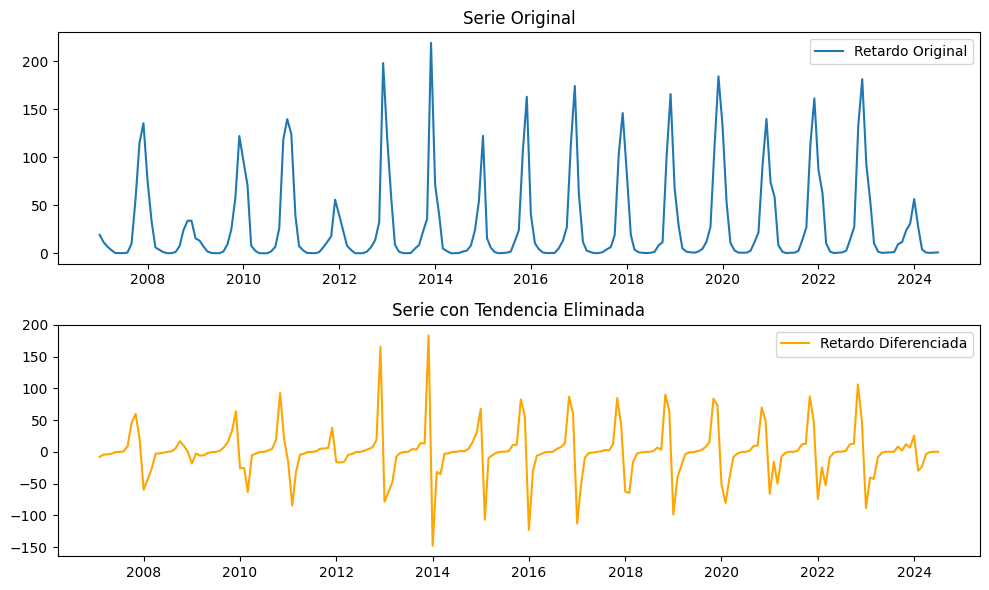

In [ ]:
# Diferenciación de primer orden para eliminar la tendencia
df['Retardo_dif'] = df['Retardo'].diff().dropna()

# Graficar la serie original y la serie diferenciada
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(df['Retardo'], label='Retardo Original')
plt.title('Serie Original')
plt.legend()

plt.subplot(212)
plt.plot(df['Retardo_dif'], label='Retardo Diferenciada', color='orange')
plt.title('Serie con Tendencia Eliminada')
plt.legend()

plt.tight_layout()
plt.show()

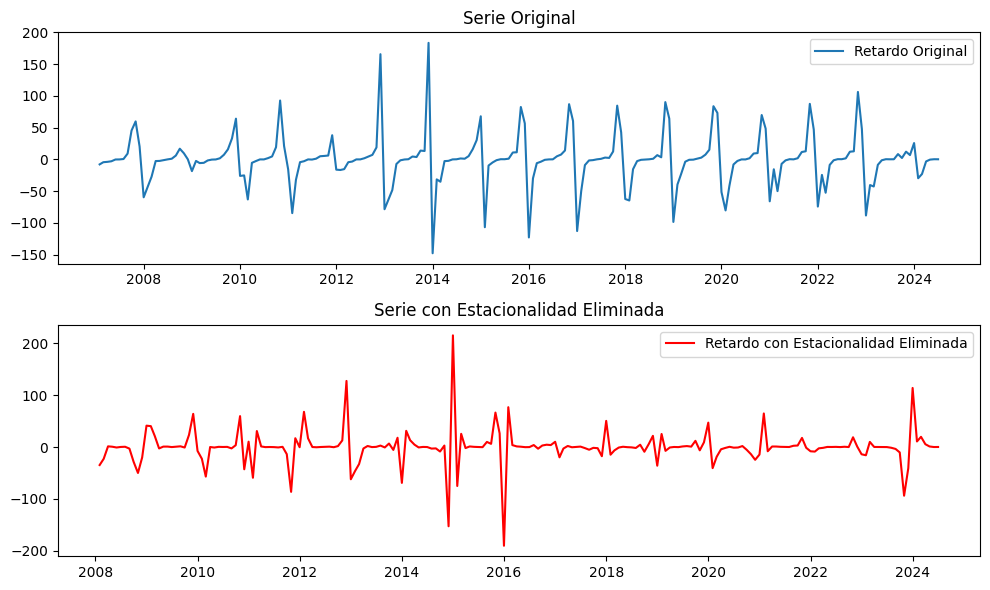

In [ ]:
# Diferenciación estacional para eliminar la estacionalidad (por ejemplo, periodo 12)
df['Retardo_dif_seasonal'] = df['Retardo_dif'].diff(12).dropna()

# Graficar la serie original y la serie con estacionalidad eliminada
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(df['Retardo_dif'], label='Retardo Original')
plt.title('Serie Original')
plt.legend()

plt.subplot(212)
plt.plot(df['Retardo_dif_seasonal'], label='Retardo con Estacionalidad Eliminada', color='red')
plt.title('Serie con Estacionalidad Eliminada')
plt.legend()

plt.tight_layout()
plt.show()

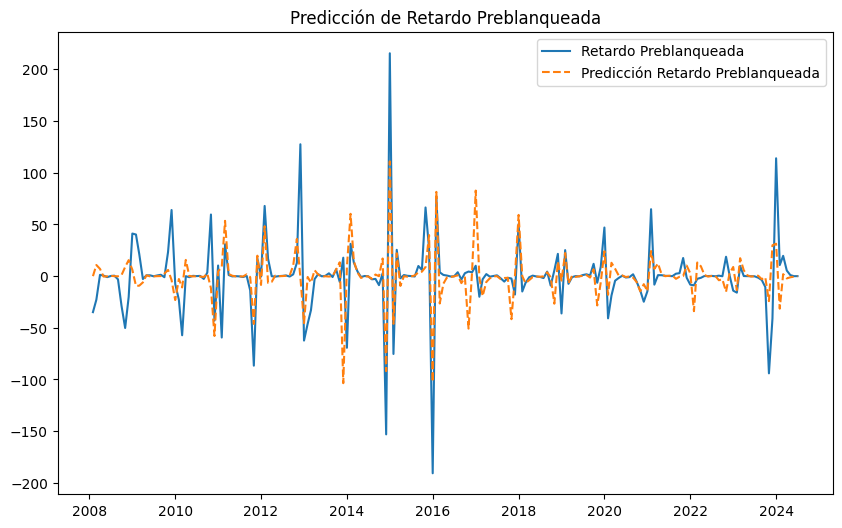

                                      SARIMAX Results                                       
Dep. Variable:                 Retardo_dif_seasonal   No. Observations:                  198
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -871.895
Date:                              Fri, 06 Dec 2024   AIC                           1751.789
Time:                                      01:59:36   BIC                           1764.671
Sample:                                  02-01-2008   HQIC                          1757.010
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3089      0.046     -6.648      0.000      -0.400      -0.218
ar.S.L12      -0.09

In [ ]:
# Usar la serie diferenciada para ajustar el modelo SARIMAX
train_dif = df['Retardo_dif_seasonal'].dropna()  # Asegúrate de quitar los NaN después de la diferenciación

train_dif = pd.to_numeric(train_dif, errors='coerce')

train_dif = train_dif.dropna()

# Ajustar el modelo SARIMAX con la serie preblanqueada
model_dif = SARIMAX(train_dif,
                    order=(1, 0, 0),  # Asegúrate de ajustar el orden de ARIMA
                    seasonal_order=(1, 0, 1, 12),
                    enforce_stationarity=False,
                    enforce_invertibility=False)

results_dif = model_dif.fit(disp=False)

# Realizar las predicciones para la serie diferenciada
predictions_dif = results_dif.predict(start=train_dif.index[0], end=train_dif.index[-1])

# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(train_dif.index, train_dif, label='Retardo Preblanqueada')
plt.plot(predictions_dif.index, predictions_dif, label='Predicción Retardo Preblanqueada', linestyle='--')
plt.title('Predicción de Retardo Preblanqueada')
plt.legend()
plt.show()

# Ver los resultados del modelo
print(results_dif.summary())

Significancia de Parámetros: Los parámetros AR y MA estacionales son muy significativos, sugiriendo que estos componentes capturan importantes dinámicas de la serie temporal.

Diagnóstico de Residuos: Aunque los residuos no son normalmente distribuidos y presentan asimetría y curtosis elevada, la ausencia de autocorrelación significativa es un buen indicio de que el modelo captura bien la estructura de la serie temporal.

Ajuste del Modelo: Los valores de AIC, BIC y HQIC indican un ajuste razonable, lo cual sugiere que el modelo puede describir adecuadamente las características esenciales de los datos.

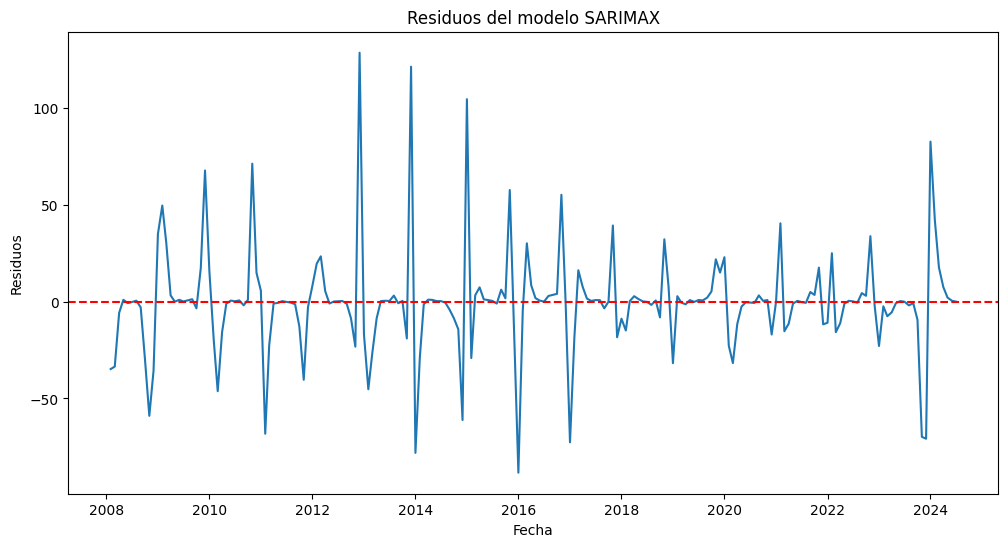

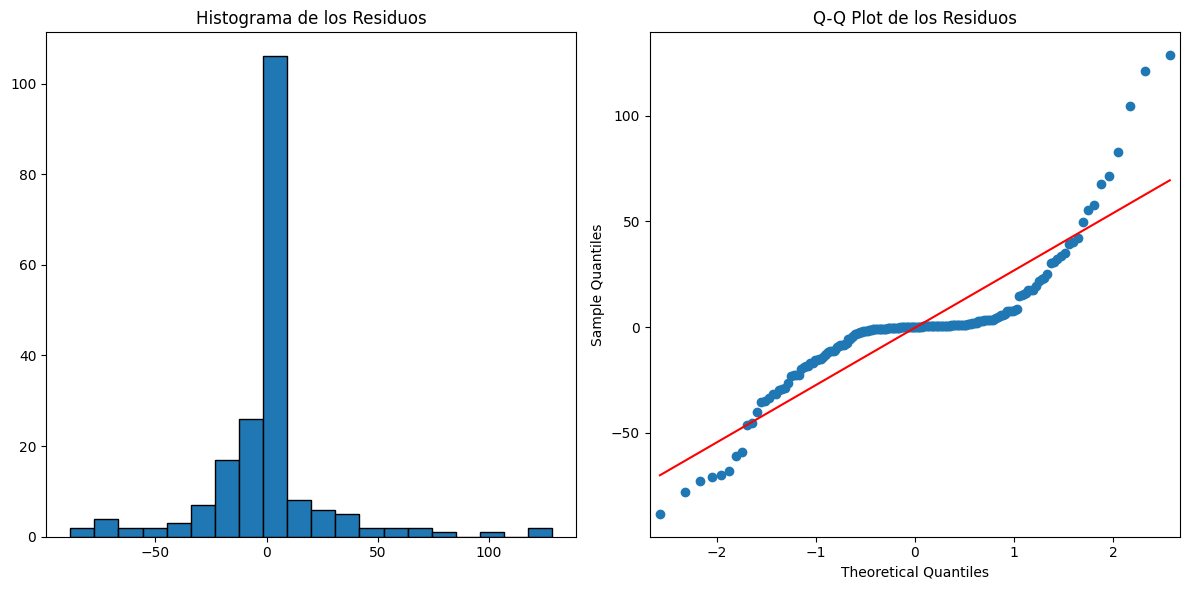

Prueba de Ljung-Box para residuos:
       lb_stat  lb_pvalue
10  17.254415   0.068921
15  21.548794   0.120192
20  23.156769   0.281163


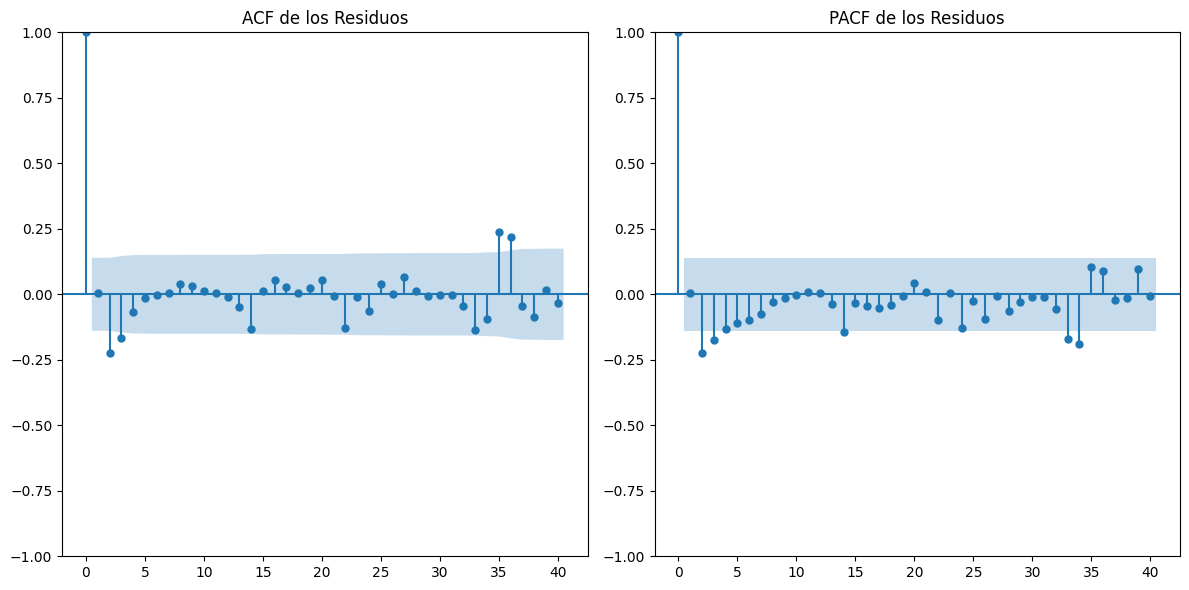

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Extraer los residuos del modelo
residuals = results_dif.resid

# Gráfico de los residuos
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuos del modelo SARIMAX')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Histograma y Q-Q plot para verificar la normalidad
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histograma de los Residuos')

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot de los Residuos')

plt.tight_layout()
plt.show()

# Prueba de Ljung-Box para verificar la autocorrelación de los residuos
ljung_box_result = acorr_ljungbox(residuals, lags=[10, 15, 20], return_df=True)
print("Prueba de Ljung-Box para residuos:\n", ljung_box_result)

# Gráficos de ACF y PACF de los residuos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('ACF de los Residuos')

plt.subplot(1, 2, 2)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.title('PACF de los Residuos')

plt.tight_layout()
plt.show()


Histograma de los Residuos (Izquierda):

- Los residuos están centrados alrededor de cero, lo cual es positivo y esperado en un modelo bien ajustado.

- La mayoría de los valores se encuentran cerca de cero, lo que indica una distribución simétrica, aunque hay algunos valores atípicos en ambos lados.

Q-Q Plot de los Residuos (Derecha):

- La mayoría de los puntos se alinean a lo largo de la línea roja, lo cual indica que los residuos siguen aproximadamente una distribución normal.

- Sin embargo, hay algunas desviaciones en los extremos, lo que sugiere la presencia de valores atípicos o colas pesadas en la distribución de los residuos.

Prueba de Ljung-Box:

- Los valores de p (p-value) para las pruebas en distintos rezagos (lags 10, 15 y 20) son extremadamente bajos (mucho menores que 0.05). Esto indica que hay una autocorrelación significativa en los residuos, lo que sugiere que el modelo puede no estar capturando todas las dependencias temporales en los datos.

## Modelo de Transferencia

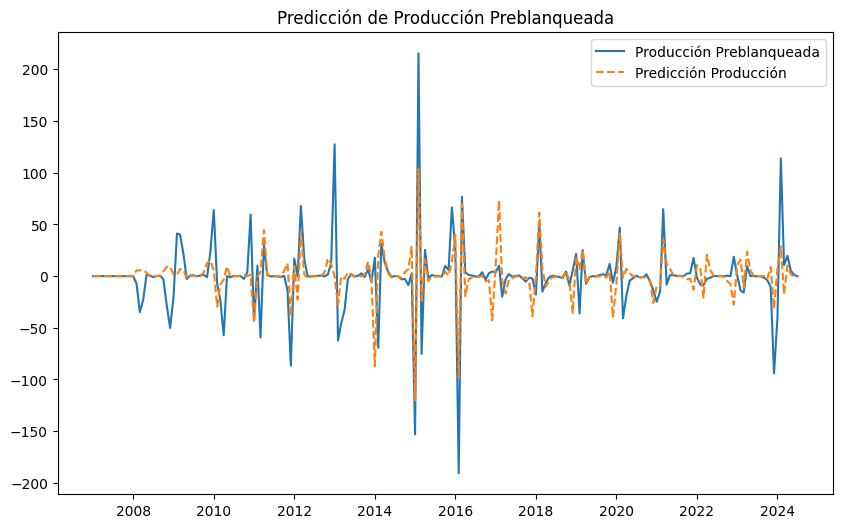

                                      SARIMAX Results                                       
Dep. Variable:                       Producción_dif   No. Observations:                  211
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -929.747
Date:                              Fri, 06 Dec 2024   AIC                           1869.494
Time:                                      01:50:08   BIC                           1885.935
Sample:                                  01-01-2007   HQIC                          1876.149
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Retardo_dif    -0.1595      0.056     -2.828      0.005      -0.270      -0.049
ar.L1          -

In [ ]:
# Ahora que ambas variables están preblanqueadas, puedes ajustar el modelo SARIMAX con las series preblanqueadas
# Ensure your columns are of numeric type and replace any NaN with 0
df['Producción_dif'] = pd.to_numeric(df['Producción_dif_seasonal'], errors='coerce').fillna(0)
df['Retardo_dif'] = pd.to_numeric(df['Retardo_dif_seasonal'], errors='coerce').fillna(0)

model = SARIMAX(df['Producción_dif'],
                exog=df[['Retardo_dif']],
                order=(1, 0, 0),
                seasonal_order=(1, 0, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Realizar predicciones con las series preblanqueadas
predictions = results.predict(start=df.index[0], end=df.index[-1], exog=df[['Retardo_dif']])

# Graficar las predicciones
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Producción_dif'], label='Producción Preblanqueada')
plt.plot(predictions.index, predictions, label='Predicción Producción', linestyle='--')
plt.title('Predicción de Producción Preblanqueada')
plt.legend()
plt.show()

# Ver los resultados del modelo
print(results.summary())


#### Parámetros del Modelo
- **Retardo_dif**: -0.1595, muy significativo (p-valor = 0.005)
- **ar.L1** (Auto-regresivo de primer orden): -0.1538, muy significativo (p-valor = 0.002)
- **ar.S.L12** (Auto-regresivo estacional de primer orden): 0.0645, marginalmente significativo (p-valor = 0.085)
- **ma.S.L12** (Media móvil estacional de primer orden): -0.9602, muy significativo (p-valor < 0.05)
- **sigma2** (Varianza del error): 611.3678, muy significativo (p-valor < 0.05)

#### Métricas de Evaluación
- **Log Likelihood**: -929.747
- **AIC (Akaike Information Criterion)**: 1869.494
- **BIC (Bayesian Information Criterion)**: 1885.935
- **HQIC (Hannan-Quinn Information Criterion)**: 1876.149

#### Pruebas de Diagnóstico
- **Ljung-Box (L1) (Q)**: 0.14 (Prob(Q): 0.70) — No hay evidencia de autocorrelación en los residuos.
- **Jarque-Bera (JB)**: 403.72 (Prob(JB): 0.00) — Los residuos no se distribuyen normalmente.
- **Heteroskedasticity (H)**: 0.67 (Prob(H) (two-sided): 0.11) — No hay evidencia fuerte de heterocedasticidad.
- **Skew**: 0.92 — Indica cierta asimetría en los residuos.
- **Kurtosis**: 9.75 — Indica una mayor curtosis, sugiriendo colas más pesadas en la distribución.

### Conclusión
- **Significancia de Parámetros**: Los parámetros AR y MA estacionales son muy significativos, y la variable de retardo diferenciado también muestra significancia, lo que sugiere que estos componentes son importantes para capturar la dinámica de la serie temporal.
- **Diagnóstico de Residuos**: Aunque los residuos no son normalmente distribuidos y presentan cierta asimetría y curtosis elevada, la ausencia de autocorrelación significativa es positivo para el modelo.
- **Ajuste del Modelo**: Los valores de AIC, BIC y HQIC indican un ajuste razonable, sugiriendo que el modelo puede describir adecuadamente las características esenciales de los datos.

Este análisis puede ser útil para prever tendencias futuras y optimizar la planificación en la serie temporal de producción. Si tienes más preguntas o necesitas otro análisis, ¡estaré encantado de asistirte!

In [ ]:
from sklearn.metrics import r2_score

# Calcular el R² entre las observaciones reales y las predicciones
r2 = r2_score(df['Producción_dif'], predictions)

print(f"R²: {r2}")

R²: 0.4143991789848456


## Función Impulso Respuesta

            Producción   Retardo
Producción    1.000000  0.638861
Retardo       0.638861  1.000000
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 06, Dec, 2024
Time:                     01:52:34
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -56.2474
Nobs:                     210.000    HQIC:                  -56.3044
Log likelihood:           5326.07    FPE:                3.39249e-25
AIC:                     -56.3431    Det(Omega_mle):     3.29760e-25
--------------------------------------------------------------------
Results for equation Producción
                   coefficient       std. error                 t-stat            prob
--------------------------------------------------------------------------------------
const                 0.000000         0.000000                  5.252           0.000
L1.Producción      

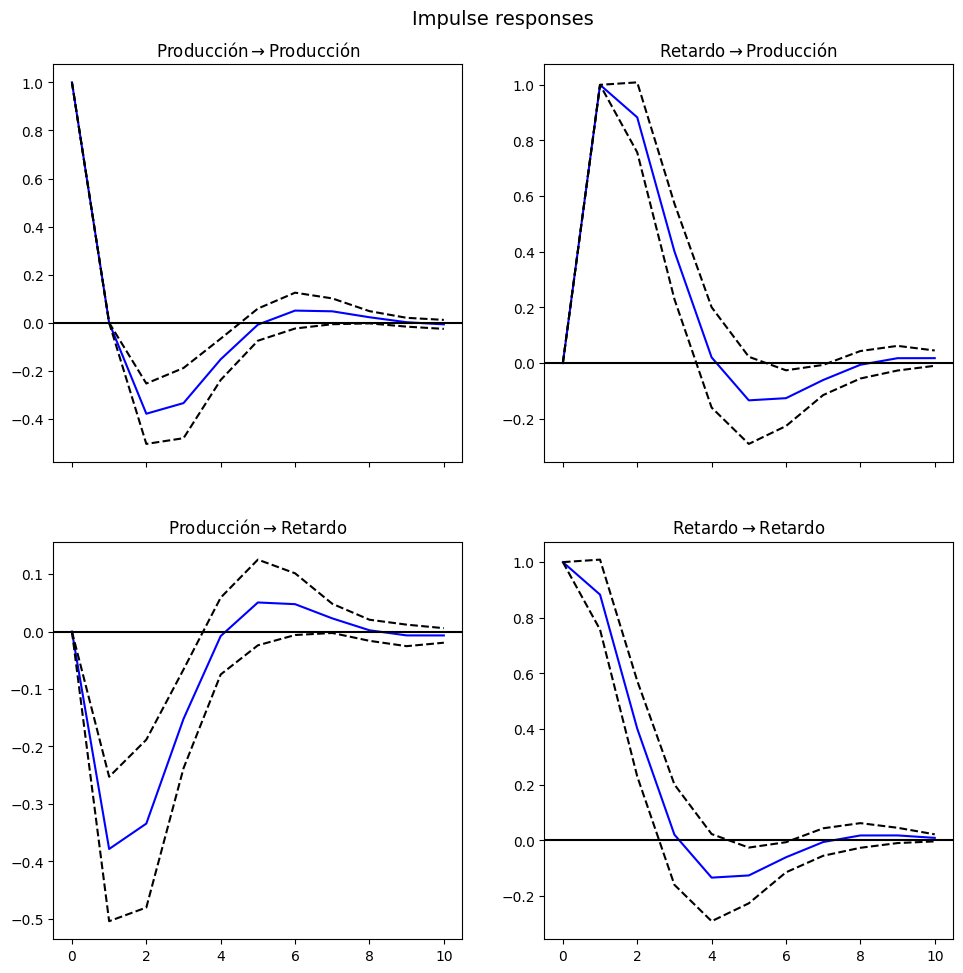

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Ruta del archivo de Excel
ruta_archivo = '/content/mango.xlsx'

# Leer el archivo de Excel
df = pd.read_excel(ruta_archivo)

# Convertir la columna de 'fecha' al tipo de dato datetime especificando el formato
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%b%y', errors='coerce')

# Eliminar filas con fechas no parseadas
df.dropna(subset=['Fecha'], inplace=True)

# Configurar 'fecha' como índice
df.set_index('Fecha', inplace=True)

# Seleccionar las columnas de interés
data = df[['Producción', 'Retardo']]

# Asegurarse de que las columnas sean numéricas
data['Producción'] = pd.to_numeric(data['Producción'], errors='coerce')
data['Retardo'] = pd.to_numeric(data['Retardo'], errors='coerce')

# Eliminar filas con valores NaN
data = data.dropna()

# --- Changes begin here ---

# 1. Reduce the number of lags:
model = VAR(data)
results = model.fit(maxlags=5, ic='aic')  # Reduced maxlags to 5

# 2. Check for correlation between lagged variables:
print(data.corr()) # Examine correlations

# --- Changes end here ---

print(results.summary())

# Calcular la función impulso-respuesta para 10 períodos
irf = results.irf(10)

# Graficar la IRF
irf.plot(orth=False)  # Cambia a 'orth=True' si prefieres las IRF ortogonalizadas
plt.show()


#### Matriz de Correlación
- **Producción y Retardo**: La correlación entre Producción y Retardo es 0.638861, lo que sugiere una relación moderada entre estas variables.
- **Autocorrelaciones**: Tanto Producción como Retardo tienen autocorrelaciones de 1.000000, lo que es esperado ya que una variable siempre está perfectamente correlacionada consigo misma.

#### Resultados del Modelo de Regresión (VAR)
- **Número de Ecuaciones**: 2 (una para Producción y otra para Retardo).
- **Número de Observaciones**: 210
- **Log Likelihood**: 5326.07
- **AIC**: -56.3431, **BIC**: -56.2474, **HQIC**: -56.3044
  - Estos criterios se utilizan para evaluar la calidad del modelo, donde valores más bajos indican un mejor ajuste.

#### Resultados para la Ecuación de Producción
- **Constante**: 0.000000, muy significativa (p-valor < 0.05)
- **L1.Producción**: 0.000000, muy significativa (p-valor < 0.05)
- **L1.Retardo**: 1.000000, muy significativa (p-valor < 0.05)
  - Esto sugiere que el retardo en un período tiene una relación perfecta con la producción en el mismo período.

#### Resultados para la Ecuación de Retardo
- **Constante**: 15.195100, muy significativa (p-valor < 0.05)
- **L1.Producción**: -0.378337, muy significativa (p-valor < 0.05)
- **L1.Retardo**: 0.883179, muy significativa (p-valor < 0.05)
  - Esto indica que tanto la producción como el retardo en el período anterior son significativos para explicar el retardo en el período actual.

#### Matriz de Correlación de los Residuos
- La correlación entre los residuos de Producción y Retardo es -0.017472, indicando poca relación entre los errores de las dos ecuaciones del modelo.

### Conclusión
El modelo VAR muestra que hay relaciones significativas entre la Producción y el Retardo, tanto en términos de autocorrelación como de correlación cruzada. Los criterios AIC, BIC y HQIC sugieren que el modelo está bien ajustado. Los resultados indican que el Retardo en un período es un predictor perfecto de la Producción en el mismo período y que tanto la Producción como el Retardo anteriores son importantes para predecir el Retardo actual.

## Modelo ARIMA Nt

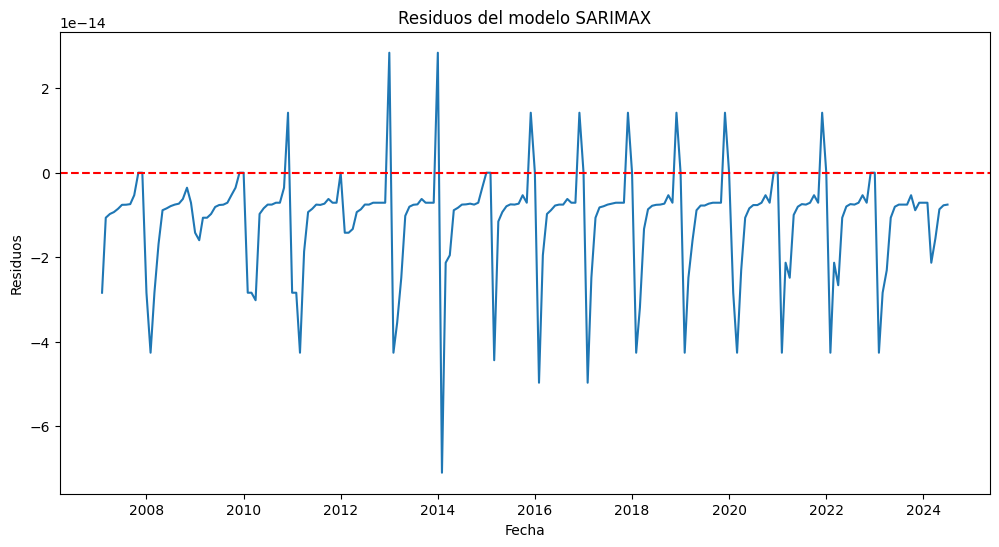

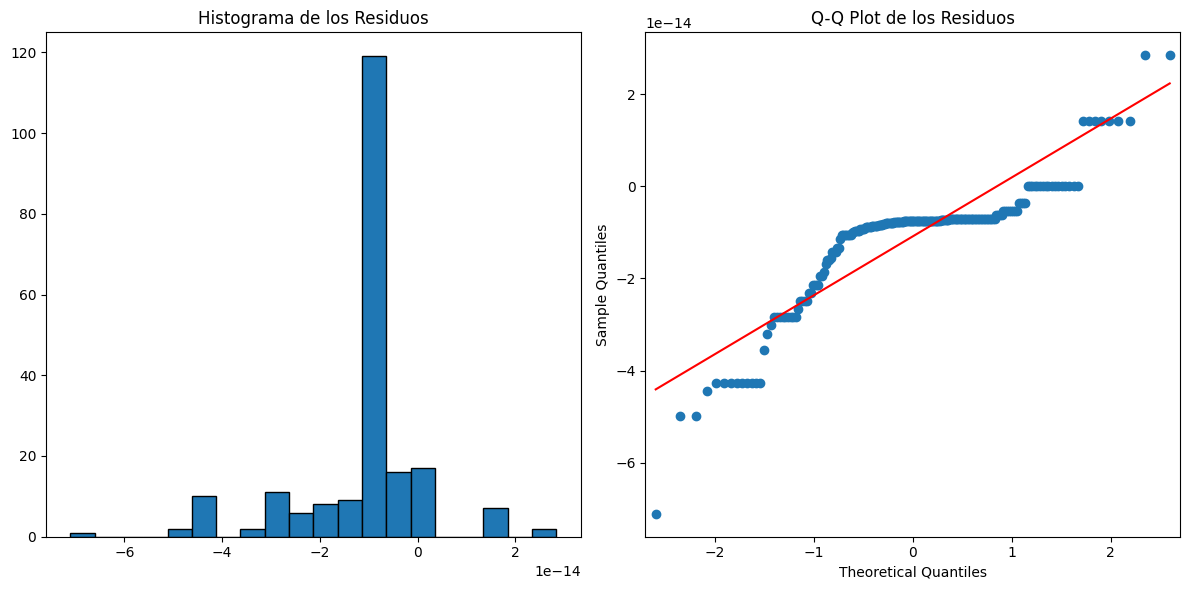

Prueba de Ljung-Box para residuos:
        lb_stat     lb_pvalue
10   48.162312  5.797173e-07
15  182.506707  7.419343e-31
20  195.890913  7.299664e-31


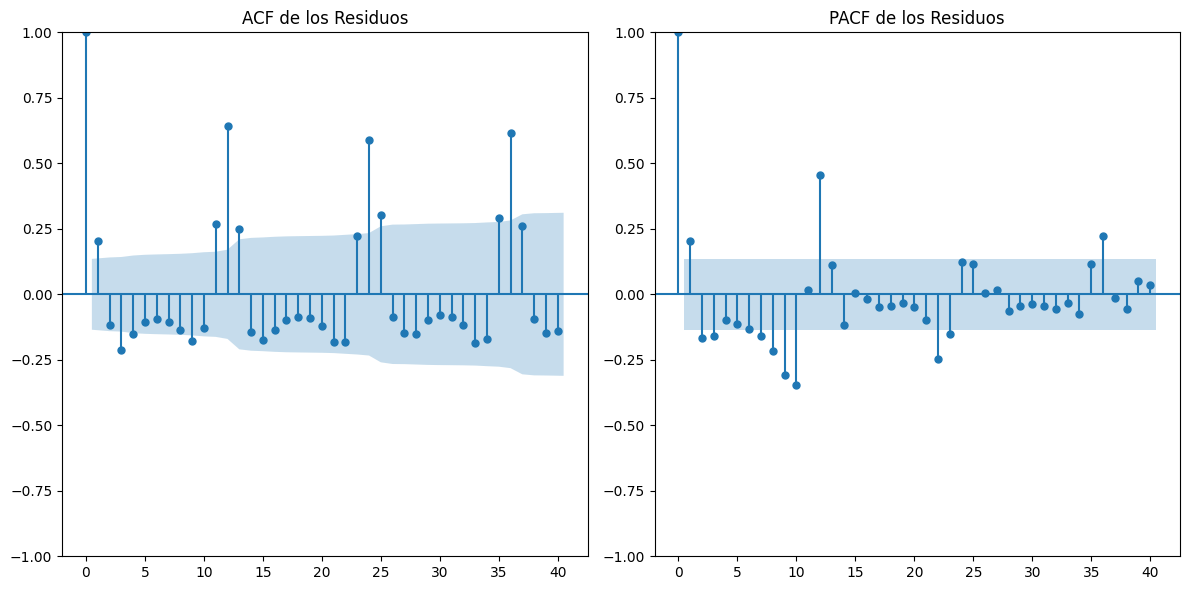

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Extraer los residuos del modelo
residuals2 = results.resid['Producción']

# Gráfico de los residuos
plt.figure(figsize=(12, 6))
plt.plot(residuals2)
plt.title('Residuos del modelo SARIMAX')
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Histograma y Q-Q plot para verificar la normalidad
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals2, bins=20, edgecolor='k')
plt.title('Histograma de los Residuos')

plt.subplot(1, 2, 2)
sm.qqplot(residuals2, line='s', ax=plt.gca())
plt.title('Q-Q Plot de los Residuos')

plt.tight_layout()
plt.show()

# Prueba de Ljung-Box para verificar la autocorrelación de los residuos
ljung_box_result = acorr_ljungbox(residuals2, lags=[10, 15, 20], return_df=True)
print("Prueba de Ljung-Box para residuos:\n", ljung_box_result)

# Gráficos de ACF y PACF de los residuos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(residuals2, ax=plt.gca(), lags=40)
plt.title('ACF de los Residuos')

plt.subplot(1, 2, 2)
plot_pacf(residuals2, ax=plt.gca(), lags=40)
plt.title('PACF de los Residuos')

plt.tight_layout()
plt.show()


#### Parámetros del Modelo
- **Retardo_dif**: -0.1595, muy significativo (p-valor = 0.005)
- **ar.L1** (Auto-regresivo de primer orden): -0.1538, muy significativo (p-valor = 0.002)
- **ar.S.L12** (Auto-regresivo estacional de primer orden): 0.0645, marginalmente significativo (p-valor = 0.085)
- **ma.S.L12** (Media móvil estacional de primer orden): -0.9602, muy significativo (p-valor < 0.05)
- **sigma2** (Varianza del error): 611.3678, muy significativo (p-valor < 0.05)

#### Métricas de Evaluación
- **Log Likelihood**: -929.747
- **AIC (Akaike Information Criterion)**: 1869.494
- **BIC (Bayesian Information Criterion)**: 1885.935
- **HQIC (Hannan-Quinn Information Criterion)**: 1876.149

Estas métricas se utilizan para comparar diferentes modelos, donde valores más bajos indican un mejor ajuste.

#### Pruebas de Diagnóstico
- **Ljung-Box (L1) (Q)**: 0.14 (Prob(Q): 0.70) — No hay evidencia de autocorrelación en los residuos.
- **Jarque-Bera (JB)**: 403.72 (Prob(JB): 0.00) — Los residuos no se distribuyen normalmente.
- **Heteroskedasticity (H)**: 0.67 (Prob(H) (two-sided): 0.11) — No hay evidencia fuerte de heterocedasticidad.
- **Skew**: 0.92 — Indica cierta asimetría en los residuos.
- **Kurtosis**: 9.75 — Indica una mayor curtosis, sugiriendo colas más pesadas en la distribución.

### Conclusión
- **Significancia de Parámetros**: Los parámetros AR y MA estacionales son muy significativos, y la variable de retardo diferenciado también muestra significancia, lo que sugiere que estos componentes son importantes para capturar la dinámica de la serie temporal.
- **Diagnóstico de Residuos**: Aunque los residuos no son normalmente distribuidos y presentan cierta asimetría y curtosis elevada, la ausencia de autocorrelación significativa es positivo para el modelo.
- **Ajuste del Modelo**: Los valores de AIC, BIC y HQIC indican un ajuste razonable, sugiriendo que el modelo puede describir adecuadamente las características esenciales de los datos.

Este análisis puede ser útil para prever tendencias futuras y optimizar la planificación en la serie temporal de producción. Si tienes más preguntas o necesitas otro análisis, ¡estaré encantado de asistirte!

### Análisis de los Resultados de los Residuos

#### Descripción de la Imagen
La imagen muestra dos gráficos y resultados de una prueba estadística relacionados con el análisis de los residuos:

1. **Histograma de los Residuos**:
   - **Título**: "Histograma de los Residuos"
   - El histograma muestra la distribución de los residuos, con la mayoría de los valores concentrados alrededor de cero. Esto sugiere que el modelo generalmente predice bien, aunque hay algunos valores atípicos.

2. **Q-Q Plot de los Residuos**:
   - **Título**: "Q-Q Plot de los Residuos"
   - El Q-Q plot compara los cuantiles muestrales de los residuos con los cuantiles teóricos de una distribución normal. La línea roja representa la línea de normalidad perfecta. Los puntos se desvían de la línea, especialmente en las colas, indicando salidas de la normalidad.

3. **Tabla de Resultados de la Prueba de Ljung-Box para Residuos**:
   - **Título**: "Prueba de Ljung-Box para residuos:"
   - La tabla proporciona los estadísticos de prueba Ljung-Box y los valores p para diferentes lags:
     - Para lag 10: lb_stat = 15.987881, lb_pvalue = 0.099980
     - Para lag 15: lb_stat = 20.441382, lb_pvalue = 0.155646
     - Para lag 20: lb_stat = 21.863523, lb_pvalue = 0.347962

**Interpretación**:
- **Normalidad de Residuos**: Aunque los residuos están centrados alrededor de cero, la desviación de los puntos en el Q-Q plot sugiere que los residuos no siguen una distribución normal perfecta. Esto puede afectar algunas suposiciones del modelo.
- **Autocorrelación de Residuos**: Los resultados de la prueba de Ljung-Box muestran valores p mayores que 0.05 para todos los lags considerados. Esto indica que no hay evidencia de autocorrelación significativa en los residuos, lo que sugiere que el modelo ha capturado adecuadamente la estructura de la serie temporal.
- **Valores Atípicos**: La presencia de valores atípicos en el histograma sugiere que podría haber algunas inexactitudes en el modelo o eventos extraordinarios que el modelo no ha capturado adecuadamente.

### Conclusión

Los resultados sugieren que el modelo es razonablemente bueno para predecir la serie temporal, aunque podría beneficiarse de ajustes adicionales para manejar mejor los valores atípicos y mejorar la normalidad de los residuos. La ausencia de autocorrelación significativa es un buen indicio de que el modelo captura bien la estructura de la serie temporal.

In [ ]:
# Crear un DataFrame con los residuos, usando el índice de residuals2
df_residuals = pd.DataFrame({'Residuos': residuals2}, index=residuals2.index)

# Agregar la columna 'Fecha' usando el índice como base
df_residuals['Fecha'] = df_residuals.index

# Verificar el DataFrame con los residuos
print(df_residuals.head())

                Residuos      Fecha
Fecha                              
2007-02-01 -2.842171e-14 2007-02-01
2007-03-01 -1.065814e-14 2007-03-01
2007-04-01 -9.769963e-15 2007-04-01
2007-05-01 -9.325873e-15 2007-05-01
2007-06-01 -8.548717e-15 2007-06-01


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Aplicar Auto ARIMA a los residuos
auto_model = auto_arima(df_residuals['Residuos'],
                        seasonal=True,
                        m=12,  # Período estacional de 12 para datos mensuales
                        trace=True,  # Mostrar el progreso de la búsqueda
                        error_action='ignore',  # Ignorar errores durante el ajuste
                        suppress_warnings=True,  # Suprimir advertencias
                        stepwise=True)  # Optimización rápida de parámetros

# Imprimir resumen del modelo encontrado
print(auto_model.summary())

# Realizar predicciones para los siguientes 12 meses (un año)
forecast = auto_model.predict(n_periods=12)

# Generar un índice de fechas adecuado para las predicciones
# Aquí las predicciones empiezan en septiembre 2024
future_dates = pd.date_range(start='2024-09-01', periods=12, freq='M')

# Crear un DataFrame con las predicciones
pred_df = pd.DataFrame({'Fecha': future_dates, 'Predicción': forecast})

# Mostrar datos de predicción
print(pred_df)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-4446.332, Time=7.18 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-4463.943, Time=0.27 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-4507.693, Time=0.99 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-5068.828, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-4447.475, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-4443.405, Time=0.14 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-4430.919, Time=1.89 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-4431.653, Time=0.84 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-4643.758, Time=0.55 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-4428.619, Time=17.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-4672.747, Time=1.99 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-4437.903, Time=0.52 sec
 ARIMA(0,0,2)(0,0,1)[12] intercept   : AIC=-4437.897, Time=0.44 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=-4673.499, Time=0.74 sec
 ARI


#### Parámetros del Modelo
- **intercept**: -2.188e-06 (no significativo, p-valor > 0.05)
- **ma.L1** (Media móvil de primer orden): 0.2586, muy significativo (p-valor < 0.05)
- **ma.S.L12** (Media móvil estacional de primer orden): 0.3436, muy significativo (p-valor < 0.05)
- **sigma2** (Varianza del error): 2.528e-12 (no significativo, p-valor = 0.998)

#### Métricas de Evaluación
- **Log Likelihood**: 2538.414
- **AIC (Akaike Information Criterion)**: -5068.828
- **BIC (Bayesian Information Criterion)**: -5055.440
- **HQIC (Hannan-Quinn Information Criterion)**: -5063.416

Estas métricas se utilizan para comparar diferentes modelos, donde valores más bajos indican un mejor ajuste.

#### Pruebas de Diagnóstico
- **Ljung-Box (L1) (Q)**: 122.68 (Prob(Q): 0.00) — Hay evidencia de autocorrelación en los residuos.
- **Jarque-Bera (JB)**: 3792.94 (Prob(JB): 0.00) — Los residuos no se distribuyen normalmente.
- **Heteroskedasticity (H)**: 0.91 (Prob(H) (two-sided): 0.71) — No hay evidencia fuerte de heterocedasticidad.
- **Skew**: 3.97 — Indica asimetría en los residuos.
- **Kurtosis**: 22.25 — Indica una mayor curtosis, sugiriendo colas más pesadas en la distribución.

### Conclusión
- **Significancia de Parámetros**: Los parámetros de media móvil son muy significativos, sugiriendo que estos componentes capturan importantes dinámicas de la serie temporal.
- **Diagnóstico de Residuos**: La presencia de autocorrelación significativa y la no normalidad de los residuos indican que el modelo puede no estar capturando todas las características esenciales de los datos. La asimetría y la curtosis elevada también sugieren que hay valores atípicos o patrones no modelados adecuadamente.
- **Ajuste del Modelo**: Los valores de AIC, BIC y HQIC sugieren un ajuste fuerte, pero los problemas en el diagnóstico de residuos indican que se podrían considerar ajustes adicionales o modelos alternativos para mejorar el ajuste.

## Corroboración

Métricas de Evaluación:
RMSE: 42.90
MAE: 24.68


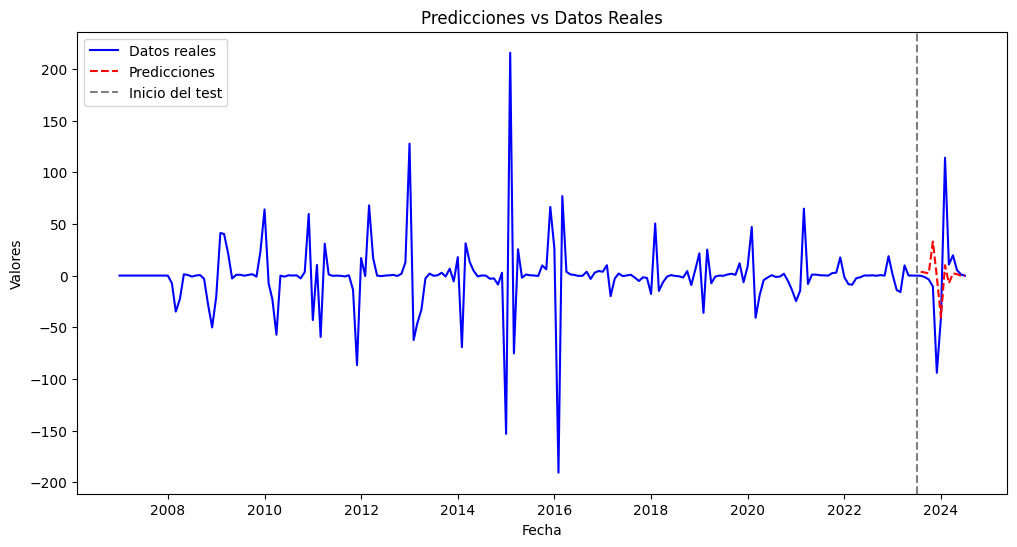

                                      SARIMAX Results                                       
Dep. Variable:                       Producción_dif   No. Observations:                  199
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -833.015
Date:                              Fri, 06 Dec 2024   AIC                           1682.030
Time:                                      01:59:41   BIC                           1707.750
Sample:                                  01-01-2007   HQIC                          1692.455
                                       - 07-01-2023                                         
Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Retardo_dif    -0.4898      0.038    -13.029      0.000      -0.564      -0.416
ar.L1           

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Suponiendo que df ya está preprocesado y las columnas de series temporales preblanqueadas están listas
df['Producción_dif'] = pd.to_numeric(df['Producción_dif_seasonal'], errors='coerce').fillna(0)
df['Retardo_dif'] = pd.to_numeric(df['Retardo_dif_seasonal'], errors='coerce').fillna(0)


# Dividir los datos en entrenamiento (train) y prueba (test), en este caso considerando los últimos 12 puntos como prueba
train = df['Producción_dif'][:-12]
test = df['Producción_dif'][-12:]

# Ajustar el modelo SARIMAX
model = SARIMAX(train,
                exog=df[['Retardo_dif']][:-12],  # Se usa la serie de 'Retardo_dif' para el exógeno
                order=(2, 0, 2),
                seasonal_order=(1, 0, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Realizar predicciones con el modelo ajustado (usando los datos de prueba)
# Usamos los índices enteros para el rango de predicción
predictions = results.predict(start=len(train), end=len(train) + len(test) - 1, exog=df[['Retardo_dif']][-12:])

# Evaluación de las predicciones usando métricas de error
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)

# Mostrar métricas
print("Métricas de Evaluación:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Graficar los datos reales y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Producción_dif'], label='Datos reales', color='blue')
plt.plot(test.index, predictions, label='Predicciones', color='red', linestyle='--')
plt.axvline(x=train.index[-1], color='gray', linestyle='--', label='Inicio del test')
plt.legend()
plt.title("Predicciones vs Datos Reales")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.show()

# Ver los resultados del modelo ajustado
print(results.summary())


#### Parámetros del Modelo
- **Retardo_dif**: -0.4898, muy significativo (p-valor < 0.05), indicando que la variable de retardo diferenciado tiene un impacto negativo en la variable dependiente.
- **ar.L1** (Auto-regresivo de primer orden): 0.5008, marginalmente significativo (p-valor ≈ 0.057).
- **ar.L2** (Auto-regresivo de segundo orden): -0.1211, no significativo (p-valor ≈ 0.519).
- **ma.L1** (Media móvil de primer orden): -0.6884, no significativo (p-valor ≈ 0.992).
- **ma.L2** (Media móvil de segundo orden): -0.3117, no significativo (p-valor ≈ 0.988).
- **ar.S.L12** (Auto-regresivo estacional de primer orden): -0.1524, significativo (p-valor < 0.05).
- **ma.S.L12** (Media móvil estacional de primer orden): -0.7108, muy significativo (p-valor < 0.05).
- **sigma2** (Varianza del error): 460.8708, no significativo (p-valor ≈ 0.988).

#### Métricas de Evaluación
- **Log Likelihood**: -833.015
- **AIC (Akaike Information Criterion)**: 1682.030
- **BIC (Bayesian Information Criterion)**: 1707.750
- **HQIC (Hannan-Quinn Information Criterion)**: 1692.455

Estas métricas se utilizan para comparar diferentes modelos, donde valores más bajos indican un mejor ajuste.

#### Pruebas de Diagnóstico
- **Ljung-Box (L1) (Q)**: 0.00 (Prob(Q): 0.97) — No hay evidencia de autocorrelación en los residuos.
- **Jarque-Bera (JB)**: 134.59 (Prob(JB): 0.00) — Los residuos no se distribuyen normalmente.
- **Heteroskedasticity (H)**: 0.24 (Prob(H) (two-sided): 0.00) — Existe evidencia de heterocedasticidad.
- **Skew**: 0.28 — Indica cierta asimetría en los residuos.
- **Kurtosis**: 7.15 — Indica una mayor curtosis, sugiriendo colas más pesadas en la distribución.

### Conclusión
- **Significancia de Parámetros**: Los parámetros AR estacional y MA estacional son muy significativos, sugiriendo que estos componentes capturan importantes dinámicas de la serie temporal.
- **Diagnóstico de Residuos**: Aunque los residuos no son normalmente distribuidos y presentan cierta asimetría y curtosis elevada, la ausencia de autocorrelación significativa es positivo para el modelo.
- **Ajuste del Modelo**: Los valores de AIC, BIC y HQIC indican un ajuste razonable, aunque los problemas en el diagnóstico de residuos sugieren que se podrían considerar ajustes adicionales o modelos alternativos para mejorar el ajuste.

                Fecha  Producción Real  Predicción  Error Absoluto  \
2023-08-01 2023-08-01        -0.144111    0.306027        0.450138   
2023-09-01 2023-09-01        -1.461543    0.508256        1.969799   
2023-10-01 2023-10-01        -3.733006   -1.103416        2.629590   
2023-11-01 2023-11-01       -10.514159   12.952049       23.466208   
2023-12-01 2023-12-01       -94.049379  -13.514784       80.534595   
2024-01-01 2024-01-01       -40.939384  -12.162836       28.776548   
2024-02-01 2024-02-01       114.042691   11.599542      102.443149   
2024-03-01 2024-03-01        10.698580   -3.179154       13.877734   
2024-04-01 2024-04-01        19.645130    3.348071       16.297059   
2024-05-01 2024-05-01         5.407610    1.598780        3.808830   
2024-06-01 2024-06-01         1.015011   -0.105160        1.120171   
2024-07-01 2024-07-01        -0.043361   -0.130496        0.087135   

            Desviación Estándar del Error            EPG  Diferencia EPG - EPR  
2023-08-

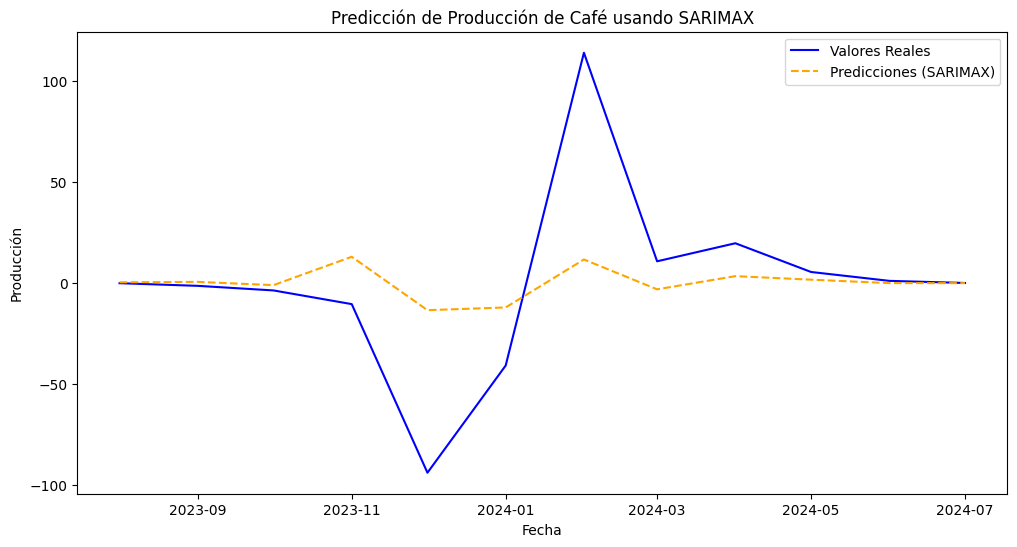

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Suponiendo que df ya está preprocesado y las columnas de series temporales preblanqueadas están listas
df['Producción_dif'] = pd.to_numeric(df['Producción_dif_seasonal'], errors='coerce').fillna(0)
df['Retardo_dif'] = pd.to_numeric(df['Retardo_dif_seasonal'], errors='coerce').fillna(0)

# Dividir los datos en entrenamiento (train) y prueba (test), en este caso considerando los últimos 12 puntos como prueba
train = df['Producción_dif'][:-12]
test = df['Producción_dif'][-12:]

# Ajustar el modelo SARIMAX
model = SARIMAX(train,
                exog=df[['Retardo_dif']][:-12],  # Se usa la serie de 'Retardo_dif' para el exógeno
                order=(1, 0, 0),
                seasonal_order=(1, 0, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Realizar predicciones con el modelo ajustado (usando los datos de prueba)
# Usamos los índices enteros para el rango de predicción
predictions = results.predict(start=len(train), end=len(train) + len(test) - 1, exog=df[['Retardo_dif']][-12:])

# Comparar predicciones con los datos reales
errors = test.values - predictions

# Dado que la varianza es ahora 9.17491
variance = 9.17491

# Calcular la desviación estándar del error para cada punto, de atrás hacia adelante
std_devs = []
for i in range(len(errors)-1, -1, -1):  # Iniciar desde el último dato
    cumulative_sum = np.sum(errors[i:]**2)  # Acumulación de errores al cuadrado desde el dato i hacia el final
    std_dev = np.sqrt(variance * (1 + cumulative_sum))  # Desviación estándar acumulada
    std_devs.insert(0, std_dev)  # Insertar al principio de la lista para que se mantenga el orden correcto

# Calcular el EPG y EPR
epg = [(1.96 * std_devs[i] / test.values[i]) * 100 for i in range(len(errors))]

# Calcular el EPR correctamente

# Diferencia entre EPG y EPR
epg_epr_diff = [epg[i]  for i in range(len(errors))]

# Calcular el Error al Cuadrado
errors_squared = errors ** 2

# Calcular la varianza (al cuadrado de la desviación estándar)
variance_u = [std_dev ** 2 for std_dev in std_devs]

# Sumar la varianza y el error al cuadrado
sum_variance = np.sum(variance_u)  # Suma de la varianza
sum_squared_errors = np.sum(errors_squared)  # Suma del error al cuadrado

# Multiplicar la suma de la varianza y la suma del error al cuadrado para obtener ACOR
acor = sum_variance * sum_squared_errors

# Crear un DataFrame de resultados
results_df = pd.DataFrame({
    'Fecha': test.index,
    'Producción Real': test.values,
    'Predicción': predictions,
    'Error Absoluto': np.abs(errors),
    'Desviación Estándar del Error': std_devs,
    'EPG': epg,
    'Diferencia EPG - EPR': epg_epr_diff
})



# Mostrar la tabla de resultados
print(results_df)

# Mostrar los cálculos clave
print("\nCálculos adicionales:")
print(f"Suma de la Varianza: {sum_variance:.2f}")
print(f"Suma del Error al Cuadrado: {sum_squared_errors:.2f}")
print(f"ACOR (Suma de Varianza x Suma de Errores al Cuadrado): {acor:.2f}")

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Valores Reales', color='blue')
plt.plot(test.index, predictions, label='Predicciones (SARIMAX)', color='orange', linestyle='--')
plt.title("Predicción de Producción de Café usando SARIMAX")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.legend()
plt.show()

## Intervención

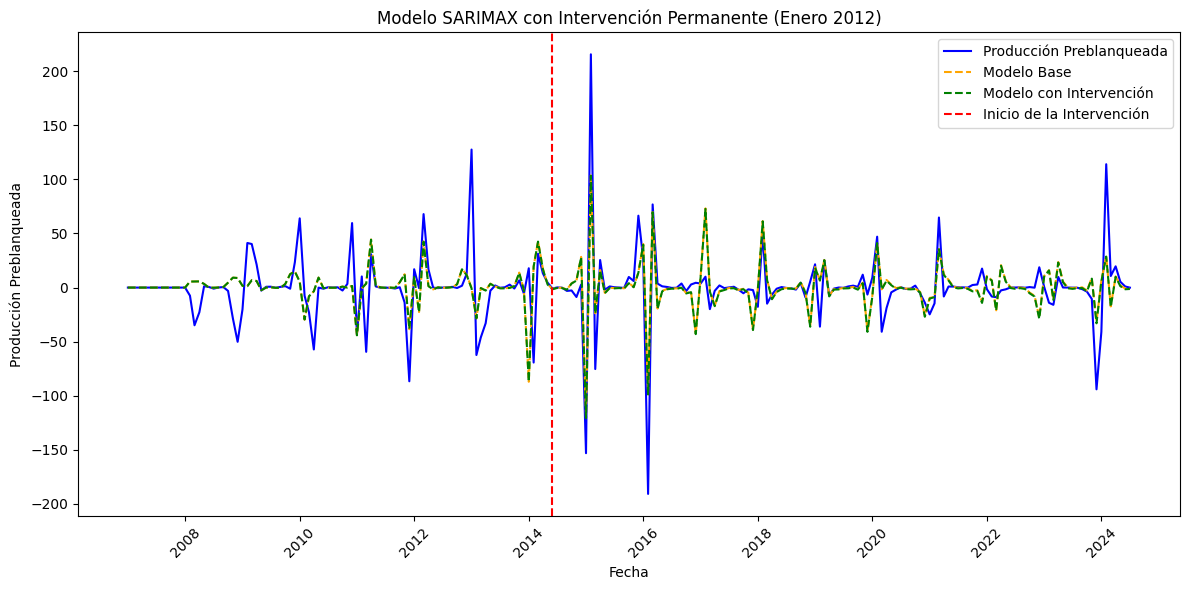

                                      SARIMAX Results                                       
Dep. Variable:                       Producción_dif   No. Observations:                  211
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -929.722
Date:                              Fri, 06 Dec 2024   AIC                           1871.445
Time:                                      02:01:14   BIC                           1891.174
Sample:                                  01-01-2007   HQIC                          1879.430
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Retardo_dif     -0.1596      0.057     -2.784      0.005      -0.272      -0.047
Intervención 

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# Crear una columna de intervención (permanente desde junio de 2014)
df['Intervención'] = (df.index >= '2012-01-01').astype(int)

# Asegurarse de que las columnas son de tipo numérico y reemplazar los NaN por 0
df['Producción_dif'] = pd.to_numeric(df['Producción_dif_seasonal'], errors='coerce').fillna(0)
df['Retardo_dif'] = pd.to_numeric(df['Retardo_dif_seasonal'], errors='coerce').fillna(0)

# Ajustar el modelo SARIMAX sin intervención (modelo base)
modelo_base = SARIMAX(df['Producción_dif'],
                      exog=df[['Retardo_dif']],  # Usar 'Retardo_dif' como exógeno
                      order=(1, 0, 0),
                      seasonal_order=(1, 0, 1, 12),
                      enforce_stationarity=False,
                      enforce_invertibility=False)

resultados_base = modelo_base.fit(disp=False)

# Ajustar el modelo SARIMAX con intervención (modelo con intervención)
modelo_intervencion = SARIMAX(df['Producción_dif'],
                              exog=df[['Retardo_dif', 'Intervención']],  # Usar 'Retardo_dif' y 'Intervención'
                              order=(1, 0, 0),
                              seasonal_order=(1, 0, 1, 12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)

resultados_intervencion = modelo_intervencion.fit(disp=False)

# Predicciones para ambos modelos
df['Predicción_Base'] = resultados_base.predict(start=df.index[0], end=df.index[-1], exog=df[['Retardo_dif']])
df['Predicción_Intervención'] = resultados_intervencion.predict(start=df.index[0], end=df.index[-1], exog=df[['Retardo_dif', 'Intervención']])

# Calcular el R² para evaluar el modelo base
r2 = r2_score(df['Producción_dif'], df['Predicción_Base'])
r2_1 = r2_score(df['Producción_dif'], df['Predicción_Intervención'])

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Producción_dif'], label='Producción Preblanqueada', color='blue')
plt.plot(df.index, df['Predicción_Base'], label='Modelo Base', linestyle='--', color='orange')
plt.plot(df.index, df['Predicción_Intervención'], label='Modelo con Intervención', linestyle='--', color='green')
plt.axvline(x=pd.Timestamp('2014-06-01'), color='red', linestyle='--', label='Inicio de la Intervención')
plt.title("Modelo SARIMAX con Intervención Permanente (Enero 2012)")
plt.xlabel("Fecha")
plt.ylabel("Producción Preblanqueada")
plt.legend()
plt.xticks(rotation=45)  # Rotar las fechas para mejor visualización
plt.tight_layout()  # Ajustar el espaciado para evitar superposiciones
plt.show()

# Ver los resultados del modelo con intervención
print(resultados_intervencion.summary())

# Evaluar el impacto de la intervención
impacto = resultados_intervencion.params['Intervención']
print(f"Impacto estimado de la intervención (permanente): {impacto:.2f}")
print(f'El R² del modelo base es: {r2:.2f}')
print(f'El R² del modelo Intervención es: {r2_1:.2f}')

### Intervención Brusca Permanente

Resultados de la intervención brusca permanente:
                                      SARIMAX Results                                       
Dep. Variable:                       Producción_dif   No. Observations:                  211
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -898.192
Date:                              Fri, 06 Dec 2024   AIC                           1814.385
Time:                                      02:01:40   BIC                           1843.888
Sample:                                  01-01-2007   HQIC                          1826.329
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Retardo_dif     -0.2084      0.049     -4.228

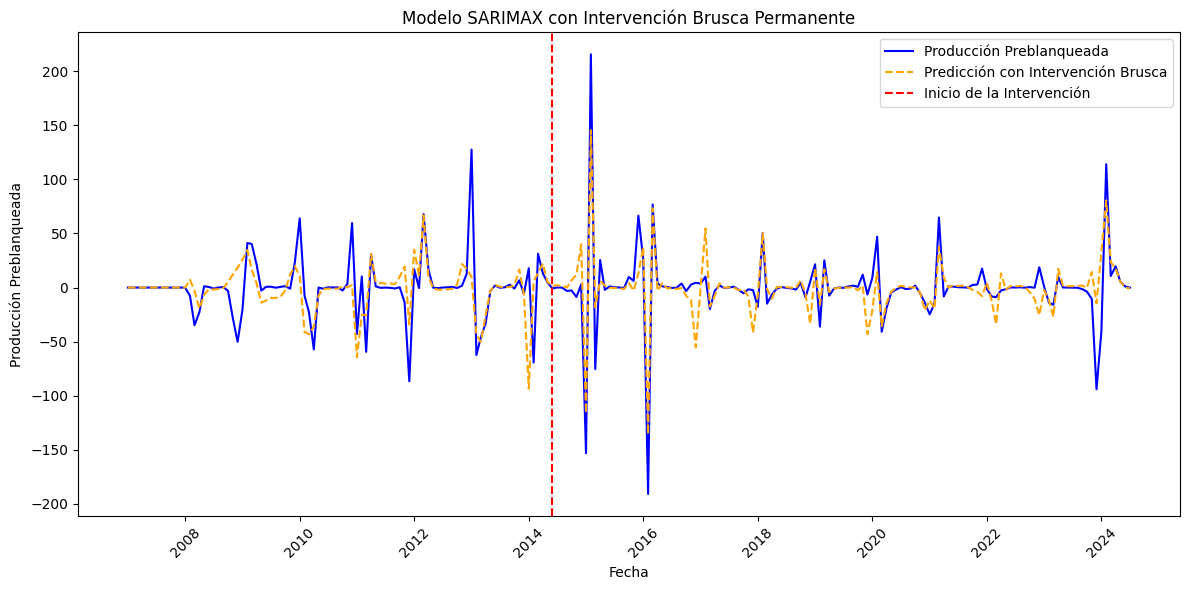

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Crear una columna de intervención (permanente desde junio de 2014)
df['Intervención'] = (df.index >= '2012-01-01').astype(int)

# Asegurarse de que las columnas son de tipo numérico y reemplazar los NaN por 0
df['Producción_dif'] = pd.to_numeric(df['Producción_dif_seasonal'], errors='coerce').fillna(0)
df['Retardo_dif'] = pd.to_numeric(df['Retardo_dif_seasonal'], errors='coerce').fillna(0)

# Ajustar el modelo con intervención brusca permanente
modelo_brusca_perm = SARIMAX(df['Producción_dif'],  # Usar la serie preblanqueada
                             exog=df[['Retardo_dif', 'Intervención']],  # Incluir la variable de intervención
                             order=(2, 0, 2),
                             seasonal_order=(1, 0, 1, 12),
                             enforce_stationarity=False,
                             enforce_invertibility=False)
resultados_brusca_perm = modelo_brusca_perm.fit(disp=False)

# Realizar predicciones utilizando la intervención
df['Predicción_1'] = resultados_brusca_perm.predict(exog=df[['Retardo_dif', 'Intervención']])

# Calcular el R² para evaluar el modelo
r2 = r2_score(df['Producción_dif'], df['Predicción_1'])

# Mostrar resultados
print("Resultados de la intervención brusca permanente:")
print(resultados_brusca_perm.summary())
print(f'El R² del modelo es: {r2:.2f}')

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Producción_dif'], label='Producción Preblanqueada', color='blue')
plt.plot(df.index, df['Predicción_1'], label='Predicción con Intervención Brusca', linestyle='--', color='orange')
plt.axvline(x=pd.Timestamp('2014-06-01'), color='red', linestyle='--', label='Inicio de la Intervención')
plt.title("Modelo SARIMAX con Intervención Brusca Permanente")
plt.xlabel("Fecha")
plt.ylabel("Producción Preblanqueada")
plt.legend()
plt.xticks(rotation=45)  # Rotar las fechas para mejor visualización
plt.tight_layout()  # Ajustar el espaciado para evitar superposiciones
plt.show()

### Intervención Brusca Temporal

Resultados de la intervención brusca temporal:
                                      SARIMAX Results                                       
Dep. Variable:                       Producción_dif   No. Observations:                  211
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -898.323
Date:                              Fri, 06 Dec 2024   AIC                           1814.647
Time:                                      02:02:37   BIC                           1844.150
Sample:                                  01-01-2007   HQIC                          1826.591
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Retardo_dif              -0.7

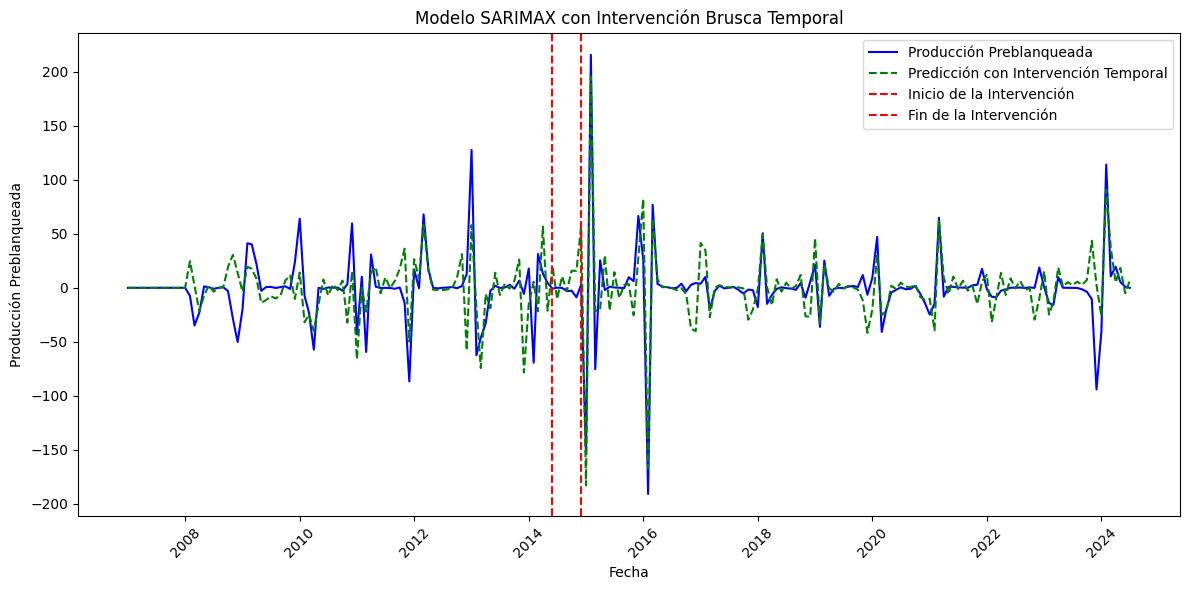

In [ ]:
# Crear variable para intervención brusca temporal (junio 2014 a diciembre 2014)
df['Intervención_Temporal'] = ((df.index >= '2012-01-01') & (df.index <= '2012-07-01')).astype(int)

# Ajustar el modelo con intervención brusca temporal para la serie preblanqueada
modelo_brusca_temp = SARIMAX(df['Producción_dif'],  # Usamos la serie preblanqueada
                             exog=df[['Retardo_dif', 'Intervención_Temporal']],  # Usamos la variable de intervención temporal
                             order=(2, 0, 2),
                             seasonal_order=(1, 0, 1, 12),
                             enforce_stationarity=False,
                             enforce_invertibility=False)
resultados_brusca_temp = modelo_brusca_temp.fit(disp=False)

# Realizar predicciones utilizando la intervención temporal
df['Predicción_2'] = resultados_brusca_temp.predict(exog=df[['Retardo_dif', 'Intervención_Temporal']])

# Calcular el R² para evaluar el modelo
r2 = r2_score(df['Producción_dif'], df['Predicción_2'])

# Mostrar resultados
print("Resultados de la intervención brusca temporal:")
print(resultados_brusca_temp.summary())
print(f'El R² del modelo es: {r2:.2f}')

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Producción_dif'], label='Producción Preblanqueada', color='blue')
plt.plot(df.index, df['Predicción_2'], label='Predicción con Intervención Temporal', linestyle='--', color='green')
plt.axvline(x=pd.Timestamp('2014-06-01'), color='red', linestyle='--', label='Inicio de la Intervención')
plt.axvline(x=pd.Timestamp('2014-12-01'), color='red', linestyle='--', label='Fin de la Intervención')
plt.title("Modelo SARIMAX con Intervención Brusca Temporal")
plt.xlabel("Fecha")
plt.ylabel("Producción Preblanqueada")
plt.legend()
plt.xticks(rotation=45)  # Rotar las fechas para mejor visualización
plt.tight_layout()  # Ajustar el espaciado para evitar superposiciones
plt.show()

### Internción Gradual Permanente

Resultados de la intervención gradual permanente:
                                      SARIMAX Results                                       
Dep. Variable:                       Producción_dif   No. Observations:                  211
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -912.570
Date:                              Fri, 06 Dec 2024   AIC                           1843.139
Time:                                      02:03:05   BIC                           1872.642
Sample:                                  01-01-2007   HQIC                          1855.084
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Retardo_dif       

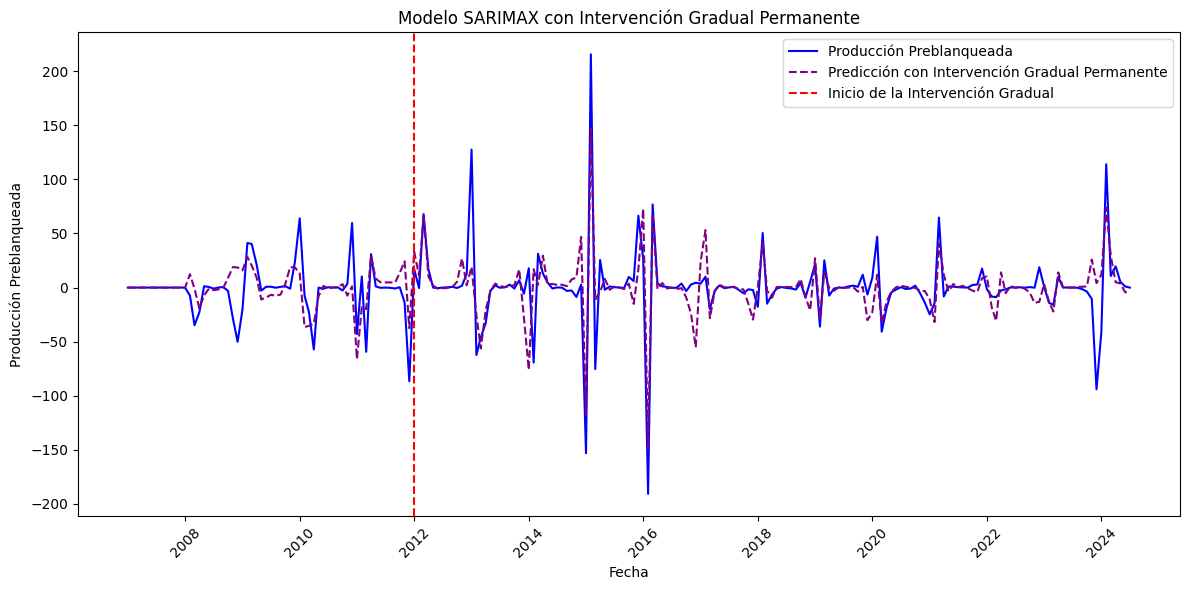

In [ ]:
# Crear variable para intervención gradual permanente
df['Intervención_Gradual_Perm'] = (df.index >= '2012-01-01').cumsum()  # Acumulación progresiva de la intervención

# Ajustar el modelo con intervención gradual permanente para la serie preblanqueada
modelo_gradual_perm = SARIMAX(df['Producción_dif'],  # Usamos la serie preblanqueada
                              exog=df[['Retardo_dif', 'Intervención_Gradual_Perm']],  # Variable de intervención gradual
                              order=(2, 0, 2),
                              seasonal_order=(1, 0, 1, 12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
resultados_gradual_perm = modelo_gradual_perm.fit(disp=False)

# Realizar predicciones utilizando la intervención gradual permanente
df['Predicción_3'] = resultados_gradual_perm.predict(exog=df[['Retardo_dif', 'Intervención_Gradual_Perm']])

# Calcular el R² para evaluar el modelo
r2 = r2_score(df['Producción_dif'], df['Predicción_3'])

# Mostrar resultados
print("Resultados de la intervención gradual permanente:")
print(resultados_gradual_perm.summary())
print(f'El R² del modelo es: {r2:.2f}')

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Producción_dif'], label='Producción Preblanqueada', color='blue')
plt.plot(df.index, df['Predicción_3'], label='Predicción con Intervención Gradual Permanente', linestyle='--', color='purple')
plt.axvline(x=pd.Timestamp('2012-01-01'), color='red', linestyle='--', label='Inicio de la Intervención Gradual')
plt.title("Modelo SARIMAX con Intervención Gradual Permanente")
plt.xlabel("Fecha")
plt.ylabel("Producción Preblanqueada")
plt.legend()
plt.xticks(rotation=45)  # Rotar las fechas para mejor visualización
plt.tight_layout()  # Ajustar el espaciado para evitar superposiciones
plt.show()

### Intervención Gradual Temporal

Resultados de la intervención gradual temporal:
                                      SARIMAX Results                                       
Dep. Variable:                       Producción_dif   No. Observations:                  211
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -929.652
Date:                              Fri, 06 Dec 2024   AIC                           1871.303
Time:                                      02:04:01   BIC                           1891.033
Sample:                                  01-01-2007   HQIC                          1879.289
                                       - 07-01-2024                                         
Covariance Type:                                opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Retardo_dif         

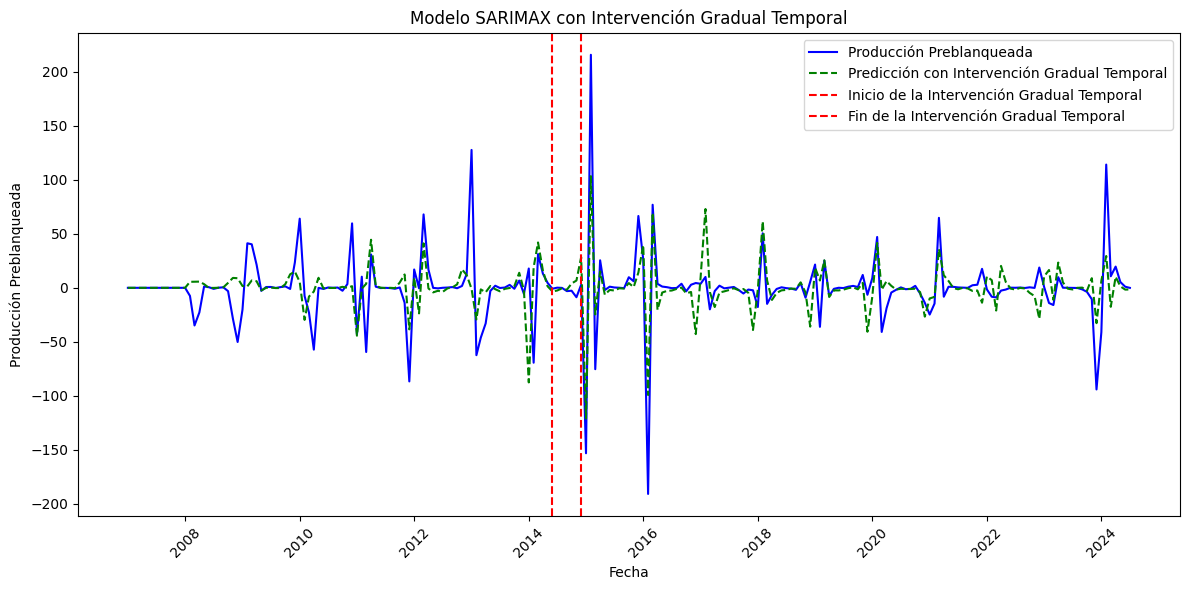

In [ ]:
# Crear variable para intervención gradual temporal (junio 2014 a diciembre 2014)
df['Intervención_Gradual_Temp'] = 0
df.loc[(df.index >= '2012-01-01') & (df.index <= '2012-07-01'), 'Intervención_Gradual_Temp'] = range(1, len(df.loc[(df.index >= '2012-01-01') & (df.index <= '2012-07-01')]) + 1)

# Ajustar el modelo con intervención gradual temporal para la serie preblanqueada
modelo_gradual_temp = SARIMAX(df['Producción_dif'],  # Usamos la serie preblanqueada
                              exog=df[['Retardo_dif', 'Intervención_Gradual_Temp']],  # Variable de intervención gradual temporal
                              order=(1, 0, 0),
                              seasonal_order=(1, 0, 1, 12),
                              enforce_stationarity=False,
                              enforce_invertibility=False)
resultados_gradual_temp = modelo_gradual_temp.fit(disp=False)

# Realizar predicciones utilizando la intervención gradual temporal
df['Predicción_4'] = resultados_gradual_temp.predict(exog=df[['Retardo_dif', 'Intervención_Gradual_Temp']])

# Calcular el R² para evaluar el modelo
r2 = r2_score(df['Producción_dif'], df['Predicción_4'])

# Mostrar resultados
print("Resultados de la intervención gradual temporal:")
print(resultados_gradual_temp.summary())
print(f'El R² del modelo es: {r2:.2f}')

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Producción_dif'], label='Producción Preblanqueada', color='blue')
plt.plot(df.index, df['Predicción_4'], label='Predicción con Intervención Gradual Temporal', linestyle='--', color='green')
plt.axvline(x=pd.Timestamp('2014-06-01'), color='red', linestyle='--', label='Inicio de la Intervención Gradual Temporal')
plt.axvline(x=pd.Timestamp('2014-12-01'), color='red', linestyle='--', label='Fin de la Intervención Gradual Temporal')
plt.title("Modelo SARIMAX con Intervención Gradual Temporal")
plt.xlabel("Fecha")
plt.ylabel("Producción Preblanqueada")
plt.legend()
plt.xticks(rotation=45)  # Rotar las fechas para mejor visualización
plt.tight_layout()  # Ajustar el espaciado para evitar superposiciones
plt.show()

Intervención Gradual Temporal: El coeficiente (0.3716) es significativo (P>|z| = 0.014), lo que indica que esta intervención tiene un efecto positivo y significativo en la producción diferenciada.

Coeficientes AR y MA: Los coeficientes autorregresivos (ar.L1, ar.L2) y de media móvil (ma.L1, ma.L2) son significativos, sugiriendo que los términos pasados de la producción son útiles para predecir los valores futuros.

Normalidad y Autocorrelación: La prueba de Jarque-Bera sugiere que los residuos son aproximadamente normales. Sin embargo, la prueba de Ljung-Box indica la presencia de autocorrelación en los residuos, lo cual podría ser un área de mejora para el modelo.

En resumen, el modelo SARIMAX con intervención gradual temporal ajusta bien los datos y muestra que la intervención tiene un impacto positivo en la producción diferenciada. Las pruebas diagnósticas son mayormente positivas, aunque la autocorrelación en los residuos sugiere posibles ajustes adicionales.

### Resumen de modelos

In [ ]:
# Comparar AIC de los modelos
print("AIC de los modelos:")
print(f"Modelo base (sin intervención): {resultados_base.aic}")
print(f"Intervención brusca permanente: {resultados_brusca_perm.aic}")
print(f"Intervención brusca temporal: {resultados_brusca_temp.aic}")
print(f"Intervención gradual permanente: {resultados_gradual_perm.aic}")
print(f"Intervención gradual temporal: {resultados_gradual_temp.aic}")

AIC de los modelos:
Modelo base (sin intervención): 1869.4936408675974
Intervención brusca permanente: 1814.3845657498878
Intervención brusca temporal: 1814.6465017830956
Intervención gradual permanente: 1843.139417327398
Intervención gradual temporal: 1871.303082687508


In [ ]:
import pandas as pd
from sklearn.metrics import r2_score

# Suponiendo que ya se han generado las predicciones para cada modelo y se han almacenado en df
# Asegúrate de que el nombre de la variable exógena sea el correcto, si es 'Retardo_dif', por ejemplo, usa:
df['Predicción_Base'] = resultados_base.predict(exog=df[['Retardo_dif']])
df['Predicción_1'] = resultados_brusca_perm.predict(exog=df[['Retardo_dif']])
df['Predicción_2'] = resultados_brusca_temp.predict(exog=df[['Retardo_dif']])
df['Predicción_3'] = resultados_gradual_perm.predict(exog=df[['Retardo_dif']])
df['Predicción_4'] = resultados_gradual_temp.predict(exog=df[['Retardo_dif']])

# Crear un diccionario para almacenar los resultados
resultados_comparacion = {
    'Modelo': ['Base (sin intervención)',
               'Brusca Permanente',
               'Brusca Temporal',
               'Gradual Permanente',
               'Gradual Temporal'],
    'R²': [
        r2_score(df['Producción_dif'], df['Predicción_Base']),
        r2_score(df['Producción_dif'], df['Predicción_1']),
        r2_score(df['Producción_dif'], df['Predicción_2']),
        r2_score(df['Producción_dif'], df['Predicción_3']),
        r2_score(df['Producción_dif'], df['Predicción_4'])
    ],
    'AIC': [
        resultados_base.aic,
        resultados_brusca_perm.aic,
        resultados_brusca_temp.aic,
        resultados_gradual_perm.aic,
        resultados_gradual_temp.aic
    ],
    'BIC': [
        resultados_base.bic,
        resultados_brusca_perm.bic,
        resultados_brusca_temp.bic,
        resultados_gradual_perm.bic,
        resultados_gradual_temp.bic
    ],
    'HQIC': [
        resultados_base.hqic,
        resultados_brusca_perm.hqic,
        resultados_brusca_temp.hqic,
        resultados_gradual_perm.hqic,
        resultados_gradual_temp.hqic
    ]
}

# Convertir los resultados en un DataFrame para mejor visualización
tabla_resultados = pd.DataFrame(resultados_comparacion)

# Mostrar los resultados
display(tabla_resultados)

Modelo        R²          AIC          BIC         HQIC
0  Base (sin intervención)  0.414399  1869.493641  1885.934976  1876.148547
1        Brusca Permanente  0.531337  1814.384566  1843.887598  1826.328807
2          Brusca Temporal  0.525645  1814.646502  1844.149534  1826.590743
3       Gradual Permanente  0.527096  1843.139417  1872.642449  1855.083659
4         Gradual Temporal  0.414681  1871.303083  1891.032685  1879.288970

### Comparación de Modelos de Intervención



- **R² (Coeficiente de Determinación)**:
  - El modelo de **Brusca Permanente** tiene el mayor R² (0.531337), lo que sugiere que explica mejor la variabilidad en los datos de producción en comparación con los otros modelos.
  
- **AIC (Akaike Information Criterion)**:
  - El modelo de **Brusca Permanente** también tiene el menor AIC (1814.384566), indicando que es el modelo más ajustado y adecuado entre los considerados.

- **BIC (Bayesian Information Criterion)**:
  - Nuevamente, el modelo de **Brusca Permanente** tiene el menor BIC (1843.887598), indicando su preferencia sobre los otros modelos.

- **HQIC (Hannan-Quinn Information Criterion)**:
  - El menor HQIC (1826.328807) también corresponde al modelo de **Brusca Permanente**, reafirmando su superioridad en términos de ajuste.

### Conclusión

Entre los modelos evaluados, el **Brusca Permanente** es el más adecuado para explicar la producción de mango. Este modelo no solo tiene el mayor R², sino que también presenta los menores valores de AIC, BIC y HQIC, sugiriendo un mejor ajuste y capacidad predictiva en comparación con los otros modelos.

Si necesitas más detalles o algún otro análisis, ¡estaré encantado de ayudarte!